In [1]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2

In [2]:
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
pwd

'/scratch/xw10/jj8584'

## V9 Baseline

In [4]:
baseline_model = YOLO('yolov9c.pt')

In [5]:
params_baseline  = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov9c.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
}

In [6]:
baseline_results = baseline_model.train(**params_baseline)

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.133      11.64      2.636        246        416: 100%|██████████| 48/48 [00:09<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.103      2.766      2.499        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.44it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.971      2.698      2.432        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         73        967     0.0132      0.274     0.0522     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      2.667       2.61      2.376        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         73        967     0.0032     0.0216    0.00185   0.000506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.22G      2.463      2.551      2.224        329        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         73        967   0.000463    0.00122   0.000233   0.000109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.388      2.525       2.13        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]

                   all         73        967    0.00407     0.0328    0.00377   0.000654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      2.308      2.364      2.045        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         73        967       0.24      0.371      0.254      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.208      2.162      2.035        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]

                   all         73        967     0.0534      0.446      0.126     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      2.119      1.987      2.004        296        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]

                   all         73        967      0.696      0.353      0.343      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.034      1.919      1.975        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]

                   all         73        967    0.00581     0.0121    0.00546    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G      1.929      1.772      1.911        331        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all         73        967      0.166      0.343      0.169     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      1.877       1.72      1.848        326        416: 100%|██████████| 48/48 [00:07<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all         73        967     0.0212      0.529     0.0418     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G      1.804      1.663      1.807        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967      0.241      0.528      0.175      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.768        1.6      1.771        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.42it/s]

                   all         73        967      0.241      0.528      0.175      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      1.719      1.541      1.727        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.29it/s]

                   all         73        967     0.0098    0.00846    0.00666     0.0032


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.18G      1.597      1.484      1.727        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         73        967      0.748      0.485      0.642      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.597      1.441       1.73        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all         73        967      0.526      0.227      0.257      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.553      1.341      1.704        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         73        967      0.776      0.408      0.573      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.523      1.294       1.67        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         73        967      0.836      0.435      0.829       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      1.505      1.236      1.641        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967        0.8      0.531      0.721      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      1.489      1.223       1.64        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all         73        967      0.698      0.481      0.802      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.18G      1.467       1.18      1.625        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967      0.786      0.571      0.824      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.436      1.147      1.599        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        967      0.793      0.578      0.845      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.18G      1.428      1.132      1.595        186        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all         73        967      0.797      0.567      0.855      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.426      1.139      1.589        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         73        967      0.807      0.558      0.854      0.526



25 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]


                   all         73        967      0.807      0.558      0.853      0.526
             Platelets         73         76      0.845      0.789       0.85      0.372
                   RBC         73        819      0.577      0.867      0.797      0.522
                   WBC         73         72          1     0.0176      0.913      0.685
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


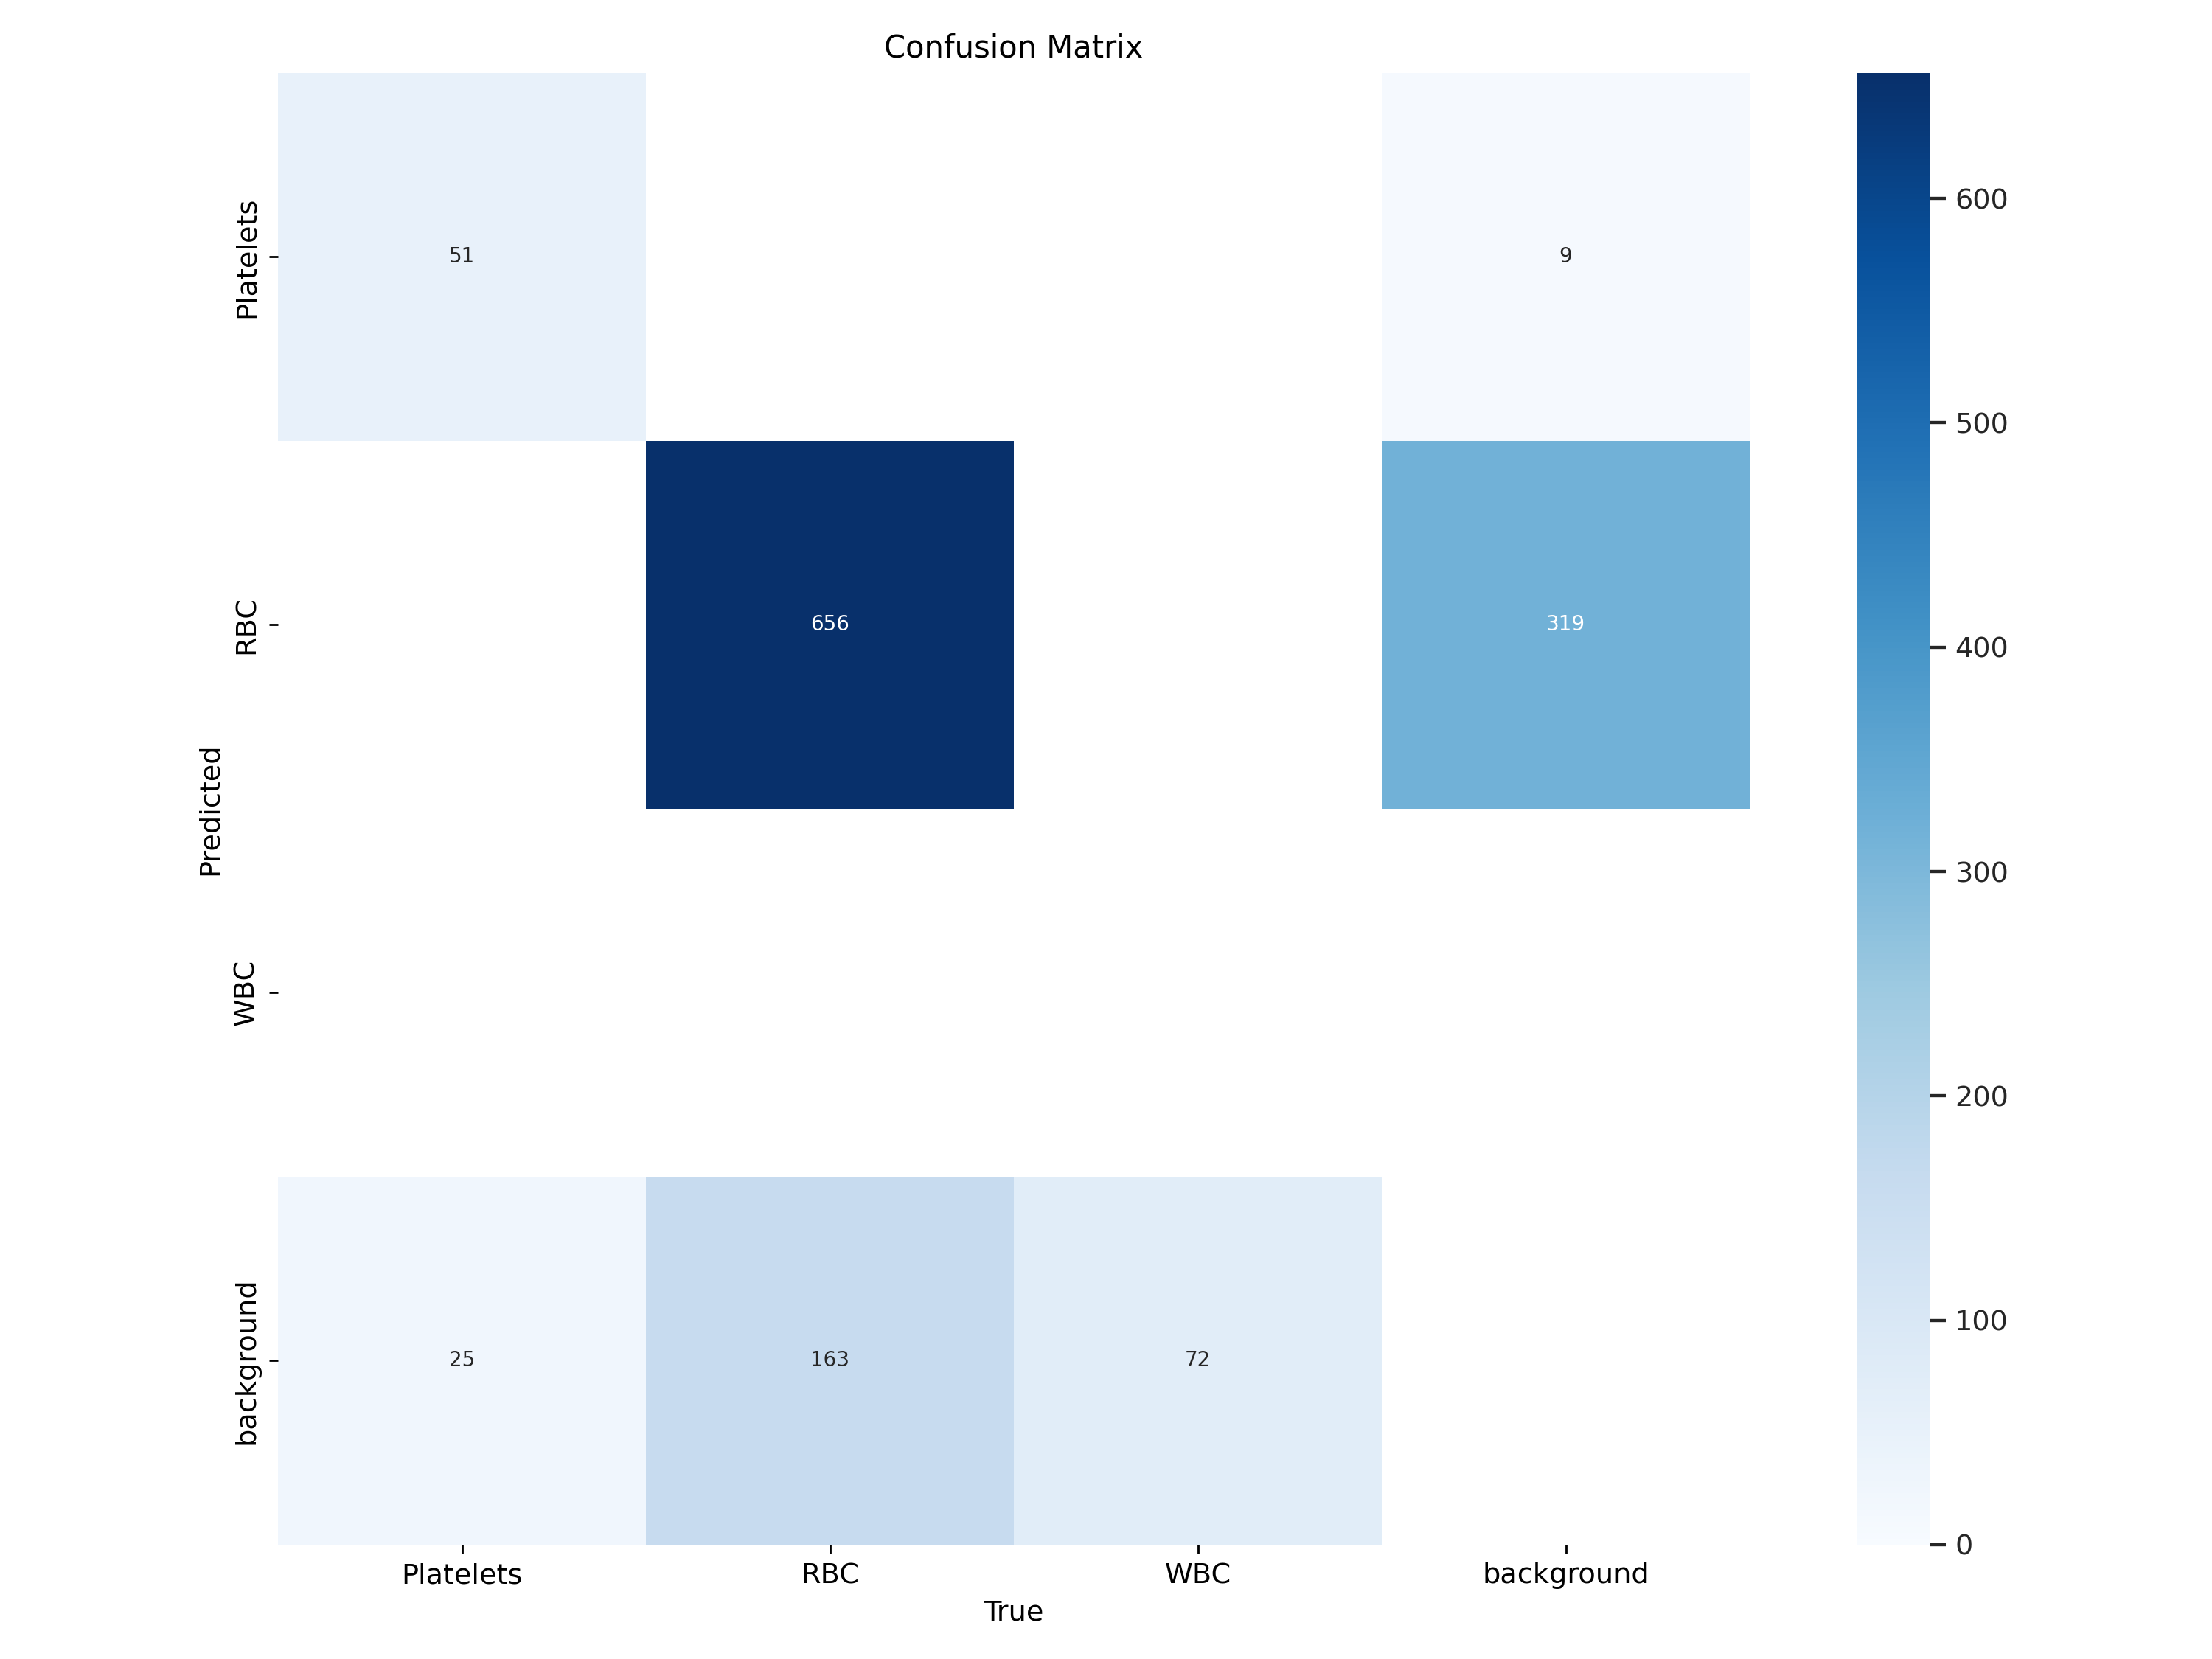

In [7]:
#runs/detect/V9/train_0605_BL

Image(filename= f'runs/detect/V9/train_0605_BL/confusion_matrix.png', width =800)

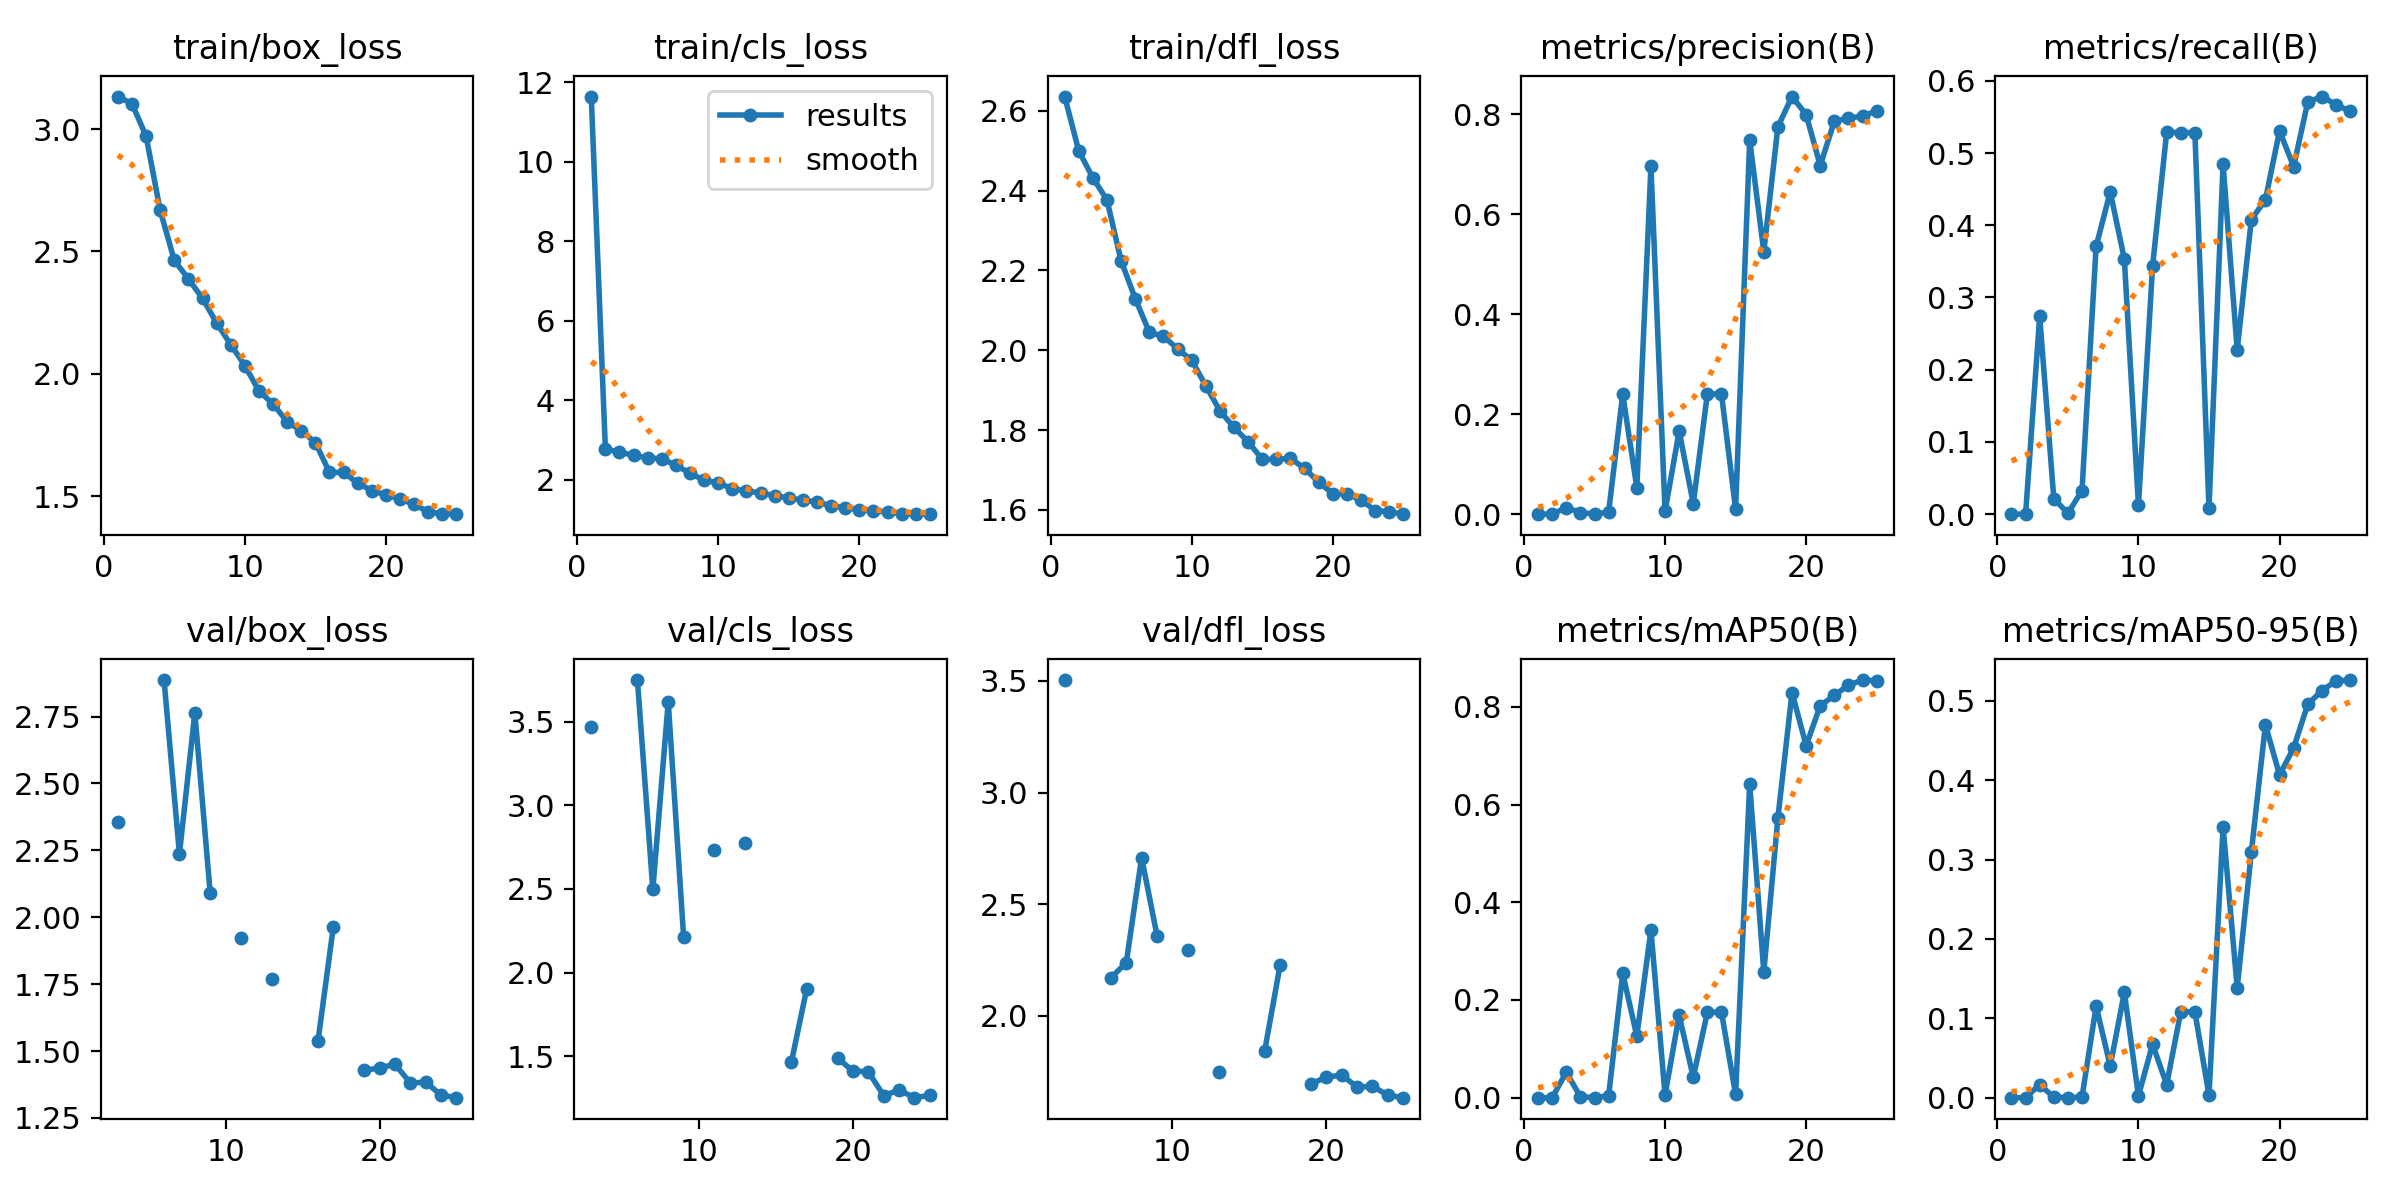

In [8]:
Image(filename= f'runs/detect/V9/train_0605_BL/results.png', width =750)

In [9]:
BL_val = YOLO('runs/detect/V9/train_0605_BL/weights/best.pt')
BL_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


                   all         73        967      0.808      0.558      0.853      0.526
             Platelets         73         76      0.845      0.789      0.849      0.372
                   RBC         73        819      0.578      0.867      0.797      0.522
                   WBC         73         72          1     0.0176      0.913      0.683
Speed: 0.1ms preprocess, 6.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14cbf771b4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Hyper Parameter Tuning (10 Iterations, 25 epochs)

In [12]:
HP_model =YOLO('yolov9c.pt')
HP_tune = HP_model.tune(data = 'DATA/data.yaml', epochs = 25)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.386      1.675      1.544        247        640: 100%|██████████| 48/48 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all         73        967      0.595      0.866      0.848      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.266     0.9866      1.375        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.843      0.512      0.739      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G       1.25     0.9594      1.369        225        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.686      0.507       0.71       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.256      0.955      1.378        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.658      0.765      0.792      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.216     0.8952      1.355        328        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967       0.79      0.915      0.892      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.175     0.8664      1.321        231        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.785      0.925      0.883      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.179      0.845      1.318        195        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.757      0.838      0.875      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.167     0.8303      1.316        342        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.804      0.878      0.893      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.157     0.8113      1.295        296        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967       0.75      0.795      0.857      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G       1.14     0.7897       1.29        250        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.809      0.914      0.899      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.121     0.7922      1.282        331        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.776      0.923      0.889      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.129     0.7919       1.28        327        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967      0.818      0.902      0.898      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.6G      1.131     0.7837      1.274        287        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.914      0.917      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.121     0.7701      1.284        327        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.819      0.917      0.902      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.091      0.743      1.257        220        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.842      0.887      0.915      0.615
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.098     0.7231      1.313        152        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.871      0.881      0.921      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.096     0.7207      1.323        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.827      0.903      0.905      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.075     0.7035      1.305        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.846      0.906      0.918      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.079     0.6992      1.302        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.841      0.912      0.922      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      1.059     0.6788      1.287        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.828      0.926      0.922      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.059     0.6728      1.307        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.854      0.913      0.924      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.051     0.6561      1.295        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.87      0.887       0.93      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.028     0.6414      1.283        159        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.865      0.903      0.927      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.007     0.6238      1.263        186        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.916      0.926      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9964     0.6165      1.252        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.883       0.87      0.923      0.657

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]


                   all         73        967      0.861      0.911      0.927      0.663
             Platelets         73         76      0.855      0.856       0.91      0.503
                   RBC         73        819      0.761      0.878      0.893       0.65
                   WBC         73         72      0.968          1      0.979      0.835
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (403.34s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.68899 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.86518, 'metrics/recall(B)': 0.9026, 'metrics/mAP50(B)': 0.92738, 'metrics/mAP50-95(B)': 0.6625, 'val/box_loss': 1.08918, 'val/cls_loss': 0.6672, 'val/dfl_loss': 1.30684, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0101' and 'momentum=0.94957' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.253       1.68      1.564        248        640: 100%|██████████| 48/48 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


                   all         73        967      0.541      0.687      0.653      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.143     0.9987      1.412        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.688       0.69       0.74      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.125     0.9449      1.393        222        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.585      0.884      0.837      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.128     0.9169        1.4        256        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.702      0.815      0.806      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.101     0.8938      1.368        330        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.778      0.853      0.883      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.074     0.8777      1.346        230        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.802      0.899       0.89      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.069     0.8484      1.337        200        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


                   all         73        967      0.841      0.893      0.906      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.061     0.8317      1.336        344        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.749      0.897      0.865      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.051     0.8126      1.319        300        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.825      0.931      0.909      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.062     0.8049      1.334        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.846      0.893      0.908      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.031     0.7961      1.316        331        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


                   all         73        967      0.804      0.891      0.899       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.012     0.7793      1.293        330        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.819      0.922      0.916      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.002     0.7653      1.279        287        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.863      0.862      0.919      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.017     0.7674      1.295        323        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.808      0.886      0.888      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G     0.9925     0.7546      1.277        221        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.859      0.895      0.911      0.636
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.004     0.7254      1.326        152        640: 100%|██████████| 48/48 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]


                   all         73        967       0.81      0.922      0.923      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G     0.9953     0.7218      1.335        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.871      0.898       0.93      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9919     0.7136       1.33        170        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.885      0.858      0.925       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9885     0.6899      1.317        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.836      0.905      0.924      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9625     0.6787      1.299        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.827      0.904      0.919      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      0.957     0.6694       1.31        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.823      0.934      0.924      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9438     0.6544      1.297        167        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.859      0.905      0.936      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9352     0.6409      1.291        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.874      0.883       0.93      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9163     0.6209      1.275        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.867      0.893      0.931      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9084     0.6213      1.265        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.896      0.867      0.933      0.664

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         73        967      0.895      0.867      0.933      0.664
             Platelets         73         76      0.852      0.855      0.917      0.517
                   RBC         73        819      0.866      0.745      0.898      0.643
                   WBC         73         72      0.968          1      0.984      0.834
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 2/10 iterations complete ✅ (808.12s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69129 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.89596, 'metrics/recall(B)': 0.86666, 'metrics/mAP50(B)': 0.93282, 'metrics/mAP50-95(B)': 0.66446, 'val/box_loss': 0.99735, 'val/cls_loss': 0.63809, 'val/dfl_loss': 1.32111, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01125' and 'momentum=0.96281' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00047), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.423      1.601      1.579        248        640: 100%|██████████| 48/48 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all         73        967      0.516      0.848      0.741      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.315     0.9724      1.406        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967       0.51      0.596      0.617      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.284     0.9076      1.387        222        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


                   all         73        967      0.661      0.564      0.615      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.313     0.9092      1.411        256        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967      0.724      0.778      0.809      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.249     0.8555      1.369        330        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967      0.755      0.942        0.9      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.229     0.8376       1.35        230        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.801      0.901      0.898      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.226     0.8179      1.344        199        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.814      0.898      0.899      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G       1.22     0.7949      1.341        343        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.821      0.932      0.914      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.193     0.7638       1.31        300        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.847      0.881      0.903       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.182     0.7578      1.315        254        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.81      0.931      0.917      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.183     0.7589      1.316        331        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.818      0.909      0.914      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.176     0.7535      1.303        329        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.839      0.875      0.909      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.153     0.7273      1.283        287        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.852      0.891      0.914      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.161     0.7336      1.302        323        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.827       0.88      0.898      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.139      0.715      1.281        221        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.821      0.903      0.913      0.621
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.136     0.6879      1.324        152        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.844      0.911       0.92      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.141      0.678      1.336        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967       0.85      0.883      0.914      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.127     0.6763      1.325        170        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.861      0.895       0.92       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.124     0.6625      1.318        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.869      0.868      0.922      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G        1.1     0.6507      1.302        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.849      0.893      0.917       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.095     0.6395      1.312        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.881      0.865      0.917      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.086     0.6324      1.303        167        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.858      0.877       0.92      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.068     0.6182      1.293        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.861       0.91      0.928      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.048     0.5966      1.277        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.873       0.87      0.925      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      1.044     0.5963      1.269        201        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.868      0.888      0.922      0.662

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 51.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


                   all         73        967       0.87      0.888      0.922      0.662
             Platelets         73         76      0.842      0.816       0.88      0.503
                   RBC         73        819      0.801      0.847      0.905      0.654
                   WBC         73         72      0.968          1      0.982      0.828
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 3/10 iterations complete ✅ (1216.58s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69129 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.89596, 'metrics/recall(B)': 0.86666, 'metrics/mAP50(B)': 0.93282, 'metrics/mAP50-95(B)': 0.66446, 'val/box_loss': 0.99735, 'val/cls_loss': 0.63809, 'val/dfl_loss': 1.32111, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.012' and 'momentum=0.95616' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.268      1.845      1.551        252        640: 100%|██████████| 48/48 [00:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         73        967      0.676       0.68      0.722      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.152      1.108      1.379        269        640: 100%|██████████| 48/48 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.612      0.744      0.727      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.148      1.089      1.374        220        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967       0.48      0.802      0.762      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.152      1.063      1.365        262        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         73        967      0.773      0.923      0.891      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G      1.127      1.001       1.35        335        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.782      0.848      0.868      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.094     0.9689      1.326        232        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.666      0.821      0.842      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.088     0.9453      1.309        202        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.819      0.902      0.908      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.076     0.9241      1.305        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.808      0.944      0.906      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.061     0.9036      1.289        308        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.832      0.903      0.917      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.068     0.8885      1.293        259        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.807      0.901        0.9      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.046     0.8843      1.284        340        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.804      0.845      0.893      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.034      0.874      1.274        345        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.816      0.895      0.913      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.022     0.8649      1.256        292        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.798      0.938      0.903      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G       1.03     0.8437      1.271        335        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.833      0.905       0.91      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.009     0.8236      1.253        224        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.792      0.843      0.866      0.563
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.016     0.8044      1.298        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.847      0.924      0.923      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.012     0.7887       1.31        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.844      0.901       0.91      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.002      0.782        1.3        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.849      0.896      0.922      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9952     0.7553      1.285        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.861      0.878      0.919      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9763     0.7515      1.269        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967       0.81      0.927      0.919      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9739     0.7368      1.283        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.861      0.901      0.924       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9611      0.725      1.271        163        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.837      0.924      0.925      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9501     0.7085      1.265        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.849       0.91      0.931      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      0.935     0.6894      1.249        180        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.851      0.909      0.928      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9259     0.6875       1.24        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.871        0.9      0.934      0.669

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 51.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


                   all         73        967      0.871        0.9      0.933      0.669
             Platelets         73         76      0.821      0.908      0.917      0.519
                   RBC         73        819      0.823      0.793      0.896      0.649
                   WBC         73         72      0.968          1      0.987      0.841
Speed: 0.1ms preprocess, 6.8ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/train5
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 4/10 iterations complete ✅ (1625.62s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01222' and 'momentum=0.97805' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00045), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.469      1.845      1.552        256        640: 100%|██████████| 48/48 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]


                   all         73        967      0.257       0.77      0.332      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.359      1.122      1.382        274        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


                   all         73        967       0.13      0.268     0.0542       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.331      1.079      1.393        215        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]


                   all         73        967      0.602      0.803      0.842      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.365      1.085      1.433        264        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.655      0.855      0.806      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.3G      1.304      1.015      1.395        343        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.656      0.782      0.745      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.284     0.9946      1.373        236        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967        0.8      0.924       0.89      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.275     0.9666      1.371        203        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.805      0.922      0.901      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.268     0.9325      1.352        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.755      0.846      0.858      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.256     0.9173      1.341        315        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.83      0.882       0.89      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.245     0.8972      1.331        263        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.783      0.931      0.886       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.231     0.8944      1.333        346        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.831      0.905        0.9      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.206     0.8804      1.308        350        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.836      0.903      0.904      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.189     0.8553      1.298        297        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.807        0.9      0.891      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G       1.21     0.8459      1.318        340        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.794      0.908      0.892      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.177     0.8228      1.301        225        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.843      0.898      0.906      0.622
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.196      0.816      1.346        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.837      0.912      0.922      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.193     0.8028      1.339        176        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.798      0.897      0.912      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.187     0.8101      1.341        168        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.817      0.953      0.923       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.173     0.7847      1.331        159        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.818      0.906      0.914      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      1.161     0.7692      1.321        161        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967       0.85      0.894      0.926      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.149      0.751      1.323        144        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.872      0.873      0.921      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.142     0.7386      1.312        162        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.853      0.894      0.918      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.127     0.7273      1.314        157        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.839      0.927      0.916      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.103     0.7126      1.291        178        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.844      0.901      0.917      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      1.094     0.6944      1.281        198        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.825      0.919      0.917      0.658

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 51.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


                   all         73        967      0.845      0.901      0.917      0.663
             Platelets         73         76      0.792      0.882      0.893      0.512
                   RBC         73        819      0.786      0.822      0.884      0.642
                   WBC         73         72      0.958          1      0.973      0.834
Speed: 0.1ms preprocess, 7.5ms inference, 0.2ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train6
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 5/10 iterations complete ✅ (2035.65s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01144' and 'momentum=0.95544' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.135      1.666      1.526        251        640: 100%|██████████| 48/48 [00:15<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


                   all         73        967      0.645       0.74      0.804      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.052      1.021      1.376        270        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967      0.609      0.737      0.795      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.036      1.003      1.372        221        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.733      0.864      0.852      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.024     0.9595      1.366        261        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]


                   all         73        967      0.797       0.87      0.875      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G      1.014     0.9216       1.36        335        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.772      0.789      0.824      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G     0.9824     0.9075      1.323        230        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.789      0.916      0.917      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G     0.9923     0.8826      1.329        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.824      0.896      0.902      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G     0.9635     0.8457       1.31        348        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.808      0.924      0.906      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      0.951     0.8329      1.281        307        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.825      0.925      0.906      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G     0.9423     0.8088      1.279        256        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.803      0.906      0.893      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G     0.9347     0.8099      1.276        340        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.805       0.92      0.897      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G     0.9369     0.8067      1.277        339        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.835      0.888      0.906      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G     0.9117     0.7944       1.25        292        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.788      0.937      0.905      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G     0.9195     0.7764      1.265        335        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.809      0.903      0.919      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G     0.9069     0.7615      1.253        223        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.81      0.877      0.903      0.586
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G     0.9062     0.7352      1.295        150        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.827      0.939      0.924      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G     0.9096     0.7295      1.305        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.808       0.93      0.918      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9028     0.7307        1.3        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.83      0.854      0.905      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9004      0.704      1.287        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967       0.84      0.896      0.923      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.8782     0.6934       1.27        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.842      0.897       0.92       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.8725     0.6801      1.281        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]


                   all         73        967      0.819      0.935      0.918      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.8621     0.6652      1.268        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]


                   all         73        967      0.849      0.905      0.925       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.8486     0.6515      1.259        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.832      0.914      0.927      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.8349     0.6319      1.243        184        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.87      0.878      0.923      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.8307     0.6297       1.23        173        640:  40%|███▉      | 19/48 [00:05<00:08,  3.56it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.169      1.063      1.316        270        640: 100%|██████████| 48/48 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]


                   all         73        967      0.577      0.413       0.54      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G       1.16      1.022      1.296        219        640: 100%|██████████| 48/48 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967      0.716      0.862       0.87      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.158      1.015      1.308        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.766      0.955      0.895      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G       1.12      0.952      1.282        333        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.764      0.922      0.876      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.095     0.9182      1.254        233        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]


                   all         73        967      0.757      0.929        0.9      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.086     0.9102      1.243        202        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967       0.84        0.9      0.905      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.086     0.8953       1.25        343        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967      0.805        0.9      0.892      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.074     0.8549      1.225        301        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.821      0.875      0.887      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.062     0.8382      1.229        253        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.804      0.868      0.883      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.037      0.833      1.213        334        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.802      0.919      0.906      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.034     0.8286      1.206        331        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.819       0.92       0.91      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.029     0.8077        1.2        290        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.834      0.906      0.907      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.036     0.8045      1.209        326        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.814      0.879      0.897      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G       1.01     0.7841      1.187        220        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.842      0.904      0.906      0.641
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.011     0.7563      1.226        151        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.853      0.906      0.922      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.004     0.7465      1.234        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.846      0.887      0.916      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9923      0.738      1.223        171        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.819      0.923      0.918      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9929     0.7205      1.218        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.836      0.913      0.926      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9789     0.7101      1.206        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.839      0.911      0.916       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9623     0.6928      1.211        149        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.856       0.91      0.929      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9551     0.6829      1.203        168        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.897      0.927      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      0.953     0.6717      1.197        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.864      0.913      0.931      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9253     0.6474      1.176        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.867       0.88      0.928      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9209     0.6354       1.17        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.849       0.91      0.927       0.66

25 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 51.6MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         73        967      0.851      0.909      0.928      0.661
             Platelets         73         76      0.804      0.895      0.909      0.506
                   RBC         73        819      0.783      0.833      0.889       0.64
                   WBC         73         72      0.966          1      0.985      0.835
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 7/10 iterations complete ✅ (2846.27s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00848' and 'momentum=0.89008' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0006), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.256       2.03      1.233        225        640: 100%|██████████| 48/48 [00:16<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all         73        967       0.42      0.802      0.499      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.6G      1.184      1.238      1.146        251        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.682      0.769      0.806      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.156      1.192      1.126        188        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.722      0.795       0.83      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.135      1.137      1.123        288        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.674      0.878       0.87      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.6G      1.125      1.098      1.131        282        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


                   all         73        967      0.842      0.721      0.842       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.085      1.044      1.086        249        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967       0.84      0.871      0.889      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.069       1.05      1.066        215        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.661      0.777      0.775      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.073       1.02      1.077        232        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.829       0.88      0.906      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.061     0.9923      1.073        280        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.787      0.893        0.9      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.049     0.9714      1.063        217        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.786      0.908      0.905      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.033     0.9457      1.052        226        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.831        0.9      0.912       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.6G      1.033     0.9481      1.039        258        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.847      0.901      0.925      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.033      0.943      1.047        217        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.816      0.917      0.905      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.032     0.9183       1.04        217        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.844      0.877      0.906      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.6G      1.018     0.9164      1.045        179        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967        0.8      0.874      0.878      0.606
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.007     0.8624      1.043        151        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.844      0.869      0.917      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.005     0.8565      1.046        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.908      0.912      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9976     0.8451      1.038        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.803      0.928      0.916      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9904     0.8278       1.03        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.803      0.922      0.914      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9776     0.8229      1.026        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.865      0.885      0.924      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      0.972     0.8123      1.033        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.872      0.875       0.93       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9619     0.7896      1.027        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.857      0.894      0.926      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9512     0.7779      1.021        159        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.857      0.904      0.928      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      0.938     0.7573      1.004        183        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.867      0.885      0.922      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9295     0.7512          1        200        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.868       0.88      0.924      0.664

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 51.6MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all         73        967      0.852      0.909      0.928      0.666
             Platelets         73         76      0.783      0.903      0.899      0.522
                   RBC         73        819      0.807      0.823      0.896       0.65
                   WBC         73         72      0.966          1      0.989      0.826
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 8/10 iterations complete ✅ (3250.17s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.012' and 'momentum=0.97019' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00059), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G       1.28      1.841      1.422        253        640: 100%|██████████| 48/48 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]


                   all         73        967      0.645      0.874      0.849      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.191      1.138      1.289        271        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.493        0.8      0.522      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.169      1.054      1.287        218        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]


                   all         73        967      0.599      0.747      0.784      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.182      1.068      1.303        264        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


                   all         73        967      0.657       0.85      0.845      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.2G       1.13     0.9856      1.264        342        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.809      0.914      0.896      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.113     0.9622      1.253        233        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.814      0.916      0.904      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.101     0.9314      1.245        202        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.844      0.877      0.907      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G       1.11      0.924      1.246        347        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967      0.807      0.895      0.903      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.099     0.9041      1.228        312        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.82      0.909      0.909      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.071     0.8654      1.223        260        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.84      0.892      0.902      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.058     0.8849      1.223        344        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.782      0.907      0.905      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.054     0.8749      1.208        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967       0.84       0.91      0.919       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G       1.04     0.8417      1.194        297        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.851      0.905       0.91      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.059      0.838      1.222        340        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.805       0.92      0.907      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.031     0.8182      1.201        224        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.841      0.898      0.912      0.625
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.031     0.7997      1.232        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.839      0.939      0.929      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.044     0.7951      1.239        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.847      0.879      0.912       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.025     0.7924      1.237        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.893      0.919      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.017     0.7612      1.222        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.855      0.901      0.919      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      0.999     0.7498      1.213        161        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.848      0.918      0.922      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9958     0.7357      1.219        144        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.868      0.913      0.922      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9865     0.7276        1.2        163        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.865      0.903      0.929       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9762     0.7062      1.195        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.859      0.898      0.918      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9573     0.6906       1.18        179        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.856      0.907      0.923      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9508     0.6822      1.178        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.876      0.881      0.927      0.661

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 51.6MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


                   all         73        967      0.875      0.881      0.927      0.661
             Platelets         73         76      0.836      0.855      0.904      0.511
                   RBC         73        819      0.823      0.789      0.895      0.646
                   WBC         73         72      0.965          1      0.982      0.826
Speed: 0.1ms preprocess, 7.2ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 9/10 iterations complete ✅ (3654.74s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00843' and 'momentum=0.88422' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00061), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.257      2.046       1.26        226        640: 100%|██████████| 48/48 [00:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         73        967      0.615      0.773      0.669      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.6G       1.18      1.269      1.149        250        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.565      0.464      0.467       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.179      1.203      1.123        187        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.714      0.739       0.83      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.177      1.172      1.137        291        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.691      0.845      0.806      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.7G      1.123      1.113      1.112        287        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.776      0.865      0.867      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.101      1.071      1.082        275        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.807       0.86       0.85       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.095      1.078      1.076        220        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.791      0.851      0.875      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.093      1.054      1.079        233        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.824      0.875      0.896      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.059     0.9999      1.062        241        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.814      0.893       0.91      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.047      1.007      1.044        298        640: 100%|██████████| 48/48 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.802      0.889      0.897      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.049     0.9821      1.045        173        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.835      0.889      0.904      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.6G      1.039     0.9707       1.05        256        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.839      0.869      0.905      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.037     0.9743      1.036        303        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.891      0.913      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.037      0.957      1.026        247        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.808      0.928      0.905      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.6G      1.029     0.9547      1.038        210        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.836      0.903      0.914      0.636
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.023     0.8869       1.05        150        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.841      0.931      0.918      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.005      0.872      1.054        176        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.867      0.891      0.927      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G          1     0.8689      1.046        169        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967       0.82      0.898      0.912        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.001     0.8607       1.04        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.855      0.891      0.918      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9822     0.8435      1.028        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.838      0.897      0.917      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9821     0.8161      1.038        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.861      0.885      0.928      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9712     0.8114      1.028        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.862       0.91      0.927      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      0.961     0.7973      1.026        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.857      0.906      0.923      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9435     0.7814      1.011        182        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.848      0.896      0.916      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      0.936     0.7735      1.003        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.866      0.885      0.922      0.661

25 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 51.6MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


                   all         73        967      0.857      0.906      0.923      0.663
             Platelets         73         76      0.808      0.868      0.898      0.511
                   RBC         73        819      0.796       0.85      0.898      0.655
                   WBC         73         72      0.967          1      0.974      0.822
Speed: 0.1ms preprocess, 6.4ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train11
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 10/10 iterations complete ✅ (4062.17s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness

In [15]:
HP_best_params ={
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov9c.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True
    ,'lr0': 0.012
,'lrf': 0.00953
,'momentum': 0.95616
,'weight_decay': 0.00055
,'warmup_epochs': 2.89036
,'warmup_momentum': 0.7679
,'box': 6.89819
,'cls': 0.54484
,'dfl': 1.47846
,'hsv_h': 0.01551
,'hsv_s': 0.79874
,'hsv_v': 0.37483
,'degrees': 0.0
,'translate': 0.09989
,'scale': 0.54783
,'shear': 0.0
,'perspective': 0.0
,'flipud': 0.0
,'fliplr': 0.38949
,'bgr': 0.0
,'mosaic': 1.0
,'mixup': 0.0
,'copy_paste': 0.0}


In [17]:
HP_best_mod = YOLO('runs/detect/V9/Tuned_HP_0605/tune2/weights/best.pt')
HP_best_results = HP_best_mod.train(**HP_best_params)

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.012, momentum=0.95616) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       5.5G      1.312      1.338      1.361        252        416: 100%|██████████| 48/48 [00:08<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

                   all         73        967   0.000882    0.00463   0.000442   0.000177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.72G      1.267      1.193      1.367        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967   0.000514     0.0324   0.000398    0.00011

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.66G      1.234      1.149      1.347        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

                   all         73        967    0.00516     0.0231    0.00237   0.000807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.72G      1.263      1.153      1.364        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         73        967      0.625      0.575      0.634      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.73G      1.182       1.07      1.325        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        967      0.504      0.653      0.646      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.73G      1.164      1.039      1.301        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         73        967      0.665      0.716       0.76      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.71G      1.154      1.028      1.313        202        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]

                   all         73        967      0.722      0.783      0.793      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.68G       1.16      1.011      1.324        349        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         73        967      0.681      0.853      0.847      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.72G      1.128      0.986      1.289        307        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         73        967       0.78      0.862      0.877      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.71G      1.111     0.9594      1.287        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         73        967      0.778      0.885      0.888      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.73G      1.109     0.9564      1.287        340        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]

                   all         73        967      0.708      0.826       0.84      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.73G      1.121     0.9727        1.3        344        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         73        967      0.816      0.897       0.91      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.67G        1.1     0.9554      1.278        292        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]

                   all         73        967      0.833      0.904      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.71G      1.097     0.9296      1.291        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         73        967      0.752      0.834      0.843      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.67G       1.09     0.9128      1.275        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         73        967      0.809       0.93      0.911      0.603


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.65G      1.088     0.9143      1.326        149        416: 100%|██████████| 48/48 [00:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         73        967      0.771      0.799      0.809      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.67G      1.078     0.9242      1.316        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         73        967      0.759      0.877      0.855      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.67G      1.085      0.928      1.333        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]

                   all         73        967      0.815      0.791      0.798      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.66G      1.087     0.9009      1.337        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         73        967      0.805      0.898      0.889      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.66G      1.077     0.8991      1.317        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]

                   all         73        967      0.831      0.864      0.882      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.66G      1.073     0.8876      1.332        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]

                   all         73        967      0.856      0.907      0.913      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.67G      1.051     0.8724      1.313        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]

                   all         73        967       0.84      0.899      0.914      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.67G      1.035     0.8538      1.303        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         73        967      0.828      0.915      0.906      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.67G      1.016     0.8202      1.291        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all         73        967      0.833      0.924      0.916      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.68G      1.011     0.8138      1.277        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         73        967      0.846      0.906      0.908      0.638



25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         73        967      0.833      0.924      0.916      0.648
             Platelets         73         76      0.829      0.882      0.886      0.498
                   RBC         73        819        0.7      0.891      0.879      0.633
                   WBC         73         72       0.97          1      0.982      0.814
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


## Tuning HP 100 Iterations, 25 epochs

In [6]:
params  = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov9c.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': True # specifically train the model
}
model = YOLO('yolov9c.pt')
results =  model.tune( iterations = 100, **params)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/100 with hyperparameters: {'lr0': 0.1, 'lrf': 0.0001, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tr

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.133      11.64      2.636        246        416: 100%|██████████| 48/48 [00:26<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.115      2.762      2.514        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      3.017      2.737      2.424        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]


                   all         73        967    0.00799      0.214     0.0132     0.0033

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      2.737      2.678      2.285        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]


                   all         73        967        0.2      0.241      0.103     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.22G      2.435       2.48      2.091        329        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.37it/s]


                   all         73        967        0.2      0.241      0.103     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.275      2.302       1.97        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967    0.00704      0.127    0.00752     0.0026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      2.204      2.181      1.968        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.878      0.101      0.191     0.0692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.142      2.016      1.955        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.129      0.325      0.189      0.067

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      2.043      1.835      1.892        296        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.63it/s]


                   all         73        967      0.537      0.383      0.446       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G       2.03      1.802      1.914        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]


                   all         73        967   0.000981    0.00122   0.000765   0.000251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G      1.929       1.66      1.831        331        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]


                   all         73        967      0.126      0.507      0.273      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      1.872      1.601      1.784        326        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.334      0.395      0.311     0.0824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G      1.804      1.515      1.735        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]


                   all         73        967      0.599      0.532      0.542       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.783      1.483      1.762        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         73        967      0.194      0.282      0.264      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      1.734      1.379      1.698        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.563      0.642      0.676      0.326
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.18G      1.619      1.332      1.678        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.686      0.754      0.759      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.577      1.269      1.658        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.674      0.739      0.781      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.543      1.216      1.634        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.751      0.738      0.823      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.507      1.204      1.606        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.686      0.741       0.79      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.489      1.144      1.574        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.741      0.765      0.818      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G       1.47      1.128      1.585        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.763      0.833      0.844      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.18G      1.439      1.099       1.55        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.732      0.883      0.842      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.413      1.071      1.537        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.675      0.819      0.809      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.397      1.052      1.534        186        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.664      0.911      0.854       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.395      1.055      1.526        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.682       0.92      0.867       0.53

25 epochs completed in 0.066 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]


                   all         73        967      0.682      0.922      0.867       0.53
             Platelets         73         76      0.638      0.895      0.841      0.385
                   RBC         73        819      0.453      0.951      0.803      0.529
                   WBC         73         72      0.957      0.919      0.956      0.675
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/100 iterations complete ✅ (332.75s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00051), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.049      7.345      2.666        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.884      2.637      2.476        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]


                   all         73        967    0.00529   0.000814    0.00161   0.000323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G       2.48      2.476      2.513        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.06it/s]


                   all         73        967    0.00955     0.0142    0.00502     0.0018

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       5.2G      2.474      2.647      2.649        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.32it/s]


                   all         73        967     0.0238   0.000407      0.012     0.0048

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.21G      2.295      2.227      2.434        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967     0.0667     0.0612     0.0571     0.0197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.389      2.405      2.511        229        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967     0.0926       0.45      0.215     0.0768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.182      2.091      2.321        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.703     0.0855      0.138     0.0428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.107      1.969      2.268        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.076      0.479      0.275     0.0881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.047      1.838      2.193        295        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967    0.00364     0.0962     0.0052    0.00151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      1.999      1.738      2.156        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]


                   all         73        967      0.613      0.449      0.505      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.21G      1.918      1.594      2.097        330        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.308      0.252      0.305      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      1.856      1.488      2.036        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]


                   all         73        967      0.404      0.702      0.647      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      1.788      1.424      1.977        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]


                   all         73        967      0.706      0.477      0.645      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      1.782      1.416       1.98        328        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]


                   all         73        967      0.618       0.61      0.674      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.713      1.315      1.908        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.83it/s]


                   all         73        967      0.485      0.696      0.551      0.239
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.652      1.299      2.005        151        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.211      0.786      0.358      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.628      1.259      1.982        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]


                   all         73        967      0.449      0.681      0.521      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.578      1.207      1.941        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.677      0.752      0.783      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.551      1.179      1.905        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.477      0.942      0.764      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.522      1.137      1.882        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967       0.61      0.783      0.781      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      1.504      1.131      1.892        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.578       0.83      0.779      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.486      1.103      1.868        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.673      0.847      0.804       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G       1.46      1.085      1.849        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.659      0.935      0.842        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.448      1.062      1.834        185        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.661      0.947      0.841      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.443      1.065      1.822        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.644      0.934      0.833      0.491

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


                   all         73        967      0.659      0.935      0.843      0.499
             Platelets         73         76      0.681      0.855      0.804       0.38
                   RBC         73        819      0.446      0.949       0.79      0.492
                   WBC         73         72       0.85          1      0.934      0.625
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 2/100 iterations complete ✅ (570.23s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 0

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.09081, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00037), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.05G      3.195      6.473      2.454        264        416: 100%|██████████| 48/48 [00:09<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.249      2.289      2.246        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G       3.19      2.264      2.215        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967    0.00471       0.26    0.00397    0.00121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       5.2G      3.165      2.296      2.155        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967     0.0147      0.453     0.0217    0.00524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       5.2G      3.229      2.327      2.241        345        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967   0.000457      0.139    0.00137   0.000401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.19G      3.069      2.229      2.164        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967    0.00472      0.126    0.00326    0.00104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.21G      2.605      2.011      1.938        204        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967     0.0312       0.12     0.0239    0.00815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.431      1.878      1.878        358        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]


                   all         73        967    0.00467      0.125    0.00334   0.000683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.21G      2.299      1.804      1.784        331        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967     0.0248       0.39     0.0616     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.215      1.697      1.724        289        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967    0.00166     0.0261    0.00088   0.000274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.21G      2.154      1.582      1.706        350        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967        0.1        0.1     0.0592     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      2.112      1.544      1.679        354        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]


                   all         73        967      0.362      0.778      0.632      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.011      1.376      1.617        312        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.88it/s]


                   all         73        967      0.338    0.00448    0.00142   0.000571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       5.2G      1.972      1.333      1.594        343        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.838     0.0473     0.0549     0.0246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       5.2G      1.937      1.275      1.567        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]


                   all         73        967      0.142       0.13      0.109     0.0468
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.802      1.254      1.562        145        416: 100%|██████████| 48/48 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.867      0.213      0.585      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.746      1.188      1.537        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967      0.568      0.519      0.538      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.705      1.132      1.511        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.511      0.206      0.353      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.684      1.095      1.493        156        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.492      0.632      0.647      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G       1.66      1.045      1.468        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.514      0.618      0.636      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.628      1.023      1.469        139        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.363      0.815      0.684      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G      1.601      1.001      1.458        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.419      0.815      0.723      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.594     0.9925      1.448        151        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.863      0.247      0.637      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G       1.57     0.9768       1.43        174        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.87      0.249      0.678      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.566     0.9741      1.423        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.872      0.245      0.667       0.37

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all         73        967       0.42       0.82      0.725      0.406
             Platelets         73         76      0.338      0.934      0.773      0.305
                   RBC         73        819     0.0379      0.998      0.709      0.419
                   WBC         73         72      0.884      0.528      0.694      0.492
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 3/100 iterations complete ✅ (808.60s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 0

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.09669, momentum=0.93425) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00053), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.259      10.84      2.582        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.198      2.572      2.404        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.69it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.158      2.507      2.356        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967     0.0428      0.107     0.0247    0.00396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.22G      3.087      2.475      2.349        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967    0.00755      0.273    0.00775    0.00183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       5.2G      3.054      2.442      2.273        394        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.70it/s]


                   all         73        967    0.00755      0.273    0.00775    0.00183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      2.967      2.414       2.24        305        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967       0.04     0.0855     0.0312    0.00945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      2.632      2.291      2.084        295        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]


                   all         73        967     0.0165      0.481      0.022    0.00669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.21G      2.359      2.115      1.924        329        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]


                   all         73        967    0.00311    0.00122    0.00157   0.000313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.23G      2.293       1.93      1.897        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.119      0.236     0.0939     0.0256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.196      1.805      1.846        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967    0.00268     0.0497    0.00155   0.000608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.22G        2.2      1.762      1.851        308        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]


                   all         73        967      0.338      0.157    0.00597    0.00175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.091      1.654      1.793        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]


                   all         73        967      0.481      0.181      0.219     0.0988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G      2.024      1.554      1.733        316        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]


                   all         73        967      0.729      0.321      0.533      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      1.986      1.523      1.749        289        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]


                   all         73        967      0.349      0.353      0.326     0.0912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.18G      1.962      1.474      1.722        317        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.80it/s]


                   all         73        967      0.629      0.523      0.682      0.343
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      1.828      1.395       1.71        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.588       0.73      0.691      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.776      1.341      1.707        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.407      0.553      0.509      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.18G      1.722      1.282      1.673        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.494      0.778       0.72      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.684      1.233      1.645        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.534      0.734      0.731      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.18G      1.637      1.177      1.612        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.511      0.647      0.739      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.18G       1.63      1.153      1.616        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.532      0.596      0.729      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.589      1.138      1.586        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.717      0.717      0.794      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.566      1.116      1.569        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.674      0.732      0.816      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.551        1.1      1.568        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.636      0.802      0.809       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.548      1.098      1.557        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967       0.67      0.808      0.814      0.474

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 51.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         73        967      0.668      0.808      0.814      0.474
             Platelets         73         76      0.823      0.491      0.729      0.293
                   RBC         73        819      0.434      0.933      0.735      0.434
                   WBC         73         72      0.746          1      0.978      0.694
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 4/100 iterations complete ✅ (1047.75s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.93633) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.023      7.438      2.553        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.053      2.724      2.466        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.657      2.811      2.303        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967    0.00718     0.0694    0.00481    0.00139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.365       2.45      2.114        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967     0.0154     0.0483     0.0077    0.00237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.293      2.512      2.149        329        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]


                   all         73        967   0.000127    0.00463   6.75e-05   1.35e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.21G       2.25      2.324      2.079        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.72it/s]


                   all         73        967      0.668    0.00463   0.000668   0.000519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      2.171      2.197      1.984        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.457       0.31      0.323     0.0958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.131      2.076      2.015        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.481      0.153       0.13     0.0679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.082      2.087      2.027        296        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]


                   all         73        967      0.242     0.0781       0.14      0.065

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G          2      1.843      1.966        306        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.377      0.144      0.108     0.0532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      1.919      1.728      1.912        320        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]


                   all         73        967      0.431      0.333       0.37      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      1.864      1.603      1.849        291        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.475      0.625      0.592      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.22G      1.766      1.489      1.793        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.528      0.608      0.648      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      1.758      1.469      1.793        286        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.279      0.929      0.643      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.22G      1.711      1.436      1.774        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.683       0.55      0.694      0.322
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.592      1.366      1.768        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.685       0.63      0.768      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.589       1.31      1.779        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.624      0.642      0.781      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.539      1.239      1.732        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.631      0.705      0.795      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.518      1.215      1.704        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.762      0.803      0.847      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.495      1.177      1.681        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.636      0.705        0.8      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      1.487      1.176      1.683        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.777      0.787      0.854      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.464      1.147      1.673        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.738      0.787      0.817      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.436      1.118      1.642        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967       0.75      0.815      0.848      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G       1.42      1.098      1.636        186        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.773      0.797      0.846      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.425      1.103      1.627        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.761      0.813      0.847      0.504

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 51.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]


                   all         73        967       0.76      0.812      0.847      0.504
             Platelets         73         76      0.791      0.658      0.826       0.38
                   RBC         73        819      0.616      0.779       0.74      0.439
                   WBC         73         72      0.874          1      0.976      0.691
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train5
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 5/100 iterations complete ✅ (1285.57s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.92006) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00046), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.988      12.86      2.503        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.992      2.978      2.323        273        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]


                   all         73        967   0.000186     0.0556    0.00011    2.4e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G          3      3.043      2.342        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]


                   all         73        967   0.000186     0.0556    0.00011    2.4e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.988      2.969      2.303        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


                   all         73        967    0.00119     0.0305    0.00159   0.000547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.21G       2.89      2.876      2.282        295        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]


                   all         73        967    0.00753      0.134    0.00454    0.00171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.824      2.846      2.261        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]


                   all         73        967      0.441      0.218      0.147     0.0642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.21G      2.802      2.936      2.222        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]


                   all         73        967    0.00905      0.242     0.0127    0.00307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.442      2.709      2.085        343        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967     0.0768      0.257     0.0855     0.0273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.229      2.447      1.928        301        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.49it/s]


                   all         73        967     0.0219      0.149      0.098     0.0493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.18G      2.121      2.278      1.893        340        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


                   all         73        967      0.159      0.105      0.131     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.17G      2.043      2.145       1.82        339        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.16it/s]


                   all         73        967      0.357     0.0586      0.187     0.0555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.18G      1.969      1.952      1.788        310        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]


                   all         73        967      0.169      0.578      0.297      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.23G      1.906      1.849      1.757        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]


                   all         73        967      0.686      0.305      0.233      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.844      1.761      1.712        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]


                   all         73        967      0.195      0.116      0.151     0.0719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      1.773      1.646      1.651        311        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]


                   all         73        967      0.253      0.131      0.212      0.118
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G       1.68      1.648      1.654        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.421      0.622      0.482      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.651      1.514      1.633        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         73        967      0.354        0.5      0.333      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.593      1.432      1.603        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.303      0.866      0.506      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.556      1.402      1.571        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.733       0.46      0.645      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.514      1.331      1.531        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         73        967      0.423      0.393      0.432      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      1.497      1.312      1.522        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.509      0.625      0.711      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G       1.47      1.283      1.506        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.538       0.66      0.761      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.442      1.252      1.486        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.614      0.643      0.791      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.419      1.232      1.476        185        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.564      0.658      0.794      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.431      1.241      1.474        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.702      0.638      0.802      0.426

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 51.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]


                   all         73        967      0.702      0.638      0.802      0.427
             Platelets         73         76          1          0      0.804      0.349
                   RBC         73        819      0.348      0.913      0.695      0.385
                   WBC         73         72      0.757          1      0.907      0.545
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 6/100 iterations complete ✅ (1521.96s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.56409 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.68176, 'metrics/recall(B)': 0.92038, 'metrics/mAP50(B)': 0.86693, 'metrics/mAP50-95(B)': 0.53045, 'val/box_loss': 1.31055, 'val/cls_loss': 1.15424, 'val/dfl_loss': 1.52482, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: Adam(lr=0.08164, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00053), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.626      5.965       2.99        239        416: 100%|██████████| 48/48 [00:09<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.618      2.229      2.879        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.538       2.17      2.779        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967     0.0158    0.00285    0.00843    0.00264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.21G      3.149      2.161      2.619        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]


                   all         73        967     0.0158    0.00285    0.00843    0.00264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.21G      2.797      2.009      2.381        394        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


                   all         73        967     0.0158    0.00285    0.00843    0.00264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.661      1.919      2.327        293        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.10it/s]


                   all         73        967     0.0158    0.00285    0.00843    0.00264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      2.566      1.775      2.222        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


                   all         73        967      0.136     0.0356     0.0234    0.00686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.459      1.653       2.21        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]


                   all         73        967      0.831      0.324      0.314      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.22G      2.411      1.555      2.208        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]


                   all         73        967      0.351      0.605      0.399      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       5.2G      2.348       1.46      2.175        379        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.438      0.634      0.568      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G       2.23      1.398      2.107        305        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


                   all         73        967     0.0886      0.281      0.197     0.0756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.181      1.298       2.06        316        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.226       0.57      0.233     0.0843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.106      1.245      2.027        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.542      0.472      0.486      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      2.064      1.199       2.02        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.507      0.669      0.536      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.982      1.143       1.96        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967       0.76      0.497      0.486      0.192
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.906      1.131      1.992        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]


                   all         73        967      0.757      0.521      0.698      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.837      1.084      1.949        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.656      0.458      0.448       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.802      1.026       1.92        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.644      0.475       0.53      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.764     0.9937      1.882        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.714      0.744      0.812      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.727      0.952      1.864        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.578      0.605      0.623      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      1.718     0.9475      1.854        142        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.702      0.822      0.851      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.702     0.9258      1.853        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967       0.79      0.813      0.855      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G       1.65     0.8972       1.81        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.783      0.821      0.852      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.643     0.8815      1.819        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.794      0.854      0.861       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.642     0.8872      1.802        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.791      0.866      0.869       0.55

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 51.6MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


                   all         73        967      0.792      0.866      0.869      0.549
             Platelets         73         76      0.829      0.737       0.82      0.406
                   RBC         73        819      0.627      0.862      0.814      0.535
                   WBC         73         72      0.919          1      0.972      0.707
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train7
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 7/100 iterations complete ✅ (1758.75s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58165 observed at iteration 7
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79079, 'metrics/recall(B)': 0.86629, 'metrics/mAP50(B)': 0.86881, 'metrics/mAP50-95(B)': 0.54974, 'val/box_loss': 1.56059, 'val/cls_loss': 0.83773, 'val/dfl_loss': 1.81151, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: Adam(lr=0.08066, momentum=0.97178) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.946       7.25      2.624        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.582      2.692      2.408        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      2.255      2.482      2.155        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.411     0.0129     0.0106    0.00213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.222      2.404      2.092        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]


                   all         73        967     0.0229     0.0833     0.0192    0.00482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.22G      2.165      2.288      2.048        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967      0.181      0.188      0.119     0.0463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.104      2.123      1.963        229        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.139      0.603      0.225     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.059      2.071      1.934        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]


                   all         73        967     0.0163      0.214     0.0234    0.00681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.068      2.055      1.974        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]


                   all         73        967      0.776      0.057     0.0515     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      1.954       1.84      1.893        294        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.71it/s]


                   all         73        967      0.776      0.057     0.0515     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      1.932      1.744      1.891        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.64it/s]


                   all         73        967       0.35     0.0152    0.00172   0.000537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.22G      1.888      1.684      1.863        330        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


                   all         73        967      0.592      0.263       0.33      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      1.861      1.677      1.841        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.743       0.45      0.694      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      1.809      1.619      1.811        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.542      0.557      0.517      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      1.778      1.569      1.797        328        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.617      0.491      0.574      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.733      1.493       1.74        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.677      0.541      0.592      0.279
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.647      1.461      1.743        151        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.663      0.692      0.712      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.629      1.397      1.754        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.635      0.762      0.821      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.579      1.354      1.707        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.602      0.737      0.771      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.578      1.328      1.693        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967       0.66      0.795      0.813      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.539      1.275      1.648        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.761      0.806      0.848      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.542      1.271      1.668        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.749      0.842      0.838      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.507      1.244      1.636        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.738      0.734      0.808       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.491      1.207      1.622        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.766      0.881      0.851      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.473      1.194      1.604        185        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.758      0.856      0.844      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.479      1.192      1.602        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.756      0.865      0.848      0.508

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 51.6MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]


                   all         73        967      0.764      0.881      0.851      0.515
             Platelets         73         76      0.795      0.816      0.825      0.386
                   RBC         73        819       0.58       0.84      0.768      0.482
                   WBC         73         72      0.917      0.986      0.961      0.677
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 8/100 iterations complete ✅ (1995.04s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58165 observed at iteration 7
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79079, 'metrics/recall(B)': 0.86629, 'metrics/mAP50(B)': 0.86881, 'metrics/mAP50-95(B)': 0.54974, 'val/box_loss': 1.56059, 'val/cls_loss': 0.83773, 'val/dfl_loss': 1.81151, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: Adam(lr=0.09288, momentum=0.92809) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00051), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.214       5.75      2.661        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.299      2.734      2.568        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      2.902      2.589      2.393        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.17it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.573      2.507      2.206        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         73        967   0.000609   0.000814   0.000306   0.000123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.23G      2.418      2.358      2.124        333        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]


                   all         73        967   0.000609   0.000814   0.000306   0.000123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       5.2G      2.316      2.224      2.031        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967   0.000609   0.000814   0.000306   0.000123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.284      2.181      2.042        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967     0.0619      0.129     0.0581     0.0224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.195      2.017      2.044        348        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]


                   all         73        967      0.143      0.154      0.136     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.117      1.897      2.005        306        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967     0.0946      0.417      0.207      0.069

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      2.091      1.875      1.986        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967     0.0102      0.239     0.0126    0.00291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.19G      2.025      1.698      1.932        338        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]


                   all         73        967      0.313      0.233      0.269      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.19G       1.95      1.585      1.905        337        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         73        967      0.267      0.901      0.703      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      1.861      1.502      1.816        290        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.755      0.332      0.497       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      1.852      1.449      1.836        332        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.179       0.85      0.549      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      1.802      1.379      1.792        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]


                   all         73        967      0.797      0.248      0.626      0.267
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G       1.71      1.358      1.853        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.451      0.516      0.481      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      1.698      1.306      1.856        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.572      0.528      0.764      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G       1.66       1.25      1.806        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.799      0.513       0.68      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G       1.63      1.219      1.774        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.682      0.918      0.852       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.591      1.156      1.721        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.676      0.821      0.833      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G       1.57      1.155      1.728        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.707       0.84      0.834      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.542      1.112      1.691        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.753      0.842      0.864       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      1.511      1.097      1.673        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.769      0.866      0.876      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      1.499      1.075      1.671        183        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.714      0.865      0.865      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.496      1.077      1.662        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.758       0.89       0.88      0.537

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 51.6MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


                   all         73        967      0.758      0.891       0.88      0.537
             Platelets         73         76      0.715      0.892      0.862      0.388
                   RBC         73        819      0.599      0.879      0.802      0.527
                   WBC         73         72      0.958      0.903      0.975      0.695
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 9/100 iterations complete ✅ (2233.46s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58165 observed at iteration 7
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79079, 'metrics/recall(B)': 0.86629, 'metrics/mAP50(B)': 0.86881, 'metrics/mAP50-95(B)': 0.54974, 'val/box_loss': 1.56059, 'val/cls_loss': 0.83773, 'val/dfl_loss': 1.81151, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: Adam(lr=0.08164, momentum=0.94241) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00056), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.328      5.414      2.998        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       3.11      2.102      2.788        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.648       1.94      2.507        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      2.539      2.033      2.451        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967     0.0104      0.137     0.0105    0.00342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.454      1.853      2.308        391        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]


                   all         73        967     0.0104      0.137     0.0105    0.00342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.371      1.792      2.235        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


                   all         73        967     0.0307     0.0828     0.0165    0.00208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.317      1.705      2.191        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.482      0.291      0.302      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      2.217      1.556       2.17        267        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]


                   all         73        967      0.216      0.284      0.164     0.0786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       5.2G      2.168      1.475      2.161        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


                   all         73        967      0.832      0.245      0.464      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.19G      2.099      1.388      2.123        376        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.19it/s]


                   all         73        967    0.00595      0.159    0.00445    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      2.049      1.316      2.078        302        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.157      0.661      0.209     0.0734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      2.037      1.294      2.089        316        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.321      0.301      0.231     0.0732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      1.971      1.245      2.046        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.469      0.719      0.597      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.12G      1.929      1.191      2.039        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]


                   all         73        967      0.741       0.42      0.529      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.11G      1.886      1.144      1.981        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967      0.598      0.688      0.686       0.32
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G       1.77      1.106      1.973        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.586      0.691      0.745      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      1.759      1.084       1.99        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.536      0.842      0.654      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.713      1.033      1.948        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.691      0.698      0.759      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      1.696      1.004      1.919        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.677      0.734      0.827      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.665     0.9729      1.885        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967       0.77      0.764      0.863       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      1.655     0.9648      1.886        142        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967      0.776      0.833      0.858      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.633     0.9423      1.879        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.821       0.78      0.833      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.599     0.9177      1.831        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.73      0.869      0.864      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.588     0.9035      1.845        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.753      0.813      0.839      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.581     0.9072      1.835        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.776      0.815      0.859      0.533

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 51.6MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


                   all         73        967      0.776      0.815      0.859      0.533
             Platelets         73         76      0.795      0.645      0.812      0.361
                   RBC         73        819      0.624      0.801      0.786      0.506
                   WBC         73         72      0.908          1      0.978      0.731
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 10/100 iterations complete ✅ (2471.33s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58165 observed at iteration 7
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79079, 'metrics/recall(B)': 0.86629, 'metrics/mAP50(B)': 0.86881, 'metrics/mAP50-95(B)': 0.54974, 'val/box_loss': 1.56059, 'val/cls_loss': 0.83773, 'val/dfl_loss': 1.81151, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: Adam(lr=0.09354, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00061), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.769      8.584      3.042        281        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.749      2.554      2.868        286        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967    0.00437     0.0374    0.00239    0.00087

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.22G      3.287      2.364      2.799        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


                   all         73        967    0.00125     0.0154    0.00064   0.000247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.13G      2.969      2.185      2.608        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         73        967    0.00125     0.0154    0.00064   0.000247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.829       2.19      2.475        288        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967    0.00125     0.0154    0.00064   0.000247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      2.748      2.167      2.375        278        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.129      0.564      0.317      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G       2.64      2.046      2.291        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.337      0.111      0.178      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.561      2.001      2.256        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.368      0.329      0.237      0.093

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      2.488      1.829      2.226        191        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]


                   all         73        967      0.295      0.251      0.222     0.0903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       5.2G      2.429      1.729      2.165        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]


                   all         73        967      0.538      0.351      0.316       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.19G      2.316      1.625      2.101        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]


                   all         73        967      0.771      0.133      0.215      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.23G      2.283      1.532      2.088        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]


                   all         73        967      0.638      0.372      0.499      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.182      1.463      2.038        229        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.747      0.429      0.599      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      2.111      1.379      1.996        316        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.568      0.405       0.35      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.22G      2.076      1.316      1.962        278        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]


                   all         73        967      0.195    0.00908      0.014    0.00602
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.981      1.302      1.974        149        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.507      0.734      0.672      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      1.924       1.23      1.955        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.661      0.789      0.776      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G       1.91      1.193      1.946        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967       0.74      0.521      0.559      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.866      1.146       1.88        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.669      0.759      0.834       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.835      1.092      1.862        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.633      0.796      0.812      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      1.811      1.086      1.857        140        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967       0.64      0.843      0.844      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.788      1.054      1.839        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.721      0.791      0.844      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.765      1.037      1.822        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.733      0.807      0.852      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      1.743      1.022      1.815        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.766      0.774       0.84      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.728      1.016      1.799        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.723      0.802       0.84      0.498

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 51.6MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]


                   all         73        967      0.733      0.807      0.852      0.499
             Platelets         73         76      0.858      0.579      0.812      0.347
                   RBC         73        819      0.615      0.841      0.792      0.487
                   WBC         73         72      0.726          1      0.953      0.662
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train11
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 11/100 iterations complete ✅ (2710.11s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58165 observed at iteration 7
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79079, 'metrics/recall(B)': 0.86629, 'metrics/mAP50(B)': 0.86881, 'metrics/mAP50-95(B)': 0.54974, 'val/box_loss': 1.56059, 'val/cls_loss': 0.83773, 'val/dfl_loss': 1.81151, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: Adam(lr=0.08481, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00048), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.708       8.89      3.375        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.997      2.998      2.923        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.39it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.449      2.677      2.586        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.381      2.577      2.528        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]


                   all         73        967   0.000962    0.00163   0.000487   0.000148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.18G      3.251       2.54      2.455        320        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967       0.88     0.0482     0.0949      0.034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.164      2.497      2.405        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967       0.14     0.0459       0.03     0.0125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      3.162      2.447      2.407        198        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]


                   all         73        967       0.48      0.206      0.177     0.0718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.195      2.363      2.437        328        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]


                   all         73        967      0.103      0.152     0.0485     0.0146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G       3.09      2.201      2.381        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.191      0.219    0.00672    0.00204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      2.989      2.119      2.357        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.425      0.453      0.431      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.924      1.977      2.325        324        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]


                   all         73        967      0.496      0.151      0.165     0.0688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      2.868       1.92      2.278        323        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]


                   all         73        967       0.66      0.673        0.7      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.737      1.786      2.229        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.326      0.363       0.32       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.698      1.741      2.192        312        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.488      0.716      0.753      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G       2.61      1.652      2.127        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.576      0.599      0.558      0.224
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.469      1.585      2.102        155        416: 100%|██████████| 48/48 [00:07<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967       0.65      0.508      0.563      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      2.469       1.55      2.098        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.693      0.758      0.773      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.425      1.511      2.096        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.724      0.553      0.621      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.389      1.474      2.048        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.733      0.815      0.846       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      2.334      1.426      2.009        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.665      0.829       0.82      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      2.299      1.393      1.997        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.664      0.835      0.833      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      2.266      1.354      1.973        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.817      0.846      0.865       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.243      1.327      1.967        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.791      0.814      0.869      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.208      1.306      1.938        189        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.794      0.884      0.871      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      2.205      1.313      1.935        203        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.802      0.893      0.882      0.558

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 51.6MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


                   all         73        967      0.805      0.894      0.882      0.557
             Platelets         73         76      0.788      0.881      0.857       0.42
                   RBC         73        819      0.694        0.8      0.814      0.538
                   WBC         73         72      0.933          1      0.974      0.714
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train12
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 12/100 iterations complete ✅ (2950.18s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: Adam(lr=0.08164, momentum=0.9056) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00048), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.986      5.397      3.114        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.926      2.413      2.892        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.413      2.265      2.776        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      3.232      2.384      2.674        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.23G      3.045      2.308      2.629        336        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.916      1.985      2.478        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967       0.35      0.092     0.0223    0.00729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.741      1.879      2.407        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967    0.00616      0.165    0.00789      0.003

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.661      1.805      2.371        346        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


                   all         73        967     0.0163      0.478     0.0438     0.0176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.18G      2.625      1.674      2.343        306        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]


                   all         73        967      0.346      0.332      0.237     0.0966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       5.2G      2.569      1.566      2.334        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]


                   all         73        967      0.373      0.317      0.262       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G      2.472       1.48       2.27        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]


                   all         73        967     0.0117      0.312     0.0629     0.0295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.19G      2.437      1.432      2.237        338        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.319      0.885      0.592       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.356      1.329      2.179        288        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.342      0.148      0.243      0.087

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.325      1.293      2.171        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]


                   all         73        967      0.132       0.66      0.403      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      2.262       1.23      2.113        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]


                   all         73        967      0.426       0.51      0.452      0.169
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      2.138      1.228      2.126        149        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.75it/s]


                   all         73        967      0.426       0.51      0.452      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.087      1.162      2.114        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.375      0.943      0.771      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      2.047      1.116      2.075        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967      0.238      0.561      0.398      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      2.021      1.086      2.056        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.339      0.981      0.847      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.984      1.042       2.01        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.338       0.94       0.81      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.977      1.039       2.03        142        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967      0.217      0.973      0.812      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.933      1.003      1.994        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967        0.2      0.982      0.815       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G        1.9     0.9862      1.972        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.284      0.978      0.806       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      1.887     0.9744      1.967        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.248      0.986      0.835      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.885     0.9762      1.952        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.712      0.648      0.829      0.494

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 51.6MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967       0.71      0.677      0.829      0.493
             Platelets         73         76       0.81      0.618      0.766      0.337
                   RBC         73        819      0.321      0.968      0.734      0.427
                   WBC         73         72          1      0.446      0.986      0.717
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train13
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 13/100 iterations complete ✅ (3186.62s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: Adam(lr=0.08088, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00048), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.708      8.157      3.293        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.232      3.111      3.071        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.581      2.844      2.879        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967    0.00658      0.134    0.00413    0.00104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.13G      3.409      2.716      2.814        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]


                   all         73        967     0.0485     0.0708     0.0294    0.00905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.21G      3.659      3.122      2.997        319        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


                   all         73        967     0.0485     0.0708     0.0294    0.00905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      3.363      2.761      2.791        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


                   all         73        967    0.00315     0.0709    0.00216   0.000645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      3.214      2.635      2.695        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]


                   all         73        967      0.288       0.35      0.261       0.08

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.236      2.486      2.747        320        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967      0.391      0.359      0.257        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.097      2.319      2.662        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


                   all         73        967     0.0693      0.498      0.227     0.0742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      2.981      2.251      2.608        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967       0.13      0.705      0.355      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      2.967      2.065      2.593        317        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.56it/s]


                   all         73        967       0.13      0.705      0.355      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      2.881      1.958      2.527        315        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]


                   all         73        967      0.148     0.0175      0.084     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.861      1.889      2.502        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]


                   all         73        967      0.345      0.422      0.305      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.842      1.855      2.534        303        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.77it/s]


                   all         73        967    0.00354    0.00504    0.00679   0.000913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      2.844      1.834      2.486        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967     0.0339      0.169     0.0492     0.0141
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      2.681      1.779      2.549        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]


                   all         73        967      0.249      0.821      0.583      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.614      1.675       2.51        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.719       0.36      0.634      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      2.545      1.593      2.454        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.782      0.524      0.715      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.506      1.534      2.413        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.693      0.582      0.751      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      2.451      1.449      2.376        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.377      0.918      0.777      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G       2.42      1.448      2.369        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.768       0.47      0.702      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      2.395      1.424      2.351        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.748      0.641      0.805      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.359      1.383      2.327        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.748      0.705      0.816      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.329      1.358      2.306        189        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.709      0.693      0.817      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.325      1.365      2.289        205        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.694      0.714      0.819      0.462

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 51.6MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         73        967      0.691       0.71      0.819      0.461
             Platelets         73         76      0.748      0.842      0.829      0.375
                   RBC         73        819      0.463      0.938       0.78      0.496
                   WBC         73         72      0.863      0.351      0.849      0.513
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train14
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 14/100 iterations complete ✅ (3425.66s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: Adam(lr=0.08011, momentum=0.94315) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00059), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.05G      3.755      5.532      2.514        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.17G      3.741      2.252       2.41        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.19it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G       3.22      2.179      2.209        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967      0.406      0.266     0.0877     0.0337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.19G      2.934      2.043      2.058        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         73        967    0.00337     0.0667    0.00203   0.000616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.23G      2.798      2.021      1.987        339        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]


                   all         73        967    0.00486     0.0818    0.00323   0.000838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       5.2G      2.725      1.922      1.901        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


                   all         73        967      0.001     0.0269   0.000543   0.000115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.21G      2.746      1.883      1.891        198        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]


                   all         73        967       0.34       0.13    0.00673    0.00222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G       2.64      1.782      1.865        355        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967     0.0843      0.621      0.292      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      2.546      1.661      1.812        326        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.225       0.27      0.197     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.456      1.619      1.755        283        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]


                   all         73        967      0.151      0.697      0.289     0.0935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.22G      2.482      1.598      1.783        340        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.348      0.534      0.409      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      2.414      1.507      1.743        350        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967       0.72      0.404      0.644      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.343      1.414      1.712        297        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.475      0.062     0.0189    0.00448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       5.2G      2.286      1.369      1.703        333        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.286      0.771      0.348      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      2.228      1.287      1.666        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


                   all         73        967      0.317      0.604      0.423      0.139
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      2.102       1.29      1.688        216        416:  15%|█▍        | 7/48 [00:01<00:06,  5.93it/s]

                   all         73        967      0.828      0.799      0.858      0.511
             Platelets         73         76       0.85      0.671      0.847      0.383
                   RBC         73        819      0.674      0.731      0.757      0.459
                   WBC         73         72       0.96      0.995      0.969      0.691
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train15
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 15/100 iterations complete ✅ (3664.99s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: Adam(lr=0.0872, momentum=0.93043) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.129      8.203      3.191        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.145      2.367       3.06        267        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      3.087      2.326      3.022        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


                   all         73        967    0.00303     0.0254    0.00157   0.000209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      3.119      2.312      3.017        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.03it/s]


                   all         73        967    0.00685    0.00773    0.00458    0.00137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.21G        3.1      2.281      3.005        318        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]


                   all         73        967    0.00747      0.113    0.00577    0.00169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.041      2.258      2.988        229        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.394      0.273      0.124     0.0337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.954      2.145      2.899        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         73        967     0.0115      0.083     0.0174    0.00389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.867      2.117      2.872        336        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967    0.00436      0.114    0.00293   0.000972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.754      2.121      2.728        289        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]


                   all         73        967      0.136      0.349      0.194     0.0731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.472      2.033      2.561        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.266      0.571      0.187     0.0622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.21G      2.329      1.905      2.482        320        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967     0.0028      0.043    0.00443    0.00186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      2.208      1.733      2.374        324        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967       0.56      0.402      0.506      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.106      1.552      2.298        285        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]


                   all         73        967     0.0761      0.417      0.109     0.0372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.044      1.461      2.287        322        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]


                   all         73        967      0.733      0.364      0.573      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      1.996      1.366       2.25        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]


                   all         73        967      0.365      0.677      0.542       0.25
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.798      1.291      2.183        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967       0.66      0.546      0.689      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.747      1.201      2.168        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.628      0.555      0.616      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.685      1.145      2.133        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.626      0.607       0.72      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.639        1.1      2.086        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.681      0.637      0.766      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.616       1.06      2.047        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.614      0.698      0.768        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.591      1.049      2.046        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967       0.77       0.62      0.826      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.547      1.022      2.007        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.748      0.751      0.805      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.18G      1.524     0.9936      1.991        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.739      0.764      0.809      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.508     0.9776      1.989        184        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.753      0.776       0.82      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.508      0.978      1.979        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967       0.76      0.792       0.83      0.484

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 51.6MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]


                   all         73        967       0.76      0.794      0.829      0.485
             Platelets         73         76      0.851      0.524      0.771      0.323
                   RBC         73        819      0.543      0.857      0.745      0.449
                   WBC         73         72      0.888          1      0.973      0.682
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train16
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 16/100 iterations complete ✅ (3902.95s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: Adam(lr=0.0808, momentum=0.96313) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00051), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train17
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.521      7.826      3.606        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.582      3.087      3.444        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      4.514      3.096      3.385        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      4.066      2.799      3.063        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.16it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       5.2G      3.564      2.546      2.799        318        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      3.306      2.358      2.698        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]


                   all         73        967      0.257      0.219      0.177     0.0608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      3.272      2.241      2.732        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]


                   all         73        967      0.137      0.236      0.227     0.0688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      3.138      2.163      2.677        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


                   all         73        967      0.574      0.461      0.456      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.011      1.938      2.601        278        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.566      0.561      0.513       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      2.879      1.799       2.56        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.451      0.544      0.435      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.801      1.771      2.522        320        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.658      0.237      0.285      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.19G      2.736      1.727      2.478        319        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967       0.26      0.475      0.216      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.635      1.617      2.407        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.229      0.259       0.25      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.607        1.6      2.392        308        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.733      0.454      0.479      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G       2.54      1.511      2.371        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967      0.518      0.605      0.522        0.2
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.386      1.468       2.36        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.615      0.689      0.668      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      2.371      1.434      2.366        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]


                   all         73        967      0.612       0.81      0.703      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.324      1.391       2.32        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967       0.69      0.728      0.793      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      2.262      1.354      2.278        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.737      0.801      0.849       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.221       1.28      2.232        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.711      0.867      0.847      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.222      1.298      2.281        151        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.775      0.822      0.852      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      2.205      1.278      2.232        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.771      0.874       0.86      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G      2.154      1.227      2.202        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.751      0.844      0.849      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      2.141      1.201      2.186        189        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.787       0.89      0.874      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.132       1.21      2.179        203        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967       0.78      0.891       0.87      0.541

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 51.6MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         73        967      0.787      0.889      0.874      0.544
             Platelets         73         76      0.751      0.871      0.844      0.415
                   RBC         73        819      0.671      0.797      0.807      0.532
                   WBC         73         72       0.94          1      0.971      0.684
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train17
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 17/100 iterations complete ✅ (4140.29s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.94077) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00051), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.176       9.22      2.743        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G       3.23      2.615      2.564        308        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      3.132      2.635      2.548        310        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967    0.00329     0.0359    0.00224   0.000666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.17G      3.082      2.631      2.545        206        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]


                   all         73        967    0.00144     0.0118   0.000772   0.000231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      3.001      2.527      2.429        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.677      0.199     0.0146    0.00376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.704      2.405      2.295        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


                   all         73        967     0.0123     0.0244    0.00697    0.00209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       5.2G      2.568      2.252      2.223        339        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967    0.00589      0.261    0.00374    0.00105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.377       2.11      2.113        204        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]


                   all         73        967    0.00589      0.261    0.00374    0.00105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.22G      2.281      2.009       2.03        315        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967    0.00425      0.284    0.00537    0.00121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.21G      2.184      1.911      1.982        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]


                   all         73        967      0.454      0.614      0.517      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      2.145      1.854      1.964        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.633      0.331      0.399      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.078      1.769      1.928        273        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.415      0.382      0.418       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.035      1.692      1.907        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967     0.0104      0.162     0.0129    0.00465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G       1.97       1.67      1.855        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]


                   all         73        967      0.309      0.438        0.4       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.895       1.56      1.817        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]


                   all         73        967      0.604      0.415      0.537      0.228
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.764      1.521      1.803        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.601      0.509      0.722      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.747      1.412      1.807        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.682      0.531      0.748      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.687      1.327      1.765        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.727      0.548      0.803      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.674      1.294      1.752        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.829      0.532      0.783      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.632      1.213      1.696        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.831      0.594      0.837       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.608      1.217      1.701        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.835      0.583      0.807      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.577      1.168       1.67        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.812      0.608      0.826      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G       1.56      1.144      1.656        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.829      0.601       0.83      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.534       1.13      1.647        184        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.862      0.573      0.843      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.534      1.126      1.645        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.841       0.59      0.835      0.505

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 51.6MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


                   all         73        967      0.862      0.572      0.842      0.505
             Platelets         73         76          1          0      0.789      0.375
                   RBC         73        819      0.684      0.715      0.772      0.476
                   WBC         73         72      0.902          1      0.966      0.663
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train18
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 18/100 iterations complete ✅ (4376.69s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.58996 observed at iteration 12
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.802, 'metrics/recall(B)': 0.89319, 'metrics/mAP50(B)': 0.88169, 'metrics/mAP50-95(B)': 0.55755, 'val/box_loss': 2.01866, 'val/cls_loss': 1.22815, 'val/dfl_loss': 1.85421, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: Adam(lr=0.07114, momentum=0.94137) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.559      8.324      3.863        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      5.033      3.204      3.651        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      4.542      2.944      3.477        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.027      0.548     0.0366    0.00922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.12G      4.274       2.59      3.333        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.16it/s]


                   all         73        967      0.458      0.114     0.0512      0.012

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      3.967      2.458      3.178        282        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.368     0.0444     0.0131    0.00449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.12G      3.965      2.378      3.199        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]


                   all         73        967     0.0201      0.314     0.0128    0.00548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G       3.82      2.246      3.127        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]


                   all         73        967    0.00501     0.0151    0.00337     0.0014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      3.605      2.041      3.046        282        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.17it/s]


                   all         73        967    0.00501     0.0151    0.00337     0.0014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.491      1.908      2.957        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.544      0.642      0.657      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      3.378      1.852      2.884        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         73        967      0.544      0.642      0.657      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.357      1.815      2.861        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.25it/s]


                   all         73        967    0.00568     0.0391    0.00563    0.00243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      3.313      1.753      2.819        273        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]


                   all         73        967      0.541      0.554      0.536      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      3.197      1.669      2.746        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.693      0.638      0.743      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      3.226      1.649       2.76        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.509      0.632      0.578      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      3.111      1.572      2.689        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.703      0.825      0.818      0.448
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      2.938        1.5      2.701        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


                   all         73        967      0.574      0.708      0.735      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      2.882      1.461      2.673        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.705       0.87      0.822      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      2.851      1.396       2.66        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.771      0.754      0.826      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      2.828      1.379      2.633        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967       0.74      0.849      0.866      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      2.753      1.338      2.586        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.727       0.89       0.86      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.733       1.33      2.593        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.795      0.852      0.866      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      2.694      1.302      2.565        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.775      0.921      0.881      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.685      1.284      2.556        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.785      0.927      0.883      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.648      1.268      2.533        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.782      0.916      0.876      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.644      1.278      2.521        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.784      0.924      0.875      0.564

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 51.6MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]


                   all         73        967      0.782      0.928      0.883      0.564
             Platelets         73         76      0.741      0.934      0.852       0.42
                   RBC         73        819      0.658      0.868      0.831      0.558
                   WBC         73         72      0.946      0.982      0.965      0.715
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train19
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 19/100 iterations complete ✅ (4615.77s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59545 observed at iteration 19
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78463, 'metrics/recall(B)': 0.92739, 'metrics/mAP50(B)': 0.88259, 'metrics/mAP50-95(B)': 0.56354, 'val/box_loss': 2.51742, 'val/cls_loss': 1.18701, 'val/dfl_loss': 2.43468, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train20/labels.jpg... 
optimizer: Adam(lr=0.08081, momentum=0.87664) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train20
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      6.125      9.057      3.175        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      5.639      3.646      3.103        345        416:  75%|███████▌  | 36/48 [00:05<00:01,  6.29it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

      24/25      5.15G      3.054       1.52      2.107        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.796      0.878      0.878      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      3.055      1.515      2.098        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.792       0.88      0.881      0.554

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train20/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train20/weights/best.pt, 51.6MB

Validating runs/detect/train20/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all         73        967       0.79      0.882      0.881      0.554
             Platelets         73         76      0.717      0.908      0.863      0.418
                   RBC         73        819      0.726      0.737      0.805      0.525
                   WBC         73         72      0.929          1      0.977      0.721
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train20
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 20/100 iterations complete ✅ (4851.47s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59545 observed at iteration 19
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78463, 'metrics/recall(B)': 0.92739, 'metrics/mAP50(B)': 0.88259, 'metrics/mAP50-95(B)': 0.56354, 'val/box_loss': 2.51742, 'val/cls_loss': 1.18701, 'val/dfl_loss': 2.43468, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: Adam(lr=0.08081, momentum=0.83352) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00029), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.923      7.169      3.352        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      6.104      3.833       3.41        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      5.929      3.933       3.29        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967    0.00613     0.0734    0.00341   0.000904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      6.039      3.956      3.366        210        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]


                   all         73        967    0.00613     0.0734    0.00341   0.000904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      6.055      3.973      3.399        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967     0.0518      0.295     0.0459     0.0118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.12G      5.493      4.402      3.243        228        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.55it/s]


                   all         73        967     0.0112        0.3     0.0674     0.0253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      5.024      4.104      3.123        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


                   all         73        967     0.0131       0.32     0.0296    0.00773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      4.734      3.608      2.946        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]


                   all         73        967     0.0131       0.32     0.0296    0.00773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.12G      4.648      3.135      2.897        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967       0.11       0.41      0.114     0.0597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      4.219      2.923      2.683        202        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967     0.0123      0.329       0.18     0.0797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      4.109      2.491      2.605        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]


                   all         73        967     0.0117      0.314      0.152     0.0811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      3.951      2.417      2.546        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


                   all         73        967     0.0177       0.39     0.0929     0.0372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      3.786      2.282      2.456        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967     0.0417      0.478      0.258      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      3.684      2.196      2.378        227        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967     0.0487      0.651      0.505      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      3.549      2.062      2.323        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]


                   all         73        967      0.189      0.533      0.427      0.214
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      3.276      1.854      2.294        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]


                   all         73        967      0.567      0.582      0.639      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      3.189      1.783      2.257        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967      0.484      0.558      0.628      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      3.136      1.717      2.226        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]


                   all         73        967      0.422      0.599      0.594      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      3.086       1.66      2.194        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]


                   all         73        967      0.374      0.717      0.683      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      2.997      1.593       2.15        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]


                   all         73        967      0.395       0.72      0.712      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      2.973      1.571      2.149        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967      0.386      0.625      0.647      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G       2.93      1.524      2.126        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.395      0.699      0.698      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.897      1.486       2.11        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]


                   all         73        967      0.381      0.726      0.712      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      2.869      1.462      2.096        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]


                   all         73        967        0.4      0.715      0.694       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.864      1.457       2.08        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.373      0.743      0.692      0.433

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 51.6MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


                   all         73        967      0.381      0.726      0.713      0.445
             Platelets         73         76      0.169      0.974      0.762      0.365
                   RBC         73        819      0.038      0.995      0.799      0.517
                   WBC         73         72      0.938      0.208      0.579      0.453
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train21
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 21/100 iterations complete ✅ (5089.53s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59545 observed at iteration 19
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78463, 'metrics/recall(B)': 0.92739, 'metrics/mAP50(B)': 0.88259, 'metrics/mAP50-95(B)': 0.56354, 'val/box_loss': 2.51742, 'val/cls_loss': 1.18701, 'val/dfl_loss': 2.43468, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: Adam(lr=0.08164, momentum=0.96838) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.653      5.651      2.669        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.763      2.333      2.656        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.46it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      3.512      2.199      2.477        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      3.019      1.974      2.198        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]


                   all         73        967      0.022      0.257     0.0225    0.00702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.23G      2.759      1.842       2.08        328        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967    0.00696      0.304     0.0136    0.00321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      2.622      1.699      2.005        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967    0.00767      0.148    0.00545    0.00122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.549      1.644      1.983        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]


                   all         73        967      0.282      0.354      0.222     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.433        1.5      1.931        347        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]


                   all         73        967       0.38      0.183      0.212     0.0827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.18G       2.34       1.47      1.874        302        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


                   all         73        967      0.259      0.494      0.374      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.313      1.359      1.858        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


                   all         73        967      0.717      0.313      0.352      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G      2.241      1.304      1.843        328        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.162      0.434      0.238     0.0765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       5.2G      2.197      1.284      1.814        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.80it/s]


                   all         73        967      0.533      0.633      0.585      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.109      1.222      1.755        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.637      0.649      0.648      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.084      1.184       1.75        332        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.563      0.585      0.592      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      2.027      1.114      1.709        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.562      0.605       0.68      0.299
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.18G      1.932      1.109      1.718        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         73        967      0.646      0.694      0.747      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.862      1.062      1.687        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.651       0.71       0.71      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.865      1.047      1.702        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.685      0.735      0.781      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.835       1.04      1.661        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.535       0.56      0.562      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.18G       1.79     0.9832      1.628        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967       0.71      0.827      0.848      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G       1.78     0.9712       1.63        142        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.727      0.804      0.836      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G      1.745     0.9418      1.614        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.741      0.847      0.873      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.714      0.932      1.596        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.802      0.849      0.866      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.702     0.9228      1.593        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.784      0.858      0.871       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.694     0.9231      1.578        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.796      0.865      0.875      0.531

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 51.6MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]


                   all         73        967      0.796      0.865      0.874      0.531
             Platelets         73         76      0.837      0.776      0.856      0.384
                   RBC         73        819      0.633      0.818      0.796      0.513
                   WBC         73         72      0.918          1      0.971      0.695
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 22/100 iterations complete ✅ (5328.55s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59545 observed at iteration 19
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78463, 'metrics/recall(B)': 0.92739, 'metrics/mAP50(B)': 0.88259, 'metrics/mAP50-95(B)': 0.56354, 'val/box_loss': 2.51742, 'val/cls_loss': 1.18701, 'val/dfl_loss': 2.43468, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: Adam(lr=0.07078, momentum=0.93789) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train23
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.506      7.006      3.881        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.955      2.978      3.608        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G       4.51      2.624      3.478        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967        0.1      0.135     0.0786      0.023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      4.296      2.554      3.383        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


                   all         73        967      0.677      0.367       0.42      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      4.054      2.519      3.248        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]


                   all         73        967    0.00103    0.00463   0.000521   0.000313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.728      2.355      3.059        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


                   all         73        967      0.215     0.0974     0.0641     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G       3.58      2.099      2.935        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.365      0.534      0.492      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      3.442      1.977      2.845        281        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.769      0.376      0.667      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.345      1.871      2.777        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.323      0.401      0.365      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      3.283       1.82      2.752        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]


                   all         73        967    0.00113     0.0125    0.00224    0.00101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.278      1.805       2.74        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967     0.0522     0.0203     0.0145    0.00612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      3.176      1.696      2.683        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.539      0.491      0.455      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      3.092       1.63      2.637        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.713      0.803      0.779       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      3.115      1.629      2.648        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


                   all         73        967      0.651      0.732      0.741       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G       2.99      1.529      2.572        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.299      0.221       0.15     0.0717
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      2.843      1.414      2.605        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]


                   all         73        967      0.849       0.54      0.695      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.774      1.404      2.572        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.654      0.932       0.87      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.736       1.37      2.544        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


                   all         73        967      0.488      0.218      0.229     0.0655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.694      1.327      2.506        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.665      0.738       0.72      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G       2.64      1.297      2.464        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967       0.81      0.897      0.894      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.628       1.28      2.475        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.719      0.873      0.873      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G       2.59      1.251      2.451        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.775      0.925      0.895      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.569      1.229      2.435        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.802      0.923      0.899       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      2.522      1.216      2.407        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.788      0.918      0.884      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G       2.54       1.21      2.408        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.797      0.919      0.884      0.587

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 51.6MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all         73        967      0.798      0.919      0.884      0.587
             Platelets         73         76      0.767      0.921      0.847      0.445
                   RBC         73        819      0.689      0.836      0.838      0.573
                   WBC         73         72      0.937          1      0.968      0.745
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train23
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 23/100 iterations complete ✅ (5566.61s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61701 observed at iteration 23
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79745, 'metrics/recall(B)': 0.91874, 'metrics/mAP50(B)': 0.88411, 'metrics/mAP50-95(B)': 0.58734, 'val/box_loss': 2.41693, 'val/cls_loss': 1.17652, 'val/dfl_loss': 2.30248, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: Adam(lr=0.0759, momentum=0.97123) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      6.355      8.014      3.944        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      5.636      3.163      3.755        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      5.057      2.854      3.452        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all         73        967    0.00914      0.041     0.0103    0.00329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      4.772       2.78      3.317        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.788      0.194       0.13     0.0489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.14G      4.503      2.657      3.174        302        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967     0.0435      0.314      0.064     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      4.378      2.456        3.1        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.483       0.38      0.544      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      4.247      2.319      3.027        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]


                   all         73        967      0.157      0.543      0.185     0.0823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      4.194      2.266      3.003        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.217       0.29      0.184      0.067

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      4.079      2.187      2.956        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.426      0.222     0.0896     0.0272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      3.952      2.125      2.868        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.812     0.0928      0.151      0.067

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.876      1.999      2.805        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967      0.812     0.0928      0.151      0.067

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      3.789      1.966      2.796        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.591      0.448      0.543       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      3.826      1.916      2.794        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.704      0.777      0.769      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      3.832      1.926       2.79        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.516      0.502       0.47      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      3.697      1.857      2.724        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.658      0.814      0.789      0.422
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      3.436       1.71      2.695        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967       0.56      0.831      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      3.347      1.654      2.663        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.748      0.756      0.781      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      3.302      1.594      2.637        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.771      0.803      0.821      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      3.231       1.56      2.594        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.754      0.866      0.851        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      3.225      1.524      2.574        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.789      0.894       0.87      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      3.168      1.495      2.569        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.773      0.903      0.867      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      3.129      1.468      2.544        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967       0.79      0.876      0.861      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      3.097       1.45      2.522        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.803      0.893      0.881      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      3.074      1.426      2.507        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.804      0.904      0.878      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      3.074      1.432      2.494        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967        0.8      0.902      0.877      0.562

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 51.6MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


                   all         73        967        0.8      0.902      0.877      0.562
             Platelets         73         76      0.791      0.894      0.834      0.399
                   RBC         73        819      0.673      0.812      0.816       0.56
                   WBC         73         72      0.935          1       0.98      0.728
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train24
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 24/100 iterations complete ✅ (5805.67s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61701 observed at iteration 23
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79745, 'metrics/recall(B)': 0.91874, 'metrics/mAP50(B)': 0.88411, 'metrics/mAP50-95(B)': 0.58734, 'val/box_loss': 2.41693, 'val/cls_loss': 1.17652, 'val/dfl_loss': 2.30248, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train25/labels.jpg... 
optimizer: Adam(lr=0.07642, momentum=0.9709) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train25
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      6.423      9.704      3.947        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      6.452       3.59      3.901        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      5.545      3.286      3.209        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      5.056      2.974      3.021        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967        0.4      0.292      0.137     0.0315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      4.876      2.769      2.918        302        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.325       0.43      0.292     0.0917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      4.662      2.536       2.83        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


                   all         73        967      0.156      0.619      0.159     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G       4.51      2.439      2.779        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]


                   all         73        967      0.398      0.501      0.431      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      4.357      2.293      2.727        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.518      0.687      0.644      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      4.238      2.247       2.69        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.274      0.226      0.149     0.0419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      4.195      2.252      2.695        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967       0.54      0.584      0.592      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      4.196      2.222      2.721        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.624      0.362      0.371      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      4.064      2.134      2.713        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.298      0.196      0.168     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      3.974      2.064       2.65        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]


                   all         73        967      0.298      0.196      0.168     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      3.911      2.042      2.625        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]


                   all         73        967      0.298      0.196      0.168     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      3.819      1.955      2.582        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.398      0.516      0.324       0.15
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      3.572      1.798      2.508        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.423      0.652      0.377      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      3.497      1.766      2.466        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.761      0.777      0.838       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      3.458      1.706      2.463        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.726      0.797      0.815       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      3.407      1.665      2.434        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.777      0.845      0.838      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      3.343      1.629      2.392        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.772      0.883      0.863      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      3.301      1.622      2.382        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.758      0.869      0.862      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      3.262      1.587      2.354        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.763      0.917      0.872      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      3.244      1.559      2.326        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.761       0.92      0.872      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      3.203       1.54      2.309        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.748      0.934      0.871      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      3.194      1.541      2.312        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.764      0.934      0.872      0.548

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train25/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train25/weights/best.pt, 51.6MB

Validating runs/detect/train25/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all         73        967      0.764      0.934      0.873      0.549
             Platelets         73         76      0.759      0.912      0.842      0.414
                   RBC         73        819       0.61       0.89      0.805      0.521
                   WBC         73         72      0.923          1       0.97      0.714
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train25
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 25/100 iterations complete ✅ (6045.44s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61701 observed at iteration 23
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79745, 'metrics/recall(B)': 0.91874, 'metrics/mAP50(B)': 0.88411, 'metrics/mAP50-95(B)': 0.58734, 'val/box_loss': 2.41693, 'val/cls_loss': 1.17652, 'val/dfl_loss': 2.30248, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train26/labels.jpg... 
optimizer: Adam(lr=0.06352, momentum=0.95932) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00038), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train26
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G        5.5      7.321      3.251        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      4.936       2.99      3.157        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      4.265      2.646       2.92        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      4.063      2.331      2.821        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.121      0.206      0.104     0.0251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.14G      3.869      2.121      2.718        284        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.767      0.397      0.653      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.636      2.115      2.632        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]


                   all         73        967      0.189      0.676      0.461      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.12G      3.507       2.07      2.541        205        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.80it/s]


                   all         73        967      0.459      0.438      0.348      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.486       1.88      2.519        286        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]


                   all         73        967      0.241      0.402      0.192     0.0994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.385      1.797      2.455        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967      0.515      0.246      0.259      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      3.342      1.718      2.436        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.694      0.494      0.597      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.357       1.67      2.431        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]


                   all         73        967      0.694      0.494      0.597      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      3.274       1.64      2.379        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.03it/s]


                   all         73        967      0.694      0.494      0.597      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      3.152       1.54      2.326        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.717      0.859      0.829      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      3.166       1.53       2.33        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.622      0.245      0.303      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      3.135      1.487      2.312        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967      0.744      0.518      0.616      0.326
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.925      1.403      2.305        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]


                   all         73        967        0.6      0.682      0.698      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      2.913      1.386      2.304        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.747      0.849      0.851      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.854      1.345      2.275        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.688      0.892      0.762      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      2.823      1.297      2.247        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.795      0.682      0.771       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      2.754      1.253      2.206        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.716      0.667      0.762       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.746      1.252      2.215        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.808       0.66      0.823      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      2.704      1.225       2.19        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.604      0.808      0.815      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      2.677      1.199      2.175        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.767      0.936      0.887      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G       2.64      1.182      2.159        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.763      0.937      0.886      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.655       1.19      2.153        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.768      0.939      0.885      0.578

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train26/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train26/weights/best.pt, 51.6MB

Validating runs/detect/train26/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         73        967      0.768       0.94      0.885      0.578
             Platelets         73         76       0.73      0.926      0.843       0.44
                   RBC         73        819      0.615      0.893      0.839      0.574
                   WBC         73         72      0.959          1      0.973       0.72
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train26
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 26/100 iterations complete ✅ (6281.42s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61701 observed at iteration 23
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79745, 'metrics/recall(B)': 0.91874, 'metrics/mAP50(B)': 0.88411, 'metrics/mAP50-95(B)': 0.58734, 'val/box_loss': 2.41693, 'val/cls_loss': 1.17652, 'val/dfl_loss': 2.30248, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train27/labels.jpg... 
optimizer: Adam(lr=0.06523, momentum=0.92563) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train27
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.572      7.125      3.242        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.095      2.884       2.93        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.935      2.724      2.835        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.351     0.0323    0.00492    0.00172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.818      2.522      2.785        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.392     0.0693     0.0282    0.00636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      2.827      2.687      2.787        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967      0.354     0.0463    0.00812    0.00186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      2.633      2.443      2.653        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.211      0.663      0.302     0.0991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.592      2.266      2.593        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.594      0.446       0.44      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      2.506      2.116      2.531        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.742      0.409       0.45      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      2.457      2.055      2.479        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.479      0.237     0.0933     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.346      1.984      2.415        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.74it/s]


                   all         73        967      0.821      0.144      0.166     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      2.349      1.989      2.406        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.478      0.487      0.442      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      2.272      1.846      2.348        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.377      0.197      0.193     0.0812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.228      1.748      2.319        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967    0.00903     0.0285    0.00475    0.00176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.245      1.766      2.327        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]


                   all         73        967       0.72      0.568      0.689      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.161      1.689      2.269        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]


                   all         73        967      0.678      0.681      0.729      0.386
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      2.034      1.559      2.282        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.664      0.782      0.785       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.972      1.495      2.241        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.483       0.44      0.468      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.936      1.436      2.212        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.781      0.867      0.878      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G      1.906      1.414      2.181        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.749      0.841      0.847      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.855      1.355      2.135        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.779      0.814      0.863      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      1.854      1.348      2.148        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.779      0.904       0.89      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.832      1.325      2.128        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.807      0.865      0.887      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.818      1.299      2.116        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.809      0.896        0.9      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.786      1.276      2.089        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.786      0.916      0.895      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.792      1.282      2.082        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967        0.8      0.911      0.899      0.582

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 51.6MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


                   all         73        967      0.798      0.912      0.899      0.582
             Platelets         73         76      0.791      0.921      0.889      0.432
                   RBC         73        819      0.681      0.814      0.832      0.568
                   WBC         73         72      0.923          1      0.976      0.745
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train27
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 27/100 iterations complete ✅ (6518.69s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61701 observed at iteration 23
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79745, 'metrics/recall(B)': 0.91874, 'metrics/mAP50(B)': 0.88411, 'metrics/mAP50-95(B)': 0.58734, 'val/box_loss': 2.41693, 'val/cls_loss': 1.17652, 'val/dfl_loss': 2.30248, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train28/labels.jpg... 
optimizer: Adam(lr=0.07001, momentum=0.95374) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train28
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.241      6.914      4.071        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.546      2.932      3.808        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      4.085       2.76      3.611        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967     0.0151      0.295     0.0197    0.00609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      4.022      2.615      3.608        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


                   all         73        967      0.196      0.361      0.187     0.0727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      3.834      2.508      3.557        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.513      0.278      0.194     0.0835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      3.724      2.315      3.419        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.536      0.383      0.195     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      3.572      2.094       3.29        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.264      0.181      0.084     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.495       1.99       3.24        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.20it/s]


                   all         73        967      0.169     0.0145     0.0112    0.00345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      3.515      1.967      3.332        190        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.341     0.0126    0.00262    0.00117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      3.367       1.96      3.157        301        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all         73        967     0.0355      0.242     0.0542     0.0137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      3.304        1.9      3.119        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.595      0.746      0.718      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G       3.25      1.759      3.073        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


                   all         73        967      0.632      0.514      0.607      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      3.168      1.683      3.021        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.497      0.502       0.48      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      3.156      1.641      3.021        283        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.624      0.393      0.453      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      3.061      1.598      2.942        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.672      0.514      0.516      0.239
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.895      1.487      2.965        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.524      0.694       0.67      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      2.907      1.486       2.99        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.791      0.759      0.819      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      2.809      1.418      2.923        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.777      0.828      0.855      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      2.747      1.374      2.865        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.813      0.877      0.873      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      2.716      1.347      2.832        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967       0.72      0.837      0.863      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G       2.71      1.339      2.847        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.783      0.869       0.88      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      2.647      1.316      2.803        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.795      0.881      0.883      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.649      1.286        2.8        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.828       0.88      0.887      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G       2.61      1.262       2.77        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.801      0.906      0.881      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.612      1.267      2.764        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.806      0.917      0.875      0.576

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train28/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train28/weights/best.pt, 51.6MB

Validating runs/detect/train28/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


                   all         73        967      0.827      0.877      0.887      0.587
             Platelets         73         76      0.751      0.951      0.861      0.452
                   RBC         73        819      0.762       0.68      0.815      0.551
                   WBC         73         72      0.968          1      0.986      0.758
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train28
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 28/100 iterations complete ✅ (6757.03s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61799 observed at iteration 28
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8276, 'metrics/recall(B)': 0.87954, 'metrics/mAP50(B)': 0.88717, 'metrics/mAP50-95(B)': 0.58809, 'val/box_loss': 2.47052, 'val/cls_loss': 1.24347, 'val/dfl_loss': 2.64899, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train29/labels.jpg... 
optimizer: Adam(lr=0.09044, momentum=0.96698) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train29
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.765      10.07      4.522        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.943      2.978      3.833        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      4.274      2.714      3.428        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      4.157      2.601      3.427        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.236      0.213      0.218     0.0798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      4.139      2.371      3.495        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.273      0.415      0.319      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      3.947      2.213      3.399        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]


                   all         73        967      0.359      0.809      0.603      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      3.835       2.13      3.314        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]


                   all         73        967      0.259      0.435      0.328      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      3.809      2.086      3.323        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967      0.261      0.499      0.401       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      3.693      1.974      3.223        189        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.339       0.36      0.272     0.0885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      3.579      1.929      3.212        304        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.675      0.428      0.398      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.448      1.856       3.13        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.572      0.603      0.586      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      3.423      1.793      3.111        278        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967        0.5       0.49      0.485      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      3.339      1.758      3.027        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.531      0.508      0.524      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      3.326      1.709      3.029        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.624      0.553      0.555      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      3.306      1.671      2.974        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.567      0.393      0.442       0.15
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      3.145       1.63      3.016        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]


                   all         73        967      0.587      0.647      0.654      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      3.038      1.563      2.954        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.671      0.761      0.794      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      2.978      1.495      2.916        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.791      0.858       0.86      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.18G      2.933      1.463      2.871        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.785      0.878      0.851      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.859      1.411      2.817        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.778      0.789      0.831      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      2.864      1.396      2.829        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967       0.76      0.905      0.868      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      2.808      1.363      2.798        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.769      0.868      0.863       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      2.782      1.347      2.772        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.774      0.884      0.861      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.757      1.316      2.768        192        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.781      0.896      0.871      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.18G      2.745      1.325      2.738        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967       0.78      0.901      0.876      0.566

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train29/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train29/weights/best.pt, 51.6MB

Validating runs/detect/train29/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         73        967      0.783      0.901      0.877      0.566
             Platelets         73         76      0.808      0.833      0.836      0.415
                   RBC         73        819      0.605      0.869      0.804      0.541
                   WBC         73         72      0.936          1      0.989      0.741
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train29
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 29/100 iterations complete ✅ (6996.10s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61799 observed at iteration 28
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8276, 'metrics/recall(B)': 0.87954, 'metrics/mAP50(B)': 0.88717, 'metrics/mAP50-95(B)': 0.58809, 'val/box_loss': 2.47052, 'val/cls_loss': 1.24347, 'val/dfl_loss': 2.64899, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train30/labels.jpg... 
optimizer: Adam(lr=0.07893, momentum=0.88934) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0004), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train30
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.721        6.5      3.858        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.884      3.118      3.572        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      4.681      3.204      3.526        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      4.405      3.048      3.364        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967     0.0948      0.139     0.0808     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      4.402      2.882      3.349        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967     0.0948      0.139     0.0808     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      4.232      2.762       3.22        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.037      0.436      0.129     0.0497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      3.921      2.478      3.099        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967    0.00112      0.306    0.00265   0.000858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      3.961       2.56      3.161        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]


                   all         73        967    0.00542     0.0972     0.0125    0.00474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      3.901      2.574       3.03        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]


                   all         73        967      0.151      0.381     0.0939     0.0578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      3.645      2.197      2.873        284        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.572      0.192      0.249      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.509      2.023      2.766        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967   0.000108    0.00285   5.65e-05   1.16e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      3.562      2.035      2.802        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]


                   all         73        967      0.174      0.331      0.112     0.0373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.12G      3.438      1.916      2.766        257        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]


                   all         73        967       0.41      0.661      0.596      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      3.358      1.784       2.71        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.237      0.716      0.469      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      3.371      1.723      2.687        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.673      0.347      0.591      0.266
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.12G       3.13      1.601      2.675        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.715      0.486      0.746      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      3.077      1.565      2.656        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.659      0.593      0.676      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      3.061      1.507      2.636        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.823      0.318      0.565      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      3.002      1.439      2.588        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.588      0.395      0.488      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      2.947      1.399       2.55        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.874      0.575      0.875      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      2.923      1.375      2.555        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.756      0.654      0.871      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      2.867       1.34      2.522        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.876       0.58      0.875      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.845      1.307      2.504        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.877      0.583      0.889      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      2.811      1.283      2.483        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.765      0.661      0.893       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.809      1.283      2.472        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.874      0.602      0.895       0.58

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train30/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train30/weights/best.pt, 51.6MB

Validating runs/detect/train30/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]


                   all         73        967      0.874      0.602      0.896       0.58
             Platelets         73         76          1          0      0.882      0.445
                   RBC         73        819      0.688      0.819      0.825      0.547
                   WBC         73         72      0.934      0.987       0.98       0.75
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train30
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 30/100 iterations complete ✅ (7235.30s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61799 observed at iteration 28
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8276, 'metrics/recall(B)': 0.87954, 'metrics/mAP50(B)': 0.88717, 'metrics/mAP50-95(B)': 0.58809, 'val/box_loss': 2.47052, 'val/cls_loss': 1.24347, 'val/dfl_loss': 2.64899, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train31/labels.jpg... 
optimizer: Adam(lr=0.08374, momentum=0.89199) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00043), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train31
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      6.001      7.328       4.04        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       5.44      3.117      3.889        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


                   all         73        967     0.0219    0.00163      0.011    0.00192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      4.953      2.983      3.726        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.75it/s]


                   all         73        967     0.0219    0.00163      0.011    0.00192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      4.469      2.536      3.427        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


                   all         73        967      0.806      0.182      0.236      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      4.207       2.41      3.259        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.502      0.223      0.398      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      4.073      2.263      3.256        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         73        967      0.696     0.0723     0.0917     0.0265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G       4.13      2.151      3.181        285        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]


                   all         73        967      0.287      0.289      0.269      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.913      2.053       3.07        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]


                   all         73        967      0.365      0.582      0.496      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      3.838      1.946      3.023        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967      0.451      0.688      0.548      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      3.784      1.891      2.996        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967     0.0165      0.517      0.196     0.0871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      3.639      1.863      2.921        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967      0.101      0.402      0.233     0.0798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      3.581      1.758      2.849        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967     0.0132      0.233     0.0118    0.00642
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      3.358      1.625      2.854        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.588      0.453      0.454      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      3.299      1.612      2.837        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.744      0.872       0.84      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      3.223      1.551      2.785        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.694      0.802      0.811      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      3.211      1.495      2.767        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.772      0.859      0.858      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      3.114      1.434      2.701        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.774      0.917       0.88       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G        3.1       1.42      2.714        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.763      0.856      0.859      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      3.031      1.382      2.675        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.722      0.955      0.889      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.998      1.352      2.651        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.786      0.915      0.883      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G       2.95      1.314      2.625        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.746      0.936      0.867      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      2.958      1.326      2.616        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.783      0.895      0.875      0.568

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train31/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train31/weights/best.pt, 51.6MB

Validating runs/detect/train31/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


                   all         73        967      0.783      0.895      0.874      0.567
             Platelets         73         76      0.768      0.829      0.833      0.417
                   RBC         73        819      0.635      0.857      0.805      0.539
                   WBC         73         72      0.946          1      0.986      0.745
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train31
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 31/100 iterations complete ✅ (7473.63s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61799 observed at iteration 28
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8276, 'metrics/recall(B)': 0.87954, 'metrics/mAP50(B)': 0.88717, 'metrics/mAP50-95(B)': 0.58809, 'val/box_loss': 2.47052, 'val/cls_loss': 1.24347, 'val/dfl_loss': 2.64899, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: Adam(lr=0.08698, momentum=0.93789) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00038), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train32
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.419      6.828      3.954        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      4.118      2.926      3.681        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G       3.54      2.725      3.063        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


                   all         73        967      0.346    0.00733    0.00326   0.000606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.416       2.65      3.041        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]


                   all         73        967    0.00352     0.0101    0.00198   0.000608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      3.236      2.533      3.124        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967    0.00352     0.0101    0.00198   0.000608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      3.128        2.3      3.043        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         73        967     0.0034    0.00285    0.00172   0.000588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      3.074      2.228      3.141        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967      0.417      0.088     0.0919     0.0403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.961      2.116      3.093        288        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]


                   all         73        967      0.127      0.193       0.13     0.0577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.932      2.055      3.074        257        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967    0.00796      0.327     0.0165    0.00488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      2.901      1.998      3.066        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.349      0.721      0.449      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.17G      2.853      1.853      3.029        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967    0.00594      0.313     0.0555     0.0183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.771      1.838      2.957        278        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.521      0.277      0.401      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.715      1.769      2.912        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.185      0.557      0.248     0.0792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.717      1.722      2.918        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]


                   all         73        967      0.205      0.861      0.628      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.639      1.616      2.853        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]


                   all         73        967      0.654      0.423       0.56      0.237
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      2.463      1.537      2.873        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967      0.341      0.579      0.566      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      2.441      1.482      2.867        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.663      0.734      0.848      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.397      1.448      2.825        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.668      0.286      0.472      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.365      1.415      2.784        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.466      0.644      0.554      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G        2.3       1.36      2.723        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.582      0.913      0.806      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.291      1.341      2.731        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.572      0.949      0.826      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      2.264      1.323       2.76        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.593      0.952      0.864      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.238      1.306      2.695        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.58      0.982      0.858      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.207      1.277       2.66        191        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.588      0.986      0.865      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.208      1.275      2.649        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967       0.57      0.987      0.864      0.536

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 51.6MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


                   all         73        967      0.569      0.987      0.863      0.535
             Platelets         73         76       0.42      0.974      0.812      0.361
                   RBC         73        819      0.329      0.987      0.793      0.524
                   WBC         73         72      0.958          1      0.984       0.72
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train32
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 32/100 iterations complete ✅ (7709.80s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61799 observed at iteration 28
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.8276, 'metrics/recall(B)': 0.87954, 'metrics/mAP50(B)': 0.88717, 'metrics/mAP50-95(B)': 0.58809, 'val/box_loss': 2.47052, 'val/cls_loss': 1.24347, 'val/dfl_loss': 2.64899, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train33/labels.jpg... 
optimizer: Adam(lr=0.08071, momentum=0.91544) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train33
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.709      5.601      5.128        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      4.993      1.752      4.752        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.73it/s]


                   all         73        967      0.027    0.00244     0.0137    0.00571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.14G      4.482      1.775      4.424        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]


                   all         73        967    0.00556     0.0874    0.00329      0.001

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      4.332        1.6       4.35        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.674    0.00814    0.00206   0.000535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      4.067      1.411      4.163        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.792      0.228      0.266     0.0762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      3.876      1.374      4.003        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


                   all         73        967      0.462      0.486      0.436      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      3.607       1.24      3.783        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967       0.55      0.276      0.413      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      3.717      1.296      3.876        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.05it/s]


                   all         73        967       0.55      0.276      0.413      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      3.613      1.199      3.754        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967       0.43      0.279      0.293      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      3.462      1.113      3.657        285        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.70it/s]


                   all         73        967       0.43      0.279      0.293      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.347      1.081      3.567        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967      0.176     0.0363     0.0223    0.00664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      3.267      1.014        3.5        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.196      0.272      0.141     0.0393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      3.254     0.9771      3.495        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.405      0.232        0.2       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      3.177     0.9452       3.44        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.583      0.651      0.601      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.18G      3.112     0.9216      3.368        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         73        967       0.61      0.858      0.837      0.482
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      2.954     0.8934      3.395        204        416:  27%|██▋       | 13/48 [00:02<00:05,  6.47it/s]

💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 33/100 iterations complete ✅ (7946.85s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62363 observed at iteration 33
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79784, 'metrics/recall(B)': 0.90766, 'metrics/mAP50(B)': 0.89111, 'metrics/mAP50-95(B)': 0.59391, 'val/box_loss': 2.57652, 'val/cls_loss': 0.70571, 'val/dfl_loss': 3.07408, 'fitness': 0.62363}
Tuner: Best fitness model is runs/detect/train33
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune/best_hyperparameters.yaml'

lr0: 0.08071
lrf: 0.00011
momentum: 0.91544
weight_decay: 0.00032
warmup_epochs: 4.29606
warmup_momentum: 0.57516
box: 16.18054
cls: 0.39638
dfl: 2.98106
hsv_h: 0.00473
hsv_s: 0.49692
hsv_v: 0.26049
degrees: 0.0
translate: 0.08389
scale: 0.22498
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5608
bg

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train34/labels.jpg... 
optimizer: Adam(lr=0.07988, momentum=0.91296) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train34
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.578      4.319      5.238        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.893      1.818      4.844        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      4.476      1.685      4.584        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      4.226      1.639      4.433        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.736     0.0313     0.0222     0.0096

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G       4.12      1.495      4.325        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]


                   all         73        967      0.489     0.0185     0.0122    0.00225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      3.908      1.405       4.16        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


                   all         73        967     0.0458     0.0319      0.012    0.00325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      3.827      1.325      4.058        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.104      0.446      0.238     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      3.814      1.426      4.085        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]


                   all         73        967      0.104      0.446      0.238     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      3.814      1.386      4.048        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]


                   all         73        967    0.00065    0.00463    0.00532    0.00135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      3.598      1.211      3.883        281        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]


                   all         73        967      0.167    0.00926     0.0898     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.497      1.149      3.789        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967     0.0465      0.706      0.223     0.0692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      3.411      1.086      3.735        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]


                   all         73        967      0.771      0.123      0.192     0.0804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G      3.346      1.058      3.696        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.55it/s]


                   all         73        967      0.729      0.532      0.553      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G       3.31      1.041      3.646        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.335      0.936      0.779        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.18G      3.205      1.001      3.572        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]


                   all         73        967      0.918      0.152      0.373      0.205
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.18G       3.02     0.9194      3.582        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.768      0.712        0.8       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.18G      2.996     0.9083      3.569        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.746      0.794      0.826      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.18G      2.924     0.8671      3.506        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.674      0.806      0.829      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.891     0.8481      3.472        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.728      0.799      0.795      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.18G      2.826     0.8202      3.415        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.432      0.475      0.393      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.828     0.8126      3.432        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.706      0.897      0.861      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G        2.8     0.7996      3.401        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.822      0.879      0.902      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.781     0.7812      3.379        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.762      0.912      0.885      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.732     0.7682      3.339        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.807      0.859      0.898      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.731      0.771      3.334        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.824      0.893      0.912      0.583

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 51.6MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]


                   all         73        967      0.824      0.893      0.912      0.583
             Platelets         73         76       0.82        0.9      0.923      0.468
                   RBC         73        819      0.701      0.779      0.828      0.557
                   WBC         73         72       0.95          1      0.986      0.725
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train34
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 34/100 iterations complete ✅ (8182.87s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62363 observed at iteration 33
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79784, 'metrics/recall(B)': 0.90766, 'metrics/mAP50(B)': 0.89111, 'metrics/mAP50-95(B)': 0.59391, 'val/box_loss': 2.57652, 'val/cls_loss': 0.70571, 'val/dfl_loss': 3.07408, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train35/labels.jpg... 
optimizer: Adam(lr=0.07001, momentum=0.98) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00038), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train35
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.269      10.24       5.19        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       4.51      3.282      4.805        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.965      2.951      4.388        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.733      2.687      4.203        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967      0.723      0.037     0.0375    0.00983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.14G      3.591      2.484      4.096        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.616      0.338      0.324      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      3.568      2.573      4.082        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.327       0.44      0.356      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G       3.45      2.464      3.934        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]


                   all         73        967      0.549      0.713      0.638      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.321      2.321      3.859        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.699      0.549      0.558      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      3.231      2.119      3.754        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.572      0.507      0.478      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      3.202      2.069       3.72        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.605      0.799       0.79       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      3.203      2.111      3.719        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.418      0.607      0.483      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      3.169      2.031      3.685        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.751      0.733      0.763      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      3.094      1.946      3.627        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.614        0.5      0.471      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      3.053      1.915      3.592        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.573      0.622      0.607      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      2.975      1.859      3.515        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.781      0.794      0.829      0.495
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      2.835      1.757      3.567        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967       0.71      0.626      0.749      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.782      1.758      3.518        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.776       0.83      0.843      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      2.735      1.694      3.479        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.762      0.824      0.845      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.711      1.652      3.447        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.707      0.854      0.816      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.678       1.61      3.402        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.759      0.873      0.883      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.653      1.588      3.413        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.759      0.849      0.867      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      2.619      1.572      3.373        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.804      0.901       0.88      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.609      1.538      3.365        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967       0.79      0.887      0.869      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.584      1.532      3.345        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.755      0.893      0.807      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.579       1.53      3.333        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.715      0.924      0.771        0.5

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train35/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train35/weights/best.pt, 51.6MB

Validating runs/detect/train35/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all         73        967        0.8      0.899       0.88      0.548
             Platelets         73         76      0.784      0.905      0.836      0.396
                   RBC         73        819      0.694        0.8       0.83       0.56
                   WBC         73         72      0.922      0.991      0.973      0.688
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train35
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 35/100 iterations complete ✅ (8420.17s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62363 observed at iteration 33
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79784, 'metrics/recall(B)': 0.90766, 'metrics/mAP50(B)': 0.89111, 'metrics/mAP50-95(B)': 0.59391, 'val/box_loss': 2.57652, 'val/cls_loss': 0.70571, 'val/dfl_loss': 3.07408, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train36/labels.jpg... 
optimizer: Adam(lr=0.09029, momentum=0.93789) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00036), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train36
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G       5.08      8.118      3.876        248        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      4.403      3.435       3.34        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.963      2.986      2.998        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      3.828      3.089      3.023        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967    0.00194     0.0569    0.00104   0.000294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.18G      3.851      3.098       3.17        308        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all         73        967    0.00194     0.0569    0.00104   0.000294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      3.677      2.721      3.011        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]


                   all         73        967    0.00674    0.00366    0.00351    0.00101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      3.655      2.796      2.969        192        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.813      0.136      0.219     0.0722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      3.635      2.726      2.993        312        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]


                   all         73        967       0.77      0.213      0.289      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      3.504      2.452      2.897        273        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.488      0.179      0.292      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      3.342      2.258      2.858        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.646      0.538        0.6      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      3.229      2.168      2.794        306        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]


                   all         73        967      0.453      0.318      0.357      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      3.149      2.094      2.747        302        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.505      0.645      0.634      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      3.085      2.005      2.735        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.424      0.725      0.545      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G       3.06      1.998      2.759        295        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


                   all         73        967      0.764      0.509      0.733      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.18G      3.026      1.943      2.734        208        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.06it/s]


                   all         73        967      0.764      0.509      0.733      0.353
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.881      1.893      2.743        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]


                   all         73        967      0.416      0.497      0.485      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.855      1.821      2.747        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]


                   all         73        967      0.213      0.529      0.184     0.0639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G       2.78       1.77      2.702        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.579      0.768      0.763      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G        2.7      1.687      2.626        167        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


                   all         73        967      0.495      0.943      0.809      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.664      1.621      2.594        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.628      0.904       0.85      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      2.644      1.615      2.595        155        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967       0.62      0.904      0.848      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      2.604      1.581      2.587        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.704      0.837      0.818      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      2.558      1.542       2.53        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.683      0.902      0.853      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      2.533      1.506      2.542        190        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.653      0.936      0.856      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      2.543      1.526       2.53        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.678      0.925      0.858      0.517

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train36/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train36/weights/best.pt, 51.6MB

Validating runs/detect/train36/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all         73        967      0.653      0.931      0.856      0.523
             Platelets         73         76      0.789      0.837      0.851      0.387
                   RBC         73        819      0.401      0.971      0.787      0.519
                   WBC         73         72      0.769      0.986      0.931      0.663
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train36
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 36/100 iterations complete ✅ (8660.27s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62363 observed at iteration 33
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79784, 'metrics/recall(B)': 0.90766, 'metrics/mAP50(B)': 0.89111, 'metrics/mAP50-95(B)': 0.59391, 'val/box_loss': 2.57652, 'val/cls_loss': 0.70571, 'val/dfl_loss': 3.07408, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train37/labels.jpg... 
optimizer: Adam(lr=0.06476, momentum=0.95374) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train37
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.886      8.413      4.561        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      4.398      3.239       4.29        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.90it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.837      3.107      3.853        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.581      2.745      3.524        210        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         73        967      0.667    0.00877   8.73e-05   2.16e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      3.535      2.841      3.561        257        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.152      0.259       0.12     0.0395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.478      2.418      3.539        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


                   all         73        967      0.251      0.317      0.227     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      3.347       2.32      3.465        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]


                   all         73        967      0.363      0.442      0.268      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.304      2.177       3.48        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967      0.272      0.245      0.171     0.0528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      3.149      2.037      3.396        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.539      0.688       0.59      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      3.009      1.885      3.274        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.769      0.343      0.507      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.037      1.938      3.267        228        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


                   all         73        967       0.64      0.746      0.801       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.961      1.867       3.27        293        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.715      0.712      0.726      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      2.869      1.724      3.192        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.796      0.495       0.57      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      2.793       1.65      3.169        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.623      0.558      0.616      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      2.751      1.624      3.108        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.587      0.651      0.763      0.387
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.628      1.544      3.129        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.755      0.819      0.841      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      2.539      1.484      3.074        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.769      0.845      0.855      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      2.508       1.44      3.048        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.789      0.819      0.843      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G       2.47      1.422      3.006        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.771      0.784      0.817      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G       2.42      1.373      2.974        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.786      0.889      0.864      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.423       1.37      3.001        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.803       0.87      0.868      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      2.395      1.347      2.969        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.777      0.917      0.879      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      2.359      1.313      2.937        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.802      0.908      0.889      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G       2.34      1.297      2.928        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.793      0.915      0.885      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.337      1.304      2.912        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.797      0.932      0.887      0.586

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 51.6MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all         73        967      0.797      0.932      0.886      0.585
             Platelets         73         76      0.772      0.947      0.853      0.437
                   RBC         73        819      0.669      0.848      0.825      0.554
                   WBC         73         72      0.951          1      0.982      0.765
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train37
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 37/100 iterations complete ✅ (8900.20s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62363 observed at iteration 33
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79784, 'metrics/recall(B)': 0.90766, 'metrics/mAP50(B)': 0.89111, 'metrics/mAP50-95(B)': 0.59391, 'val/box_loss': 2.57652, 'val/cls_loss': 0.70571, 'val/dfl_loss': 3.07408, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train38/labels.jpg... 
optimizer: Adam(lr=0.0814, momentum=0.90612) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train38
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.931      4.679      4.935        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      5.202      2.013      4.168        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G       4.85      1.873      4.222        268        416:   2%|▏         | 1/48 [00:00<00:07,  5.89it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

      12/25      5.13G      2.861     0.9374      4.041        227        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]


                   all         73        967      0.113     0.0293     0.0255     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.756     0.8899      3.925        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


                   all         73        967      0.404       0.59       0.51      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.734     0.8678      3.926        185        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.654      0.468      0.617      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.12G      2.667     0.8338      3.815        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.631      0.695       0.69      0.335
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.565     0.7975       3.88        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.517      0.797      0.722       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.11G       2.58     0.7794      3.912        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967       0.74      0.728      0.797      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      2.491     0.7511      3.806        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.675       0.84      0.787      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G      2.494     0.7468        3.8        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.732       0.73       0.82       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.12G      2.431     0.7151      3.738        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.648      0.797        0.8      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.412     0.7145       3.73        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.689      0.832      0.838      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      2.373     0.6971      3.689        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.693      0.874      0.823       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G       2.36     0.6879      3.672        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.719      0.874      0.848      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      2.331     0.6772      3.642        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.123      0.944      0.123     0.0773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.342     0.6791      3.635        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.734      0.876      0.863      0.526

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train56/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train56/weights/best.pt, 51.6MB

Validating runs/detect/train56/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


                   all         73        967      0.736      0.873      0.863      0.526
             Platelets         73         76      0.779      0.881      0.856      0.422
                   RBC         73        819      0.686       0.78      0.806      0.541
                   WBC         73         72      0.742      0.958      0.927      0.615
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train56
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 56/100 iterations complete ✅ (13417.23s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train57/labels.jpg... 
optimizer: Adam(lr=0.0589, momentum=0.91821) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0003), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train57
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.586      3.257      5.187        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.815      1.498      4.709        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.409      1.321      4.357        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967      0.128      0.191      0.104      0.034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G       3.33      1.244      4.297        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.765     0.0395     0.0339     0.0184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      3.102      1.219      4.084        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.475      0.096     0.0921     0.0419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.047      1.071      3.988        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967      0.677      0.441      0.625      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.906      1.005       3.84        198        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


                   all         73        967      0.677      0.441      0.625      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G       2.29     0.6436      3.377        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.705      0.843      0.869      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.18G       2.24     0.6156      3.323        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967       0.71      0.846      0.879      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.225     0.6134       3.33        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.781      0.881      0.885      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G      2.191     0.6037      3.294        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.824      0.856      0.885      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.177     0.5914      3.281        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.792       0.89      0.884      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      2.145     0.5846      3.249        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.781      0.876      0.886      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      2.165     0.5889      3.252        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.784      0.871      0.886      0.595

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train57/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train57/weights/best.pt, 51.6MB

Validating runs/detect/train57/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


                   all         73        967      0.784      0.871      0.887      0.595
             Platelets         73         76      0.767      0.855      0.848      0.434
                   RBC         73        819      0.719      0.757      0.835      0.584
                   WBC         73         72      0.866          1      0.977      0.768
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train57
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 57/100 iterations complete ✅ (13654.38s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train58/labels.jpg... 
optimizer: Adam(lr=0.07536, momentum=0.93565) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00031), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train58
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.686      5.078      4.588        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.952      1.969       4.27        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.35it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      3.541      1.795      3.995        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]


                   all         73        967     0.0846      0.472       0.12     0.0355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      3.427      1.804       3.89        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.355     0.0833     0.0244    0.00671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      3.428      1.725      3.863        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]


                   all         73        967       0.12      0.192     0.0627     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      3.189      1.514      3.662        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]


                   all         73        967       0.17    0.00926     0.0129    0.00237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      3.074      1.408      3.544        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         73        967    0.00198     0.0171     0.0013   0.000397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G       3.04      1.322      3.507        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.223      0.126      0.117     0.0355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      2.326     0.8269      3.032        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.799      0.897      0.887      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      2.299     0.8126      3.011        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.819      0.896      0.895      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      2.267      0.803      2.981        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967       0.81      0.915      0.894      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      2.274     0.8062      2.978        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.812      0.911      0.892       0.57

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train58/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train58/weights/best.pt, 51.6MB

Validating runs/detect/train58/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         73        967      0.818      0.896      0.895      0.578
             Platelets         73         76      0.773      0.921      0.888      0.454
                   RBC         73        819      0.709       0.77      0.822      0.554
                   WBC         73         72      0.973      0.996      0.976      0.727
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train58
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 58/100 iterations complete ✅ (13890.75s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train59/labels.jpg... 
optimizer: Adam(lr=0.07925, momentum=0.92379) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00032), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train59
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.791      4.866      4.892        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      5.934      2.104      4.713        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      5.749      2.095      4.486        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.17G      4.964      1.877      3.811        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967    0.00924      0.174    0.00694    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      4.581      1.736      3.626        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]


                   all         73        967    0.00924      0.174    0.00694    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      4.279      1.646      3.509        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.69it/s]


                   all         73        967    0.00924      0.174    0.00694    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      4.196      1.508      3.601        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]


                   all         73        967      0.147     0.0651       0.06      0.031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      4.049      1.423      3.564        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.372      0.407       0.28      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      3.928      1.299      3.556        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]


                   all         73        967      0.748       0.44      0.441      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      3.809      1.226      3.538        283        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.524      0.164      0.143     0.0624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      3.706      1.198      3.551        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.237      0.226      0.148     0.0495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      3.553      1.121      3.471        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]


                   all         73        967      0.269      0.603      0.457      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      3.453      1.102      3.419        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.678       0.47       0.62      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      3.472       1.06       3.42        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.667      0.533      0.718      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.18G      3.337      1.015      3.331        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]


                   all         73        967      0.737      0.442      0.561      0.293
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      3.085     0.9339      3.249        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.691      0.785      0.814       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      3.061     0.9048      3.246        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.713      0.798      0.815      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      3.002     0.8706      3.216        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.752      0.751      0.796      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      2.974     0.8606      3.202        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.795      0.861      0.875      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.914     0.8272      3.143        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.787      0.845      0.872       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G        2.9      0.824      3.161        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.801      0.859       0.87      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      2.854     0.8016      3.108        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.821      0.865      0.883      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      2.842     0.7891      3.094        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.804      0.877      0.879      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      2.809     0.7795       3.08        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.788      0.905      0.877      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.18G      2.811     0.7802      3.072        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.809      0.877      0.881      0.585

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train59/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train59/weights/best.pt, 51.6MB

Validating runs/detect/train59/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


                   all         73        967       0.81      0.877      0.881      0.585
             Platelets         73         76      0.795      0.816      0.844      0.439
                   RBC         73        819      0.674      0.816      0.821      0.556
                   WBC         73         72       0.96          1      0.976       0.76
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train59
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 59/100 iterations complete ✅ (14128.35s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train60/labels.jpg... 
optimizer: Adam(lr=0.07901, momentum=0.92807) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00031), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train60
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      5.495      4.684      4.923        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      4.619      2.068      4.384        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G       4.06      1.875      4.171        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967     0.0648      0.382     0.0817     0.0275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.988      1.769      4.108        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.132      0.231      0.134     0.0469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      4.104      1.805      4.338        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


                   all         73        967      0.431      0.088     0.0676     0.0185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G       3.92      1.558      4.211        198        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


                   all         73        967    0.00216     0.0231     0.0014   0.000352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      3.848      1.538      4.137        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.366     0.0338     0.0144    0.00728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      3.549      1.411      3.885        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.737      0.336      0.437      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G       3.48      1.319      3.847        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.63it/s]


                   all         73        967      0.677      0.237      0.198     0.0904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      3.384      1.266      3.768        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.428      0.229      0.261       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      3.393      1.246       3.75        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.263     0.0721     0.0745     0.0409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      3.317      1.255      3.679        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.538       0.37       0.46      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      3.262      1.185      3.624        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.723      0.604      0.659      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      3.301      1.146       3.64        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.587      0.726      0.651      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      3.192      1.095      3.567        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]


                   all         73        967      0.659      0.449        0.6      0.273
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      3.068      1.028      3.579        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.597      0.771      0.727      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.18G      3.011     0.9927      3.543        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.566      0.475      0.495      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.963     0.9683      3.494        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.728      0.818      0.845      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.921     0.9425      3.458        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.772       0.86       0.85      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      2.879     0.9205      3.426        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.715       0.75      0.807      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      2.859     0.8994      3.417        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.747      0.837       0.83      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      2.803     0.8801      3.373        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.749      0.874      0.858       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.776     0.8697      3.351        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.761      0.875      0.847      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      2.763     0.8569      3.334        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.779      0.891      0.866      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      2.762     0.8572      3.328        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.797       0.85       0.86      0.541

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train60/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train60/weights/best.pt, 51.6MB

Validating runs/detect/train60/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]


                   all         73        967      0.779      0.891      0.866      0.547
             Platelets         73         76       0.76      0.882      0.833      0.419
                   RBC         73        819      0.673      0.791      0.799      0.532
                   WBC         73         72      0.905          1      0.965       0.69
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train60
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 60/100 iterations complete ✅ (14365.19s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train61/labels.jpg... 
optimizer: Adam(lr=0.06592, momentum=0.91821) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00028), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train61
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.679      3.898      4.993        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      3.883      1.716      4.439        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.306      1.589      4.076        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      3.344      1.454      4.228        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      3.218       1.39      4.048        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967      0.334   0.000407   6.54e-05   2.25e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.979      1.287      3.895        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967      0.334   0.000407   6.54e-05   2.25e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.908       1.18      3.777        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


                   all         73        967      0.137      0.307      0.186     0.0817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.798      1.093      3.686        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.643      0.149      0.188     0.0864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      2.767      1.002      3.615        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]


                   all         73        967      0.389      0.289      0.401      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      2.667     0.9256       3.53        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.535      0.217      0.346      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.626     0.8937      3.489        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]


                   all         73        967      0.535      0.217      0.346      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G       2.59     0.8925      3.443        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


                   all         73        967      0.814     0.0313     0.0718      0.046

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.539     0.8502      3.387        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]


                   all         73        967     0.0626     0.0276     0.0382     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      2.578     0.8302      3.404        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.724      0.687      0.786      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.514     0.8035      3.344        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.413      0.274      0.318      0.126
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      2.408     0.7659      3.378        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.703      0.882      0.856      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      2.386     0.7515      3.362        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.534       0.34      0.285       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.343     0.7224      3.303        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.749      0.807      0.859      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.317     0.7061      3.272        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967        0.7      0.906      0.849      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      2.267     0.6906      3.231        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.778      0.851      0.881      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      2.267     0.6861      3.246        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967       0.72      0.932      0.877      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G       2.22     0.6673      3.202        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967       0.73      0.922      0.876      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.209     0.6581      3.188        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.745      0.931      0.877      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      2.183     0.6509      3.159        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.743      0.932      0.878      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.184     0.6542      3.154        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.713      0.942      0.876      0.566

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train61/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train61/weights/best.pt, 51.6MB

Validating runs/detect/train61/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         73        967      0.746      0.931      0.877      0.566
             Platelets         73         76      0.735      0.947      0.825      0.419
                   RBC         73        819      0.596      0.916      0.841      0.584
                   WBC         73         72      0.905      0.931      0.965      0.696
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train61
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 61/100 iterations complete ✅ (14603.34s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62437 observed at iteration 45
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78049, 'metrics/recall(B)': 0.91526, 'metrics/mAP50(B)': 0.88823, 'metrics/mAP50-95(B)': 0.59505, 'val/box_loss': 2.06671, 'val/cls_loss': 0.53891, 'val/dfl_loss': 3.30654, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train62/labels.jpg... 
optimizer: Adam(lr=0.05719, momentum=0.9107) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0003), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train62
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.515      3.375      4.987        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.856      1.568       4.58        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         73        967     0.0022    0.00163     0.0011    0.00011

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      3.446      1.434      4.283        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967   0.000681       0.11    0.00342   0.000831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G       3.32      1.394      4.351        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.179      0.298      0.164     0.0617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G       3.29       1.33      4.304        305        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967       0.34     0.0175    0.00358    0.00111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      3.175      1.299      4.222        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967       0.22      0.377      0.219     0.0683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      3.047      1.121       4.04        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]


                   all         73        967      0.519      0.212      0.369       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.969      1.083      3.941        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]


                   all         73        967      0.778      0.283      0.531      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.18G       2.89      1.049      3.867        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.585      0.563      0.549      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      2.798     0.9728      3.779        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.426      0.668      0.556      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.799     0.9635      3.772        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]


                   all         73        967      0.567      0.624      0.601      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.763      0.924      3.742        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]


                   all         73        967      0.513   0.000407    0.00188    0.00132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      2.729     0.9038      3.687        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967      0.513   0.000407    0.00188    0.00132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.672     0.8743      3.615        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.297      0.669      0.475      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      2.649     0.8425      3.585        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.547      0.626      0.495      0.255
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.521     0.7901       3.62        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967      0.587      0.784       0.81      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      2.474     0.7645      3.578        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.694      0.697      0.766      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      2.425     0.7362      3.522        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967       0.67      0.768      0.799      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      2.375     0.7275      3.474        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.696      0.865      0.848      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G       2.31     0.7022      3.409        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.752      0.885      0.865      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      2.318     0.6952      3.431        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.741      0.812      0.834      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      2.281     0.6777      3.383        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.791      0.844      0.853      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      2.256      0.667      3.355        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.702      0.869       0.84      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      2.232     0.6576       3.34        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.784      0.858      0.869      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.18G      2.242     0.6557      3.357        228        416:  52%|█████▏    | 25/48 [00:03<00:03,  6.52it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

       1/25      5.01G      5.633      3.348      5.327        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      5.046      1.556      4.989        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.47it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      4.556      1.417      4.946        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.21it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      4.362      1.293      4.775        203        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]


                   all         73        967    0.00568     0.0597    0.00387    0.00131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      4.085      1.223      4.579        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967     0.0186      0.296     0.0134    0.00456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      3.849      1.155      4.354        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.765      0.336      0.435      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      3.335     0.8435      3.944        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.664      0.594      0.784      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      3.251     0.8133      3.851        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]


                   all         73        967      0.681       0.82      0.783      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      3.221     0.8079      3.831        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


                   all         73        967      0.679      0.697      0.699      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.12G      3.223      0.783      3.815        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.659      0.772      0.718      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.12G      3.119     0.7689      3.728        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.698       0.75      0.809      0.457
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.11G      2.945     0.7146      3.723        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]


                   all         73        967      0.791      0.842      0.842      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      2.959     0.7192      3.876        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.731      0.785      0.829        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G       2.89      0.686      3.693        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.764       0.81      0.827        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      2.847     0.6648      3.628        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.756      0.847      0.859      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      2.811     0.6518      3.604        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.699      0.796      0.846      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.12G      2.804     0.6605      3.625        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.801       0.83      0.842      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      2.769     0.6397      3.601        174        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.783      0.861      0.847      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G      2.748     0.6312      3.578        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.787      0.883      0.864      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      2.738     0.6217      3.563        191        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.786      0.875      0.863      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.11G       2.75     0.6252      3.551        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.792       0.87      0.864      0.551

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train68/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train68/weights/best.pt, 51.6MB

Validating runs/detect/train68/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all         73        967      0.795       0.87      0.863      0.552
             Platelets         73         76      0.789      0.789       0.79      0.369
                   RBC         73        819      0.672      0.822      0.816      0.551
                   WBC         73         72      0.924          1      0.983      0.736
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train68
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 68/100 iterations complete ✅ (16268.00s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63929 observed at iteration 63
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81922, 'metrics/recall(B)': 0.88315, 'metrics/mAP50(B)': 0.88708, 'metrics/mAP50-95(B)': 0.61175, 'val/box_loss': 1.80084, 'val/cls_loss': 0.54869, 'val/dfl_loss': 2.79579, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train69/labels.jpg... 
optimizer: Adam(lr=0.04652, momentum=0.98) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train69
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.353      2.937       4.28        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.568      1.148      3.603        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.406     0.9726      3.442        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.35it/s]


                   all         73        967      0.012    0.00692    0.00636    0.00135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.12G      2.348     0.9191      3.379        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]


                   all         73        967      0.183     0.0225     0.0934     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      2.292     0.8675      3.321        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.324      0.396      0.321       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      2.247     0.8405      3.263        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967      0.798      0.523      0.525      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G       2.24     0.8308      3.245        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]


                   all         73        967      0.562      0.599      0.531      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.182     0.7924      3.175        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


                   all         73        967   0.000335    0.00463   0.000171   1.71e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.146     0.7673      3.135        202        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]


                   all         73        967      0.644      0.469      0.636      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.117     0.7524      3.109        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


                   all         73        967      0.411     0.0463     0.0253     0.0064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.089     0.7316      3.069        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.697       0.74      0.786      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.048     0.7049      3.031        262        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.624      0.704      0.715      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.056     0.7076       3.03        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.246      0.339      0.255     0.0729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G       2.05     0.6881      3.024        267        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.781      0.867      0.875      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      2.001     0.6755      2.959        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.789      0.578      0.585      0.287
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.905     0.6376      2.971        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.693      0.714      0.717      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G        1.9      0.624       2.97        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.814      0.824      0.869      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.11G      1.877     0.6158      2.941        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.664      0.814      0.754      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.11G      1.858      0.613      2.924        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.789      0.882      0.892      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.829     0.6061      2.887        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.803      0.872      0.891      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      1.832     0.6017      2.907        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.772      0.862      0.864       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.796     0.5918      2.874        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.804      0.909      0.877      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.801     0.5791      2.871        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.783      0.926      0.878      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.12G      1.784     0.5715      2.851        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.783      0.938      0.882      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.12G      1.789     0.5764      2.847        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.793      0.927      0.886      0.604

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train69/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train69/weights/best.pt, 51.6MB

Validating runs/detect/train69/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]


                   all         73        967      0.793      0.926      0.886      0.604
             Platelets         73         76      0.739      0.921      0.832      0.448
                   RBC         73        819      0.675      0.858       0.85      0.586
                   WBC         73         72      0.965          1      0.976      0.778
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train69
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 69/100 iterations complete ✅ (16505.61s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63929 observed at iteration 63
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81922, 'metrics/recall(B)': 0.88315, 'metrics/mAP50(B)': 0.88708, 'metrics/mAP50-95(B)': 0.61175, 'val/box_loss': 1.80084, 'val/cls_loss': 0.54869, 'val/dfl_loss': 2.79579, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train70/labels.jpg... 
optimizer: Adam(lr=0.04727, momentum=0.89434) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train70
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.608      2.755      4.343        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.779      1.095      3.716        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.583     0.9753      3.525        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.05it/s]


                   all         73        967     0.0476    0.00463     0.0244    0.00489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.614      0.979      3.555        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]


                   all         73        967     0.0476    0.00463     0.0244    0.00489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G       2.57     0.9217      3.507        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]


                   all         73        967      0.414    0.00926    0.00857    0.00279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.12G      2.468     0.8517      3.385        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967      0.122      0.103     0.0669     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.11G      2.352     0.7971      3.259        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.55it/s]


                   all         73        967      0.596      0.471      0.604      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      2.342     0.7757       3.24        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.224       0.16     0.0335     0.0129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.326     0.7582      3.225        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]


                   all         73        967     0.0133    0.00805    0.00384    0.00214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.266     0.7387      3.162        298        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.46it/s]


                   all         73        967     0.0133    0.00805    0.00384    0.00214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G        2.2     0.7156      3.116        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.80it/s]


                   all         73        967     0.0133    0.00805    0.00384    0.00214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      2.195     0.6908      3.095        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.43it/s]


                   all         73        967      0.786     0.0052    0.00855    0.00553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.169     0.6815      3.078        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.502      0.644      0.591      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.166     0.6654      3.067        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.732      0.741      0.782      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.12G      2.102     0.6447      2.994        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.653      0.704      0.741      0.364
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.031     0.6202      3.051        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.591      0.785      0.795      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.11G      2.003     0.6025      3.035        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967      0.698      0.857       0.85      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      1.975     0.5929      3.003        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.483      0.616      0.485      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G       1.96     0.5803       2.98        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.621      0.684      0.697      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.12G      1.914     0.5608      2.941        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.808      0.847      0.888      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.916     0.5576      2.958        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.759      0.906       0.89      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      1.888     0.5506      2.928        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.808      0.924      0.894       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      1.868     0.5436      2.901        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.825      0.914      0.905      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      1.841     0.5332      2.877        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967      0.817      0.929      0.898      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G      1.845     0.5352      2.867        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.824      0.919      0.899      0.615

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train70/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train70/weights/best.pt, 51.6MB

Validating runs/detect/train70/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         73        967      0.824      0.919      0.899      0.615
             Platelets         73         76      0.793      0.908      0.864       0.47
                   RBC         73        819      0.716      0.849      0.863      0.607
                   WBC         73         72      0.964          1       0.97      0.767
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train70
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 70/100 iterations complete ✅ (16744.21s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.64295 observed at iteration 70
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82428, 'metrics/recall(B)': 0.91885, 'metrics/mAP50(B)': 0.89898, 'metrics/mAP50-95(B)': 0.6145, 'val/box_loss': 1.79475, 'val/cls_loss': 0.50639, 'val/dfl_loss': 2.78744, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train71/labels.jpg... 
optimizer: Adam(lr=0.04727, momentum=0.78704) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00021), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train71
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.155      2.614      4.472        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      2.625      1.075      4.076        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.64it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      2.441      1.007      3.841        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.371      0.972      3.758        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]


                   all         73        967   0.000548      0.167    0.00127   0.000232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.522      1.105      3.929        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.69it/s]


                   all         73        967   0.000548      0.167    0.00127   0.000232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G       2.33      1.042      3.722        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.63it/s]


                   all         73        967      0.765       0.19      0.269     0.0915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.288      1.008      3.651        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


                   all         73        967       0.38      0.639      0.479      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G       2.23     0.8377      3.576        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.295       0.12      0.115      0.039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G       2.15     0.7423      3.445        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.384      0.495      0.394       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.096     0.6972      3.394        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


                   all         73        967      0.154     0.0692     0.0772     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.051     0.6809      3.341        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.639      0.822      0.807      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.014       0.67        3.3        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.761      0.821      0.835      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.006     0.6873      3.288        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.668      0.678      0.706      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.971      0.641      3.244        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.74it/s]


                   all         73        967      0.668      0.678      0.706      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.904     0.6154      3.175        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.56it/s]


                   all         73        967      0.668      0.678      0.706      0.364
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.852     0.5764      3.246        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.772       0.83       0.86      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G      1.825     0.5633      3.223        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.805      0.855      0.878       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.16G      1.794     0.5535      3.178        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967       0.77       0.82      0.816      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.774     0.5322      3.147        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.789        0.9       0.89      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.728     0.5218      3.097        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.792      0.901      0.874      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G       1.72     0.5153      3.109        156        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.822      0.917      0.889      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.699     0.5064      3.078        174        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.804      0.919      0.889       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.688     0.4996      3.061        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.788      0.932      0.895      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.668     0.4907      3.042        192        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.817      0.928      0.895      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.665     0.4937      3.033        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.805      0.933      0.898      0.606

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train71/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train71/weights/best.pt, 51.6MB

Validating runs/detect/train71/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         73        967      0.806      0.933      0.899      0.606
             Platelets         73         76      0.771      0.934       0.86       0.47
                   RBC         73        819      0.692      0.864      0.858      0.603
                   WBC         73         72      0.954          1      0.979      0.746
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train71
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 71/100 iterations complete ✅ (16982.13s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.64295 observed at iteration 70
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82428, 'metrics/recall(B)': 0.91885, 'metrics/mAP50(B)': 0.89898, 'metrics/mAP50-95(B)': 0.6145, 'val/box_loss': 1.79475, 'val/cls_loss': 0.50639, 'val/dfl_loss': 2.78744, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train72/labels.jpg... 
optimizer: Adam(lr=0.04727, momentum=0.8947) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train72
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.645      3.072      4.446        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.856      1.269      3.805        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]


                   all         73        967     0.0329    0.00561    0.00226   0.000832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.742      1.104      3.706        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.678      0.202     0.0183    0.00878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.625      1.104      3.641        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]


                   all         73        967     0.0604     0.0463     0.0208    0.00665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.552      1.053      3.616        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.412     0.0602     0.0399    0.00796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.505      1.032      3.514        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.77it/s]


                   all         73        967      0.412     0.0602     0.0399    0.00796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G       2.41     0.9012      3.382        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967    0.00553     0.0409     0.0029   0.000643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.411     0.8454      3.377        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.447      0.126      0.102     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.321     0.8262      3.284        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.537      0.519      0.466      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.243     0.7553      3.208        293        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.599      0.711      0.677      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.204     0.7356      3.164        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.171      0.213      0.202     0.0642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.152      0.717      3.108        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.689      0.488        0.5      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.135     0.6857      3.087        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.636      0.593       0.59       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.109     0.6754      3.066        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         73        967      0.665      0.668      0.668       0.37


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 72/100 iterations complete ✅ (17219.93s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.64295 observed at iteration 70
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82428, 'metrics/recall(B)': 0.91885, 'metrics/mAP50(B)': 0.89898, 'metrics/mAP50-95(B)': 0.6145, 'val/box_loss': 1.79475, 'val/cls_loss': 0.50639, 'val/dfl_loss': 2.78744, 'fitness': 0.64295}
Tuner: Best fitness model is runs/detect/train70
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune/best_hyperparameters.yaml'

lr0: 0.04727
lrf: 0.0001
momentum: 0.89434
weight_decay: 0.00025
warmup_epochs: 4.13712
warmup_momentum: 0.39731
box: 12.01498
cls: 0.32535
dfl: 2.77585
hsv_h: 0.00635
hsv_s: 0.75624
hsv_v: 0.20381
degrees: 0.0
translate: 0.08862
scale: 0.25933
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.33974
bgr: 0.0
mosaic: 0.94756
mixup: 0.0
copy_paste: 0.0

Tuner:

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train73/labels.jpg... 
optimizer: Adam(lr=0.04678, momentum=0.83931) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train73
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/48 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G       2.37     0.7695      2.913        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967     0.0444    0.00926     0.0237     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.327     0.7691      2.889        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]


                   all         73        967      0.141     0.0373     0.0289     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.294     0.7154      2.855        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.729      0.799      0.827      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G       2.27     0.6998      2.833        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967      0.521      0.359       0.34       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.236     0.6835      2.814        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.685      0.445      0.443      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      2.201     0.6585      2.769        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.816      0.861      0.889      0.552
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.107     0.6195      2.804        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.778      0.839       0.87      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      2.057     0.6123      2.768        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.726      0.849      0.868      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      2.034     0.6016      2.744        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.767      0.823       0.87      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G      2.005     0.5844      2.712        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.789       0.91      0.885      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.12G      1.967      0.568      2.675        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.817      0.896      0.904      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.12G      1.951     0.5692      2.675        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.818      0.839      0.878      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.919     0.5548      2.646        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.811      0.914      0.895       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.912     0.5465       2.64        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.804      0.927      0.898      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      1.887       0.54      2.614        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967        0.8       0.93      0.895       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.11G      1.886       0.54      2.607        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.801      0.919      0.896      0.606

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train73/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train73/weights/best.pt, 51.6MB

Validating runs/detect/train73/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all         73        967        0.8      0.932      0.895       0.61
             Platelets         73         76      0.773      0.939      0.863      0.472
                   RBC         73        819      0.684      0.856      0.846      0.596
                   WBC         73         72      0.942          1      0.975      0.764
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train73
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 73/100 iterations complete ✅ (17456.84s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.64295 observed at iteration 70
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82428, 'metrics/recall(B)': 0.91885, 'metrics/mAP50(B)': 0.89898, 'metrics/mAP50-95(B)': 0.6145, 'val/box_loss': 1.79475, 'val/cls_loss': 0.50639, 'val/dfl_loss': 2.78744, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train74/labels.jpg... 
optimizer: Adam(lr=0.04665, momentum=0.87753) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train74
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.427      3.143      5.152        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.712      1.317      4.421        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.573      1.184      4.189        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all         73        967    0.00374      0.019    0.00202   0.000276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.504      1.103      4.111        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967      0.423       0.12     0.0863     0.0273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      2.472      1.026      4.098        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.198      0.375      0.166      0.066

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.362      1.001      3.961        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]


                   all         73        967      0.198      0.375      0.166      0.066

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.383      0.979      3.955        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967       0.18      0.301       0.12     0.0443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G       2.34     0.9368      3.902        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


                   all         73        967       0.49      0.597      0.541      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.278     0.8868      3.823        189        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


                   all         73        967     0.0759     0.0599     0.0358     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      2.188      0.832      3.721        295        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.466       0.49      0.388       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.121     0.8289      3.651        257        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


                   all         73        967      0.466       0.49      0.388       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.11G      2.102      0.783      3.613        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.695      0.811      0.833      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.11G      2.075     0.7635      3.593        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]


                   all         73        967      0.508      0.748      0.746      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.12G      2.068     0.7491      3.584        279        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.713      0.861      0.819      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      2.025     0.7192      3.516        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.741      0.877      0.878       0.53
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.11G      1.918     0.6772      3.559        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967       0.65      0.451      0.525      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.12G      1.918     0.6747      3.561        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967       0.75      0.877      0.859       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.11G      1.895     0.6531      3.526        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.821      0.882      0.887      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.868     0.6395      3.478        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.704      0.876      0.875      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.11G      1.819     0.6225      3.422        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.772      0.934      0.895      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.12G      1.802     0.6172       3.42        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.797      0.904      0.898      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      1.777     0.6009      3.399        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.794      0.895      0.898      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       5.1G      1.757     0.5917       3.37        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.821      0.905      0.903      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.11G      1.733     0.5827      3.342        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.783      0.927      0.896      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.737     0.5811      3.326        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967        0.8      0.925      0.902      0.623

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train74/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train74/weights/best.pt, 51.6MB

Validating runs/detect/train74/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         73        967        0.8      0.925      0.903      0.624
             Platelets         73         76       0.78      0.908      0.882      0.498
                   RBC         73        819      0.665      0.882       0.86      0.615
                   WBC         73         72      0.954      0.986      0.967       0.76
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train74
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 74/100 iterations complete ✅ (17696.06s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train75/labels.jpg... 
optimizer: Adam(lr=0.04652, momentum=0.89176) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train75
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.389      2.965      4.824        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.636      1.553      4.259        228        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.082      1.384      3.924        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


                   all         73        967      0.668      0.144    0.00103   0.000302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.905      1.277        3.8        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.74it/s]


                   all         73        967      0.668      0.144    0.00103   0.000302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      2.862      1.199      3.746        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967      0.668      0.144    0.00103   0.000302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.803       1.14      3.718        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.499      0.133      0.221     0.0974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G        2.7      1.097      3.614        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.849      0.157      0.156      0.082

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.612      1.005      3.504        284        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967        0.6      0.198      0.386      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      2.573      0.906      3.488        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


                   all         73        967       0.19       0.15      0.113     0.0353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      2.535     0.8494      3.425        281        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.196      0.197      0.211     0.0847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.488     0.7994      3.362        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


                   all         73        967      0.453     0.0182     0.0201     0.0062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.411     0.7696      3.316        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.606      0.597      0.639      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.11G       2.39     0.7609       3.29        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         73        967      0.225      0.292      0.217     0.0661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      2.336     0.7306      3.225        208        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967       0.71      0.804      0.825      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.11G      2.311     0.7145       3.18        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]


                   all         73        967      0.607      0.561      0.679      0.352
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      2.225     0.6668      3.243        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.734      0.894       0.86      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      2.193     0.6622       3.22        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.712       0.85       0.87       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      2.168     0.6425      3.197        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.724      0.857      0.849      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.167     0.6348      3.185        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.777      0.893      0.874      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.12G      2.101     0.6162      3.128        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.761      0.901      0.867      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       5.1G      2.092      0.613      3.136        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.745      0.899      0.886       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      2.058     0.5993      3.098        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.783      0.911      0.886      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G      2.044     0.5918      3.082        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.781      0.926      0.868      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      2.019     0.5843      3.054        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.766      0.939      0.872      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G      2.023     0.5892      3.052        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.774      0.932      0.877      0.581

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train75/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train75/weights/best.pt, 51.6MB

Validating runs/detect/train75/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         73        967      0.774      0.932      0.877      0.582
             Platelets         73         76      0.782      0.882      0.817      0.421
                   RBC         73        819      0.609      0.914      0.843      0.583
                   WBC         73         72      0.932          1      0.973      0.743
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train75
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 75/100 iterations complete ✅ (17935.55s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train76/labels.jpg... 
optimizer: Adam(lr=0.05922, momentum=0.87753) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train76
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.099      3.321      4.919        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.722      1.749      4.686        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      3.297      1.617       4.39        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.962      1.537      4.171        204        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967      0.108     0.0468     0.0449     0.0183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.898       1.37      4.178        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]


                   all         73        967      0.343    0.00407    0.00219   0.000582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.688      1.235      3.927        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


                   all         73        967      0.023      0.214     0.0137    0.00318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.593      1.161      3.795        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.07it/s]


                   all         73        967      0.834      0.173      0.159      0.088

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      2.546      1.145      3.763        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.676      0.281      0.326      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.19G      2.471      1.076      3.659        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967       0.35    0.00366    0.00342    0.00201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      2.386      1.016      3.558        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.739      0.336      0.319      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.358      0.968      3.512        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.673      0.643      0.714      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.298     0.9447      3.435        291        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.603      0.796      0.763      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.261     0.9004      3.394        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


                   all         73        967       0.65      0.585      0.693      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      2.282     0.8951      3.432        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.71      0.732      0.791       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.238     0.8598      3.368        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]


                   all         73        967      0.669       0.76      0.818      0.453
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      2.116     0.7907       3.37        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.751      0.854      0.858      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.103     0.8115        3.4        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.779      0.493      0.506      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      2.062     0.7504      3.323        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.749      0.831      0.844      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.028     0.7413      3.278        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.773      0.361      0.365      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.992     0.7132      3.234        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.762      0.898      0.868      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.988     0.7076      3.246        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.757       0.84      0.826      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.946     0.6918      3.208        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.803      0.886      0.883      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.917      0.676      3.175        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.793      0.913      0.883      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.899     0.6654       3.16        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.781       0.91      0.881      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.905     0.6682      3.152        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.803      0.898      0.886      0.594

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train76/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train76/weights/best.pt, 51.6MB

Validating runs/detect/train76/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         73        967      0.804      0.898      0.886      0.593
             Platelets         73         76      0.809      0.829      0.849      0.467
                   RBC         73        819      0.653      0.866      0.836      0.576
                   WBC         73         72       0.95          1      0.973      0.737
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train76
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 76/100 iterations complete ✅ (18173.28s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train77/labels.jpg... 
optimizer: Adam(lr=0.04781, momentum=0.8843) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00027), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train77
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.817      3.257      5.007        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.992      1.301      4.415        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967   4.09e-05    0.00439   1.25e-05   4.99e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G       2.79      1.122      4.192        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]


                   all         73        967   4.09e-05    0.00439   1.25e-05   4.99e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.688      1.052      4.086        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]


                   all         73        967     0.0912      0.266     0.0415     0.0148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      2.726      1.078      4.092        311        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]


                   all         73        967    0.00169     0.0278    0.00159   0.000381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.569     0.9947      3.922        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]


                   all         73        967       0.38     0.0231     0.0155    0.00425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.467     0.8849      3.778        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967      0.498      0.505      0.425      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.381     0.8444      3.672        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         73        967      0.717      0.745      0.804      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.341     0.8232      3.617        284        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.778      0.457      0.704      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.18G      2.288     0.7818      3.568        228        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         73        967      0.493      0.468      0.429      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.267     0.7557      3.529        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


                   all         73        967      0.363      0.385      0.305      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.12G      2.256     0.7625      3.545        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967       0.58      0.729      0.655      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.167     0.7216      3.445        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.587      0.759      0.741      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      2.168     0.7107      3.427        257        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.761      0.759      0.808      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.141     0.7014      3.412        281        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.745      0.842      0.844      0.495
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.055     0.6608      3.446        158        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.709      0.855      0.839      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.036     0.6486      3.441        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967       0.63      0.693      0.671      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.995     0.6271      3.395        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.795      0.827      0.863      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.983     0.6117      3.368        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.648      0.718      0.772        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.944     0.5992      3.323        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.746      0.913      0.882      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.944     0.5942      3.352        155        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.802      0.877      0.873      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.917     0.5847       3.31        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.771      0.896      0.871      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G      1.898     0.5729      3.297        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.788      0.919      0.883      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.12G      1.878     0.5636       3.27        191        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.812      0.871      0.894      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.11G      1.883     0.5668      3.266        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967       0.79      0.913      0.888       0.59

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train77/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train77/weights/best.pt, 51.6MB

Validating runs/detect/train77/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         73        967      0.791      0.913      0.889      0.591
             Platelets         73         76      0.792      0.903      0.849       0.44
                   RBC         73        819      0.694      0.837      0.851      0.595
                   WBC         73         72      0.885          1      0.966      0.737
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train77
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 77/100 iterations complete ✅ (18411.09s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train78/labels.jpg... 
optimizer: Adam(lr=0.05469, momentum=0.87753) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train78
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.169      3.606      4.603        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.368      1.613      4.043        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


                   all         73        967    0.00549     0.0107    0.00256   0.000597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      3.013      1.403      3.772        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.83it/s]


                   all         73        967    0.00549     0.0107    0.00256   0.000597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      3.048      1.442      3.798        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]


                   all         73        967    0.00549     0.0107    0.00256   0.000597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      2.994      1.561      3.787        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         73        967    0.00549     0.0107    0.00256   0.000597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.869      1.298      3.672        208        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.72it/s]


                   all         73        967    0.00549     0.0107    0.00256   0.000597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.727       1.13      3.549        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]


                   all         73        967      0.533      0.191      0.202     0.0998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.701      1.107      3.521        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


                   all         73        967       0.32      0.147      0.146     0.0594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.592     0.9989       3.41        198        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.715       0.68      0.728      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.487     0.9469      3.319        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.627      0.525      0.646      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G       2.45     0.9595      3.278        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.705       0.74      0.778      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.453     0.9458      3.286        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.356      0.474      0.366      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.418     0.9001       3.24        235        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


                   all         73        967      0.628      0.227      0.177     0.0847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.384      0.871      3.209        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967       0.72      0.758      0.773      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      2.308     0.8418      3.126        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.727      0.819      0.845      0.476
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.12G      2.225     0.7932       3.17        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.716      0.719      0.788      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      2.196     0.7737      3.153        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.635      0.761      0.706      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.168     0.7572      3.115        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.615      0.607      0.632      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G      2.137     0.7435      3.086        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.777      0.856      0.866      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      2.106     0.7197      3.049        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.746      0.905      0.875      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G       2.08       0.72      3.043        164        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.839      0.841       0.88      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      2.063     0.6992      3.024        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.823      0.849      0.877      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      2.046     0.6898      3.008        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.781      0.889      0.883      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      2.018     0.6783      2.983        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.814      0.879      0.886      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.019     0.6782      2.978        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.814      0.888       0.89      0.587

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train78/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train78/weights/best.pt, 51.6MB

Validating runs/detect/train78/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


                   all         73        967      0.815      0.888       0.89      0.587
             Platelets         73         76      0.812      0.816      0.844      0.448
                   RBC         73        819        0.7      0.849      0.855      0.589
                   WBC         73         72      0.933          1      0.971      0.724
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train78
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 78/100 iterations complete ✅ (18648.26s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train79/labels.jpg... 
optimizer: Adam(lr=0.04808, momentum=0.87673) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00025), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train79
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.295      1.416      4.299        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.735     0.6914      3.797        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.513     0.6402      3.589        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.70it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.526     0.6103      3.572        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.13G      2.425     0.5647      3.483        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]


                   all         73        967      0.305      0.538      0.526      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G       2.34     0.5605      3.386        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.057     0.0461      0.037     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.308     0.5235      3.295        204        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.439      0.608      0.476       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.277      0.508      3.281        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967      0.248      0.274      0.246     0.0794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G       2.23     0.4802      3.223        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]


                   all         73        967      0.248      0.274      0.246     0.0794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      2.182     0.4584      3.195        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.563      0.519       0.56      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.093     0.4301      3.119        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.698      0.775       0.76       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      2.082     0.4261      3.111        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.651      0.657      0.694       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.032     0.4163      3.053        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.695      0.777      0.809      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      2.055     0.4059      3.086        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.764      0.473       0.55      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G       1.98     0.3913      3.007        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.721      0.917      0.875      0.544
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      1.923     0.3773       3.05        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.647      0.779      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.899     0.3701      3.028        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.724       0.85      0.855       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      1.859      0.358      2.975        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.563      0.812        0.7      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.836     0.3498      2.948        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.809      0.909      0.895      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.813     0.3411      2.914        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.784      0.839      0.878      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.791     0.3393      2.914        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.817      0.885      0.892      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.771     0.3337      2.887        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.827      0.877      0.896      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G       1.76      0.328      2.877        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.797      0.927      0.898      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      1.736     0.3232       2.85        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.804      0.921      0.896      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G       1.74     0.3238       2.84        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.802      0.923      0.899      0.618

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train79/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train79/weights/best.pt, 51.6MB

Validating runs/detect/train79/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]


                   all         73        967      0.797      0.927      0.897      0.624
             Platelets         73         76       0.76      0.919      0.854      0.476
                   RBC         73        819       0.69      0.862       0.86      0.609
                   WBC         73         72      0.941          1      0.979      0.785
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train79
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 79/100 iterations complete ✅ (18885.95s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train80/labels.jpg... 
optimizer: Adam(lr=0.05932, momentum=0.8648) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00028), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train80
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.824      1.556      4.052        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      3.044     0.7499       3.47        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


                   all         73        967   0.000181    0.00463   0.000125   6.22e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.815     0.7084      3.314        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.75it/s]


                   all         73        967   0.000181    0.00463   0.000125   6.22e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.843     0.7832      3.317        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


                   all         73        967      0.396     0.0452     0.0329     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.729     0.6796      3.211        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.71it/s]


                   all         73        967      0.396     0.0452     0.0329     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.678     0.6541      3.177        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967     0.0132      0.101     0.0208    0.00412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.644     0.6121      3.122        200        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.668      0.273     0.0018   0.000842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.572     0.6104       3.11        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         73        967      0.668      0.273     0.0018   0.000842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.12G      2.523     0.5378       3.07        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         73        967      0.474      0.445      0.378       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.448     0.5024      3.021        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.228      0.349      0.191     0.0623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G       2.39       0.48      2.959        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]


                   all         73        967      0.299      0.315      0.226     0.0777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.11G      2.332     0.4731      2.902        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.808      0.569      0.675      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.326     0.4533      2.889        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.782      0.795       0.83      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967       0.51      0.514      0.494      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.11G      2.091     0.3805      2.784        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]


                   all         73        967      0.489       0.57      0.554      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.11G      2.049     0.3691      2.753        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967        0.8      0.835      0.875      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       5.1G      2.036     0.3659      2.747        150        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.799      0.895       0.88      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      2.018     0.3575      2.732        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.779        0.9      0.886       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      2.003     0.3523      2.715        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.794      0.913      0.889      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      1.972     0.3457      2.689        188        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.803      0.904      0.883      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G      1.974     0.3466      2.689        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.794      0.921       0.89      0.587

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train80/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train80/weights/best.pt, 51.6MB

Validating runs/detect/train80/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


                   all         73        967      0.794      0.921       0.89      0.586
             Platelets         73         76      0.801      0.898      0.856      0.441
                   RBC         73        819      0.666      0.864      0.843      0.591
                   WBC         73         72      0.917          1      0.972      0.726
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train80
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 80/100 iterations complete ✅ (19122.63s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.6512 observed at iteration 74
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79972, 'metrics/recall(B)': 0.92519, 'metrics/mAP50(B)': 0.9019, 'metrics/mAP50-95(B)': 0.62335, 'val/box_loss': 1.70132, 'val/cls_loss': 0.57504, 'val/dfl_loss': 3.27197, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train81/labels.jpg... 
optimizer: Adam(lr=0.0433, momentum=0.87673) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00023), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train81
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.383      1.489       4.54        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.644     0.6225      3.866        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967    0.00111     0.0126   0.000568   0.000152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.511     0.5915      3.792        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]


                   all         73        967   0.000214     0.0307    0.00013   2.38e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G       2.46     0.5745      3.752        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]


                   all         73        967     0.0023       0.02   0.000725    0.00033

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.431     0.5957      3.708        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


                   all         73        967     0.0566     0.0662     0.0302    0.00839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G       2.37     0.5193      3.612        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.43      0.228     0.0794     0.0207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.274     0.4859      3.497        205        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.462      0.496      0.481      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.206     0.4661      3.426        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967       0.68      0.797      0.778      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.167     0.4422       3.37        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.611      0.783      0.778      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.128      0.425      3.346        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.709      0.726      0.778      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G        2.1     0.4197      3.312        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967       0.65      0.852      0.813      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.054     0.4192      3.257        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.727      0.872      0.872      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.017     0.4028       3.22        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967       0.68      0.664      0.701      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.018     0.3983      3.224        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967       0.74      0.513      0.538      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.942     0.3881      3.144        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.801      0.889      0.889       0.51
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      1.905     0.3604      3.212        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967       0.82      0.861      0.896      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.16G        1.9     0.3585       3.21        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.737      0.853      0.868       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.866      0.349      3.167        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.811        0.9      0.897      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.837     0.3427      3.137        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.401      0.409      0.414      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.805     0.3345      3.101        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.813      0.909      0.888      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.789     0.3324        3.1        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.815      0.928      0.904      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.772     0.3253      3.078        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


                   all         73        967      0.813      0.931      0.905      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      1.767     0.3204      3.069        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.813      0.937      0.912      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.734     0.3161      3.036        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.809      0.936      0.905      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.732     0.3159      3.022        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.805      0.941      0.909      0.627

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train81/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train81/weights/best.pt, 51.6MB

Validating runs/detect/train81/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all         73        967      0.813      0.937      0.912      0.627
             Platelets         73         76      0.773      0.938      0.893        0.5
                   RBC         73        819      0.712      0.872      0.864      0.604
                   WBC         73         72      0.954          1       0.98      0.778
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train81
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 81/100 iterations complete ✅ (19361.01s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.65643 observed at iteration 81
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81316, 'metrics/recall(B)': 0.93672, 'metrics/mAP50(B)': 0.91225, 'metrics/mAP50-95(B)': 0.62801, 'val/box_loss': 1.78605, 'val/cls_loss': 0.31032, 'val/dfl_loss': 3.03841, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train82/labels.jpg... 
optimizer: Adam(lr=0.04744, momentum=0.85978) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00026), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train82
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.419      2.697      4.985        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       2.69      1.039       4.25        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.023     0.0846     0.0125    0.00511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.505     0.9644      4.054        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


                   all         73        967      0.023     0.0846     0.0125    0.00511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.504     0.9014      4.074        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]


                   all         73        967     0.0536     0.0471     0.0366     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.435     0.8842      4.013        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.291       0.35      0.167     0.0493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.355     0.8247      3.904        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.135     0.0648     0.0693     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.306     0.8424      3.824        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.713      0.402      0.398      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.294     0.7878      3.791        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


                   all         73        967      0.713      0.402      0.398      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.216     0.7336      3.699        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.237      0.132     0.0933     0.0317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.142     0.6968      3.629        282        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]


                   all         73        967      0.634      0.635       0.69      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      2.101     0.7096      3.595        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.545      0.721      0.701      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.071     0.6601      3.545        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]


                   all         73        967      0.545      0.721      0.701      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.12G      2.076     0.6696      3.539        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.581      0.443      0.433      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      2.068      0.656      3.535        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.666      0.721      0.783      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.994     0.6314      3.442        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.833      0.519      0.614      0.347
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.11G      1.929     0.6036      3.507        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.768      0.871       0.88      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.891     0.5899      3.473        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.791      0.898      0.893      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.11G      1.873     0.5715      3.445        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.685      0.662      0.671      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.847     0.5605      3.402        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.766      0.954      0.885      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.808     0.5452      3.356        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.786      0.886       0.87      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      1.793      0.543      3.358        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.818      0.897      0.873      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G       1.78     0.5328      3.335        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.791      0.929       0.87      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.755     0.5249      3.307        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.809      0.928      0.893      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G       1.73     0.5181      3.277        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]


                   all         73        967      0.807       0.92      0.892      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G       1.74     0.5173      3.275        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.806      0.922      0.894      0.619

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train82/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train82/weights/best.pt, 51.6MB

Validating runs/detect/train82/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


                   all         73        967      0.806      0.922      0.894      0.618
             Platelets         73         76       0.77      0.908      0.855      0.465
                   RBC         73        819      0.694      0.857      0.851      0.604
                   WBC         73         72      0.953          1      0.976      0.786
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train82
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 82/100 iterations complete ✅ (19599.72s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.65643 observed at iteration 81
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81316, 'metrics/recall(B)': 0.93672, 'metrics/mAP50(B)': 0.91225, 'metrics/mAP50-95(B)': 0.62801, 'val/box_loss': 1.78605, 'val/cls_loss': 0.31032, 'val/dfl_loss': 3.03841, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train83/labels.jpg... 
optimizer: Adam(lr=0.03931, momentum=0.86096) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0002), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train83
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.117      1.548      4.277        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       2.45     0.7053      3.657        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.322     0.6331      3.496        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967       0.23     0.0276      0.118      0.041

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.333      0.659      3.525        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.333    0.00463      0.169      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.14G      2.264     0.6387      3.405        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967      0.193      0.344      0.224     0.0726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.188     0.6042      3.347        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


                   all         73        967      0.423     0.0261     0.0393     0.0188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.119     0.5316       3.25        204        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967      0.294      0.659      0.284      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.063      0.484      3.174        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967      0.404      0.894      0.709      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.041     0.4664      3.177        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967       0.53      0.548       0.46      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.003     0.4561      3.137        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.553      0.727      0.651      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      1.937     0.4287      3.075        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.718      0.879      0.859       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      1.891     0.4222      3.038        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967    0.00304     0.0814    0.00197   0.000635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      1.885     0.4133      3.009        211        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967      0.693      0.706      0.759      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      1.851      0.394      2.982        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.683      0.831      0.829      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.805     0.3877      2.931        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.722      0.675      0.694      0.389
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.767     0.3693       2.98        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967       0.73      0.737      0.807      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.746     0.3613       2.96        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]


                   all         73        967       0.73      0.737      0.807      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      1.707     0.3516      2.911        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.529      0.623      0.578      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.12G      1.678     0.3448      2.877        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]


                   all         73        967      0.751      0.695      0.829      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      1.658     0.3343      2.845        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.834      0.855      0.893      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      1.647      0.333      2.851        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.797      0.938      0.892      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      1.622     0.3245      2.826        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.818      0.911        0.9      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.614     0.3197       2.81        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.805      0.923       0.89      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.575     0.3158      2.783        226        416:  31%|███▏      | 15/48 [00:02<00:05,  6.38it/s]

 15                  -1  1    912640  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 256, 256, 128, 1]      
 16                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1   2988544  ultralytics.nn.modules.block.RepNCSPELAN4    [768, 512, 512, 256, 1]       
 19                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1   3119616  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 512, 512, 256, 1]      
 22        [15, 18, 21]  1   5585113  ultralytics.nn.modules.head.Detect           [3, [256, 512, 512]]          
YOLOv9c summary: 618 layers, 25531545 parameters, 25531529 gradients, 103.7 GFLOPs

Tran

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train84/labels.jpg... 
optimizer: Adam(lr=0.04735, momentum=0.91885) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00023), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train84
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.052      1.414      4.254        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      2.365     0.6278      3.641        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G      2.209     0.6029      3.446        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.442     0.0556     0.0691      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.206     0.5641      3.442        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.618      0.722      0.707      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.178     0.5265      3.382        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]


                   all         73        967      0.163     0.0278     0.0439    0.00773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.132     0.5033       3.34        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.332      0.132      0.116     0.0626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.079     0.4825      3.275        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.423      0.478      0.386      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.051     0.4776      3.252        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


                   all         73        967       0.13     0.0475     0.0445     0.0102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.021     0.4585      3.204        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967       0.62      0.751      0.721      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      1.987     0.4399      3.183        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.537      0.647      0.583      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.12G      1.946     0.4288      3.124        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.738      0.806      0.816      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.12G      1.935     0.4332      3.113        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all         73        967      0.152     0.0931     0.0786     0.0225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.12G      1.885     0.4092      3.051        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967      0.751      0.711      0.769      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.11G      1.882     0.4016       3.05        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.791      0.821      0.856       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.11G      1.822     0.3872       2.99        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.787      0.413      0.433      0.269
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.12G      1.754     0.3643       3.02        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.766      0.836      0.856      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G       1.75     0.3641      3.028        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.772      0.869      0.873      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      1.728      0.354      2.994        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967       0.78      0.864      0.851       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.701     0.3473      2.965        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.802      0.893      0.898      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.676     0.3388      2.929        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.785      0.925      0.898      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.673     0.3376      2.936        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.802      0.918      0.891      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.652      0.331      2.915        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.806      0.902      0.891      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      1.643     0.3261      2.904        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.821      0.896      0.902      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.623     0.3209      2.881        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967       0.83      0.904      0.908      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.621     0.3211      2.868        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.823      0.906      0.906      0.623

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train84/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train84/weights/best.pt, 51.6MB

Validating runs/detect/train84/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         73        967       0.83      0.904      0.908      0.625
             Platelets         73         76      0.781      0.868      0.871      0.462
                   RBC         73        819      0.742      0.845      0.877      0.622
                   WBC         73         72      0.968          1      0.976      0.791
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train84
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 84/100 iterations complete ✅ (20076.66s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.65643 observed at iteration 81
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81316, 'metrics/recall(B)': 0.93672, 'metrics/mAP50(B)': 0.91225, 'metrics/mAP50-95(B)': 0.62801, 'val/box_loss': 1.78605, 'val/cls_loss': 0.31032, 'val/dfl_loss': 3.03841, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train85/labels.jpg... 
optimizer: Adam(lr=0.03728, momentum=0.87187) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00018), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train85
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.781      1.248      4.359        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      2.252     0.5735       3.76        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all         73        967     0.0399     0.0421    0.00377    0.00192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      2.247     0.5589      3.764        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.481      0.159      0.262     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.214       0.55      3.735        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


                   all         73        967      0.759     0.0694      0.108     0.0268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      2.163     0.6069       3.65        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


                   all         73        967     0.0149      0.111     0.0118    0.00336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.046     0.5599      3.515        174        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.492       0.44      0.385      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.028     0.4917      3.464        210        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967       0.56      0.593      0.536      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      1.925     0.4398      3.324        275        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]


                   all         73        967      0.639      0.447      0.508      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      1.962     0.4374      3.398        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]


                   all         73        967     0.0346       0.12     0.0376       0.01

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      1.866     0.4175      3.273        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.692      0.794      0.802      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.17G      1.838     0.3968      3.219        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.585      0.568      0.494      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      1.822      0.398      3.229        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.646      0.764      0.741      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      1.785     0.3892      3.178        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.779      0.895      0.888      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      1.769     0.3844      3.161        226        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.386      0.639      0.421      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      1.737     0.3734      3.121        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.733      0.883      0.866      0.554
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G       1.69     0.3495      3.176        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.761      0.836      0.852      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.674     0.3447      3.161        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.697      0.726      0.732      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.653     0.3401      3.136        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.814      0.882      0.894      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.629      0.331      3.094        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.798      0.897      0.885      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      1.599     0.3232      3.058        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.796      0.902      0.893      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.598     0.3212      3.076        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.829      0.904      0.907      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.572     0.3157      3.047        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.841      0.903       0.91      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.561     0.3095      3.023        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.815       0.93      0.908      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.537     0.3052      2.996        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.811      0.926      0.904      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.541     0.3063      2.985        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.819      0.924      0.907      0.636

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train85/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train85/weights/best.pt, 51.6MB

Validating runs/detect/train85/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


                   all         73        967      0.816      0.923      0.907      0.637
             Platelets         73         76      0.793      0.921      0.887      0.488
                   RBC         73        819       0.72      0.847      0.864      0.623
                   WBC         73         72      0.934          1       0.97      0.798
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train85
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 85/100 iterations complete ✅ (20315.55s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train86/labels.jpg... 
optimizer: Adam(lr=0.03728, momentum=0.87253) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00018), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train86
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.834      1.516      4.413        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.253     0.6116      3.781        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G       2.26     0.5935      3.867        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


                   all         73        967    0.00539      0.037    0.00255   0.000611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.183      0.637       3.82        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


                   all         73        967      0.163     0.0943      0.122     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G      2.173     0.5171      3.741        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


                   all         73        967      0.163     0.0943      0.122     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G       2.06     0.4914      3.635        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.345      0.262      0.216     0.0796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.014     0.4707      3.536        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967      0.388     0.0694     0.0699     0.0408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      1.985     0.4523      3.521        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.821      0.515       0.57      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      1.922     0.4278       3.43        228        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967      0.309     0.0605     0.0706     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G      1.912     0.4282      3.424        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967       0.58      0.197      0.243      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.12G      1.893     0.4161      3.383        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967      0.706      0.739      0.758      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      1.852     0.3984       3.35        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


                   all         73        967      0.793      0.689      0.766      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      1.822     0.3939      3.302        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.755       0.48      0.463      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      1.791     0.3863      3.273        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.744      0.774      0.814      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.12G      1.768     0.3782      3.242        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.706      0.804      0.816      0.487
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.733     0.3634      3.326        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.817      0.884      0.887       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.704     0.3572      3.289        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.29it/s]


                   all         73        967      0.817      0.884      0.887       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.679     0.3503      3.262        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967      0.816      0.883      0.888      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.667     0.3415      3.225        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.781      0.869      0.879      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.11G      1.634     0.3313       3.19        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.809      0.892      0.888      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G       1.63     0.3312      3.205        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967       0.83      0.893      0.892      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      1.603     0.3253      3.173        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.821      0.909      0.893      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      1.596     0.3215      3.159        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.804      0.928      0.906      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.11G      1.572     0.3161      3.124        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.827      0.916      0.898       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.12G      1.579     0.3169      3.123        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.817      0.924      0.903      0.624

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train86/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train86/weights/best.pt, 51.6MB

Validating runs/detect/train86/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


                   all         73        967      0.815      0.924      0.903      0.624
             Platelets         73         76      0.769      0.921      0.864      0.469
                   RBC         73        819      0.722      0.851      0.873      0.631
                   WBC         73         72      0.955          1      0.972      0.773
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train86
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 86/100 iterations complete ✅ (20554.51s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train87/labels.jpg... 
optimizer: Adam(lr=0.05022, momentum=0.93854) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00023), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train87
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      4.006      1.467      4.747        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G       3.14     0.6535      4.123        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.881     0.5643      3.873        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.402     0.0324     0.0167    0.00394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G       2.89      0.548      3.881        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967      0.105     0.0694     0.0554     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      2.788     0.5136      3.824        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]


                   all         73        967      0.108      0.106     0.0477     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.738     0.5031      3.778        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.375       0.74      0.569      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.693     0.4816      3.701        206        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.183      0.267      0.168     0.0602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.13G      2.615     0.4737      3.638        267        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.557      0.226      0.169     0.0704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      2.569     0.4469      3.576        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


                   all         73        967      0.655      0.614      0.696      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      2.543       0.45      3.576        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


                   all         73        967      0.125      0.101     0.0651     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      2.518     0.4428      3.548        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]


                   all         73        967      0.475     0.0231     0.0164    0.00522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.517     0.4436      3.536        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.68it/s]


                   all         73        967      0.475     0.0231     0.0164    0.00522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.451     0.4204      3.469        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967      0.475     0.0231     0.0164    0.00522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.463     0.4232      3.487        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.772      0.835      0.882      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      2.393     0.4041      3.423        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967       0.65        0.9      0.849      0.508
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G       2.34     0.3769      3.481        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.384      0.319      0.304       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      2.311     0.3756      3.461        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.527      0.807      0.554      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G      2.281     0.3643      3.418        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.758      0.837      0.857      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      2.252     0.3588       3.39        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         73        967      0.769       0.88      0.855      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.11G      2.196     0.3493      3.336        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.822      0.862      0.892       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      2.201     0.3491       3.36        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.784      0.911      0.868       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      2.177     0.3434      3.334        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967       0.81      0.897      0.886      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G      2.158      0.336      3.307        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.807      0.912      0.894      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.11G      2.134     0.3319      3.286        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.797      0.909      0.889      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.131     0.3321      3.276        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.793      0.921      0.885      0.604

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train87/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train87/weights/best.pt, 51.6MB

Validating runs/detect/train87/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all         73        967      0.797      0.909      0.889      0.606
             Platelets         73         76      0.736      0.895      0.834      0.449
                   RBC         73        819      0.701      0.833      0.857      0.606
                   WBC         73         72      0.955          1      0.976      0.764
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train87
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 87/100 iterations complete ✅ (20791.89s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train88/labels.jpg... 
optimizer: Adam(lr=0.04332, momentum=0.8667) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00023), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train88
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.265      1.411       4.74        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.647     0.6626      4.209        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      2.455     0.5935      3.975        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.49it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.467     0.5525      3.991        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.432      0.117     0.0682     0.0252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.412     0.5305      3.917        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


                   all         73        967     0.0928     0.0458     0.0358    0.00859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.18G      2.368     0.5396      3.855        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.574      0.228      0.121     0.0566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G       2.25     0.4897       3.71        205        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.135      0.157      0.123     0.0454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.218      0.468      3.669        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.655      0.436       0.58      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.166     0.4539      3.592        236        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967      0.627      0.368      0.444      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.129     0.4499      3.573        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.755      0.882      0.872      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.18G      2.097     0.4222      3.528        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


                   all         73        967      0.705      0.796      0.798      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.16G      2.076     0.4148      3.489        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967       0.73      0.746      0.813      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      2.023     0.4048      3.427        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.84it/s]


                   all         73        967      0.178       0.15      0.151     0.0524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G       2.03      0.398      3.446        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.756      0.839      0.878      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      1.974     0.3846      3.385        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.738      0.885      0.862      0.531
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.17G      1.919     0.3679      3.445        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.787      0.838      0.867      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.911     0.3628      3.435        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.748      0.808      0.841       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.902     0.3566      3.422        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.807      0.895      0.884      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.869     0.3469      3.382        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.787      0.884      0.872      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.18G      1.829     0.3398      3.331        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.758      0.845      0.855      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      1.825     0.3389      3.343        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.806      0.835      0.854      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.797     0.3324      3.308        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.836      0.888      0.902      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.789     0.3267      3.297        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.802      0.932      0.899      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.757     0.3213      3.261        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.803      0.936      0.901      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.761     0.3221      3.253        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.814      0.928      0.905      0.622

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train88/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train88/weights/best.pt, 51.6MB

Validating runs/detect/train88/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


                   all         73        967      0.814      0.928      0.905      0.623
             Platelets         73         76      0.783      0.902      0.865      0.473
                   RBC         73        819      0.708      0.883      0.872      0.623
                   WBC         73         72      0.952          1      0.977      0.771
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train88
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 88/100 iterations complete ✅ (21028.66s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train89/labels.jpg... 
optimizer: Adam(lr=0.03728, momentum=0.87187) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00018), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train89
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.046      1.491      4.665        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.462     0.6726      4.067        254        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.50it/s]


                   all         73        967   0.000312    0.00463   5.29e-05   2.65e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.264     0.5922      3.886        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.502      0.706      0.648      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      2.206     0.5894      3.822        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


                   all         73        967      0.423      0.429      0.363       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.166     0.5911      3.774        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]


                   all         73        967      0.423      0.429      0.363       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.209     0.7381      3.732        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]


                   all         73        967      0.305     0.0424      0.042      0.023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.16G      2.123     0.5461      3.624        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967    0.00567      0.185     0.0186    0.00546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.027     0.5195      3.493        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


                   all         73        967      0.785       0.45      0.514      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      1.981     0.4643       3.47        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967       0.58      0.779      0.729      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G       1.93     0.4536        3.4        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967       0.58      0.685      0.647      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      1.882     0.4353      3.335        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.651      0.655      0.733      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      1.862      0.414        3.3        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.703      0.639      0.728      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      1.851     0.4021      3.297        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.682      0.738      0.716      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      1.843     0.3976      3.292        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.743      0.858      0.867      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.783     0.3848      3.228        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.725      0.749      0.775      0.431
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.734     0.3692      3.253        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.815      0.815      0.862      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      1.719     0.3605      3.237        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.744      0.819      0.827      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.684     0.3479      3.191        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.811      0.895      0.884      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.664     0.3404      3.156        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.834       0.91      0.901       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.628     0.3318      3.108        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.814       0.94      0.898      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      1.621     0.3291      3.119        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.814      0.939      0.906       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.596     0.3224      3.095        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.837      0.902      0.913      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.587      0.319       3.07        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.827      0.921      0.906      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.565     0.3126       3.05        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.833      0.914      0.908       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.562     0.3122      3.034        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.822      0.938      0.908      0.631

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train89/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train89/weights/best.pt, 51.6MB

Validating runs/detect/train89/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


                   all         73        967      0.821      0.938      0.908      0.631
             Platelets         73         76      0.784      0.947      0.887      0.479
                   RBC         73        819       0.71      0.867      0.866      0.623
                   WBC         73         72      0.969          1      0.972      0.791
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train89
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 89/100 iterations complete ✅ (21266.65s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train90/labels.jpg... 
optimizer: Adam(lr=0.04735, momentum=0.96287) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00024), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train90
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.726       1.58      4.197        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.125     0.6499      3.572        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      1.965      0.567       3.39        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]


                   all         73        967   0.000136    0.00463   6.91e-05   6.91e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      1.925     0.5221      3.352        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967       0.22      0.303      0.129     0.0662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.12G       1.89     0.5158      3.318        271        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.636      0.287      0.286      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      1.836     0.4924      3.242        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


                   all         73        967      0.356     0.0568     0.0021   0.000835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      1.817     0.4744      3.205        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967      0.845      0.466      0.597      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      1.797     0.4613      3.182        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967       0.67      0.729       0.73       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      1.782     0.4525      3.151        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.666      0.844       0.81       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      1.751     0.4356      3.137        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.538      0.814      0.781      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      1.737     0.4326      3.098        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.652      0.757      0.799      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      1.728     0.4332      3.088        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.719      0.587      0.621      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      1.705     0.4252      3.053        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.755      0.837      0.845      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      1.715     0.4263      3.069        256        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.859       0.54      0.621      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.655     0.4064      2.998        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.807      0.607      0.707      0.441
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G      1.597     0.3799      3.045        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.751      0.916       0.87       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.586     0.3784      3.039        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.774      0.853      0.836      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.552      0.374      2.993        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.809      0.862      0.884      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.541     0.3615      2.973        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.809      0.875      0.889      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.523     0.3581      2.944        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967      0.807      0.878      0.897      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.512     0.3567      2.948        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.796      0.932      0.893        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.13G      1.494     0.3474      2.926        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.789      0.903      0.885      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      1.489     0.3417       2.92        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967        0.8      0.925      0.899      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.12G      1.471      0.338      2.892        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.813      0.911      0.896      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.472     0.3366      2.884        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.805      0.929      0.897       0.62

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train90/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train90/weights/best.pt, 51.6MB

Validating runs/detect/train90/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


                   all         73        967      0.812      0.912      0.896      0.623
             Platelets         73         76       0.77       0.88      0.848      0.469
                   RBC         73        819        0.7      0.856      0.863      0.616
                   WBC         73         72      0.965          1      0.977      0.785
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train90
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 90/100 iterations complete ✅ (21506.88s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train91/labels.jpg... 
optimizer: Adam(lr=0.03618, momentum=0.87187) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00021), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train91
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.612      1.556      4.247        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.126     0.6701      3.684        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G       2.02     0.6028      3.565        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         73        967      0.337      0.106    0.00811    0.00278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G          2     0.5971      3.588        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.59it/s]


                   all         73        967      0.337      0.106    0.00811    0.00278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      1.986     0.6249      3.593        280        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]


                   all         73        967      0.337      0.106    0.00811    0.00278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      1.957     0.5685      3.546        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.699      0.437      0.593      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      1.901     0.5413       3.45        203        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]


                   all         73        967     0.0722      0.124     0.0474     0.0102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      1.853     0.5076      3.392        282        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967       0.32      0.409      0.315      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.14G      1.804     0.4908      3.313        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967      0.284      0.278      0.245     0.0648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.14G       1.75       0.46      3.256        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.747      0.823      0.862      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      1.732     0.4527      3.243        277        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967       0.51      0.715      0.613      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      1.721     0.4489      3.206        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.606      0.672      0.674       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      1.695     0.4401      3.173        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.756      0.787      0.831      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G       1.69     0.4311      3.182        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.761      0.801      0.866      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      1.644     0.4244      3.121        210        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.745      0.871      0.854      0.478
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.602     0.3974      3.191        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.759       0.82      0.847      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.602      0.392      3.199        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.672      0.809      0.827      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G       1.57     0.3849      3.152        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.778      0.905      0.882      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.557     0.3796      3.125        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.542      0.876      0.602      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G       1.53     0.3681      3.097        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.803      0.897      0.892      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.521     0.3667      3.099        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.821      0.883      0.891      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.507     0.3619      3.079        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.841       0.89      0.895      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.14G       1.49     0.3563      3.056        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.805      0.925      0.899      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G       1.47     0.3503      3.027        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.803      0.919      0.898      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.13G      1.472     0.3493      3.016        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967       0.82      0.908        0.9      0.616

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train91/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train91/weights/best.pt, 51.6MB

Validating runs/detect/train91/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all         73        967       0.82      0.907        0.9      0.616
             Platelets         73         76      0.751      0.882      0.856      0.465
                   RBC         73        819      0.755       0.84      0.874      0.628
                   WBC         73         72      0.955          1      0.971      0.756
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train91
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 91/100 iterations complete ✅ (21743.75s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train92/labels.jpg... 
optimizer: Adam(lr=0.04115, momentum=0.88108) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00026), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train92
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.721      1.285      4.061        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.945     0.6494      3.506        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


                   all         73        967   0.000228    0.00611   0.000117   1.71e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.819     0.5857      3.387        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.352      0.213      0.163     0.0501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.796     0.5582      3.365        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         73        967      0.229      0.247      0.164     0.0664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.874      0.579      3.412        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


                   all         73        967    0.00255     0.0378    0.00169   0.000666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.12G        2.7     0.5467       3.27        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]


                   all         73        967      0.605      0.244      0.355      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.11G      2.658     0.5064       3.21        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.605      0.244      0.355      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      2.553     0.4578      3.122        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967       0.64       0.78      0.784      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G       2.49     0.4406      3.052        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]


                   all         73        967      0.744      0.466      0.511      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.12G      2.441     0.4252      3.033        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.655       0.85      0.845       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.12G      2.419     0.4252      3.005        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         73        967      0.716      0.879      0.866      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      2.375     0.4336      2.964        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.725      0.896      0.856      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      2.322     0.3981      2.909        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.689       0.64      0.714      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      2.345     0.3995       2.94        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.783      0.609      0.703      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      2.272     0.3849      2.881        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967       0.69      0.724      0.765      0.454
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.13G       2.22     0.3681      2.951        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]


                   all         73        967      0.689       0.71      0.746      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.12G      2.222     0.3673      2.948        178        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.789      0.917      0.904      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.13G       2.18     0.3588      2.912        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.773      0.838      0.865      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      2.148      0.348      2.874        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.814      0.891      0.906      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.13G      2.115     0.3383      2.844        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.801      0.897      0.891       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.13G      2.097     0.3375      2.847        156        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967       0.81      0.905      0.887      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      2.063     0.3313      2.815        175        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.827       0.91      0.904      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.13G      2.051     0.3242      2.802        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.806      0.932      0.898      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.13G      2.023     0.3202      2.781        192        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.801      0.932      0.901      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      2.025     0.3202      2.767        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.804      0.932      0.901      0.634

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train92/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train92/weights/best.pt, 51.6MB

Validating runs/detect/train92/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all         73        967      0.804      0.935      0.901      0.634
             Platelets         73         76      0.757      0.944      0.873        0.5
                   RBC         73        819        0.7      0.862       0.86      0.621
                   WBC         73         72      0.955          1       0.97      0.781
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train92
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 92/100 iterations complete ✅ (21983.95s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66343 observed at iteration 85
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81868, 'metrics/recall(B)': 0.92384, 'metrics/mAP50(B)': 0.90676, 'metrics/mAP50-95(B)': 0.6364, 'val/box_loss': 1.54857, 'val/cls_loss': 0.30091, 'val/dfl_loss': 2.96158, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train93/labels.jpg... 
optimizer: Adam(lr=0.03699, momentum=0.87683) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train93
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.936      1.369       4.37        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      2.401     0.5957      3.793        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.82it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      2.304     0.5283       3.66        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.266     0.5377      3.672        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.502       0.13      0.128     0.0368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.14G      2.201     0.4811      3.552        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]


                   all         73        967      0.723      0.037     0.0412      0.016

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.13G      2.093     0.4923       3.47        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.607        0.6      0.628      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.15G      2.097     0.4431      3.444        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]


                   all         73        967        0.7      0.383      0.582      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      2.054     0.4384       3.39        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.714      0.646      0.768      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      1.993     0.4124      3.333        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.704      0.707      0.771      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      1.982     0.4031      3.325        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.607      0.611        0.6       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      1.953     0.4003      3.264        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.36it/s]


                   all         73        967      0.607      0.611        0.6       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      1.908     0.3833      3.249        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967      0.251      0.317     0.0829     0.0429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.15G      1.854      0.383      3.173        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.588      0.703       0.71        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      1.844     0.3614      3.159        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


                   all         73        967    0.00119    0.00439    0.00559    0.00223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.833     0.3676      3.144        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967      0.835      0.807      0.895      0.574
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.783     0.3461      3.186        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.668      0.667      0.715      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.774      0.345      3.186        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.798      0.895      0.895      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.739     0.3376      3.137        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.779      0.942      0.903      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.712     0.3274      3.096        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.803      0.917      0.906       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.687     0.3197      3.064        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.798       0.91      0.878      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.12G      1.675     0.3176      3.073        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.805      0.931      0.897      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.656     0.3129      3.049        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.819      0.917      0.906      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      1.642      0.308      3.027        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.817      0.921      0.907      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G      1.614     0.3035          3        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.823      0.915      0.905      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.621     0.3032      2.991        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967       0.82      0.918      0.904      0.635

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train93/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train93/weights/best.pt, 51.6MB

Validating runs/detect/train93/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         73        967       0.82      0.915      0.905      0.639
             Platelets         73         76      0.766      0.908      0.869      0.492
                   RBC         73        819      0.735      0.838      0.865      0.624
                   WBC         73         72      0.958          1      0.982      0.801
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train93
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 93/100 iterations complete ✅ (22222.31s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66575 observed at iteration 93
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82279, 'metrics/recall(B)': 0.91509, 'metrics/mAP50(B)': 0.90488, 'metrics/mAP50-95(B)': 0.63918, 'val/box_loss': 1.65169, 'val/cls_loss': 0.29829, 'val/dfl_loss': 2.99191, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train94/labels.jpg... 
optimizer: Adam(lr=0.03864, momentum=0.846) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train94
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.989      1.309      4.406        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.347     0.6453      3.807        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      2.331     0.6217      3.826        225        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967       0.78      0.125      0.101     0.0424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.269     0.5822      3.778        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


                   all         73        967     0.0744      0.138    0.00999    0.00201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.15G      2.203     0.5456      3.677        272        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all         73        967      0.015     0.0933     0.0195    0.00849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G       2.14     0.4993      3.597        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967      0.672     0.0231    0.00417    0.00106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      2.068     0.4926      3.509        267        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.849      0.291      0.306      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.035     0.4711      3.454        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]


                   all         73        967      0.688     0.0106    0.00754     0.0034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      1.978     0.4321      3.404        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.212      0.161       0.15     0.0802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      1.941     0.4256       3.34        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.459       0.47      0.457      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.17G      1.914     0.4133      3.308        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.704      0.553      0.627      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      1.882     0.4084      3.291        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.751      0.823      0.839      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G       1.84     0.3988      3.229        234        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.745       0.85      0.834      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.833     0.3858      3.223        190        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.822      0.875      0.887      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.16G      1.786     0.3726      3.159        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967       0.77      0.867      0.856      0.544
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.751     0.3588      3.232        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967       0.77      0.902      0.875      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.729     0.3515      3.206        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.784      0.908       0.88      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.691     0.3425      3.164        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.818      0.909      0.901      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.684     0.3389      3.144        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.805      0.911      0.892      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.658     0.3307      3.109        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.738      0.895      0.884      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.642     0.3289       3.11        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.816      0.907      0.896        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G      1.624     0.3232      3.091        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.815      0.896      0.886      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.611     0.3196      3.068        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.819      0.912      0.891      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.588      0.314      3.043        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.814      0.914       0.89      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.593     0.3141      3.037        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.812      0.911      0.892      0.612

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train94/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train94/weights/best.pt, 51.6MB

Validating runs/detect/train94/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


                   all         73        967      0.813      0.914       0.89      0.613
             Platelets         73         76      0.762      0.895      0.832       0.46
                   RBC         73        819      0.713      0.849       0.86      0.612
                   WBC         73         72      0.965          1      0.979      0.769
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train94
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 94/100 iterations complete ✅ (22459.13s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66575 observed at iteration 93
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82279, 'metrics/recall(B)': 0.91509, 'metrics/mAP50(B)': 0.90488, 'metrics/mAP50-95(B)': 0.63918, 'val/box_loss': 1.65169, 'val/cls_loss': 0.29829, 'val/dfl_loss': 2.99191, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train95/labels.jpg... 
optimizer: Adam(lr=0.03699, momentum=0.87757) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train95
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.867      1.368      4.515        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.294     0.5636      3.922        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.221     0.5282      3.827        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967     0.0796      0.352      0.124     0.0364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.211     0.5218       3.84        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]


                   all         73        967   0.000787    0.00651   0.000401   9.97e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.148     0.4792      3.731        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]


                   all         73        967      0.652      0.741       0.73       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.16G      2.067     0.4591      3.629        227        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]


                   all         73        967      0.635       0.72      0.736      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      2.015     0.4371      3.556        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.763      0.088     0.0769     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G       2.01     0.4442      3.535        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.346      0.245      0.157     0.0432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      1.945     0.4162      3.459        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.721      0.856      0.835      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      1.923     0.4003      3.434        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967      0.656      0.811      0.801      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      1.933     0.3993      3.434        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


                   all         73        967      0.714      0.583      0.701      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.17G      1.865      0.383      3.376        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.718      0.638      0.722      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      1.847     0.3856      3.326        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.606      0.874      0.798      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.17G      1.808     0.3717      3.298        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967       0.76      0.774      0.791       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      1.814     0.3681      3.278        213        416: 100%|██████████| 48/48 [00:07<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.771      0.834      0.847      0.518
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.778     0.3483       3.38        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.783      0.878       0.87      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      1.752     0.3455       3.35        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.795      0.888      0.883      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.723     0.3383      3.315        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.749      0.874      0.854      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.694     0.3299      3.272        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.782      0.869      0.885      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      1.665     0.3213      3.241        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.807      0.926      0.887      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.16G      1.655     0.3199      3.243        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.807      0.924      0.895      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.17G      1.644     0.3153      3.227        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967       0.81      0.943        0.9      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.627     0.3102        3.2        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.809      0.935        0.9       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.602     0.3043      3.175        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.801      0.939      0.894       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.603     0.3043      3.162        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.809      0.924      0.897      0.635

25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train95/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train95/weights/best.pt, 51.6MB

Validating runs/detect/train95/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


                   all         73        967      0.809      0.924      0.897      0.635
             Platelets         73         76      0.763      0.889      0.843      0.466
                   RBC         73        819      0.708      0.884      0.871      0.627
                   WBC         73         72      0.955          1      0.977      0.812
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train95
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 95/100 iterations complete ✅ (22698.78s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66575 observed at iteration 93
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82279, 'metrics/recall(B)': 0.91509, 'metrics/mAP50(B)': 0.90488, 'metrics/mAP50-95(B)': 0.63918, 'val/box_loss': 1.65169, 'val/cls_loss': 0.29829, 'val/dfl_loss': 2.99191, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train96/labels.jpg... 
optimizer: Adam(lr=0.03925, momentum=0.88018) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00018), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train96
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.384      1.578      4.588        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G       2.62     0.6246      3.887        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.13G      2.492     0.5575      3.795        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.544      0.481      0.449      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.403     0.5306      3.703        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967      0.544      0.481      0.449      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.357     0.5193      3.624        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]


                   all         73        967      0.403      0.105    0.00827    0.00267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.326     0.4743      3.614        264        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967     0.0574     0.0361     0.0224    0.00512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.299     0.4581      3.544        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967     0.0868     0.0739      0.045     0.0113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.14G      2.226     0.4498      3.468        259        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.232     0.0508     0.0398    0.00789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.217      0.433      3.465        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


                   all         73        967     0.0877     0.0508     0.0268     0.0136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.15G      2.143     0.4165      3.395        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


                   all         73        967      0.751     0.0624     0.0948     0.0482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.13G      2.138     0.4133       3.36        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967       0.35      0.379      0.245      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      2.057     0.3877      3.299        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967      0.793      0.895      0.881       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.13G      2.025      0.385      3.247        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.412      0.348      0.213      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      2.011     0.3735      3.233        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]


                   all         73        967      0.412      0.348      0.213      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      1.989     0.3767      3.205        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.704      0.864      0.777       0.48
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G      1.929     0.3535       3.27        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


                   all         73        967      0.691       0.14      0.256      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.919     0.3501       3.26        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.725      0.788      0.797      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      1.877     0.3415      3.217        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.818      0.886      0.895      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.856     0.3351      3.182        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.798      0.921      0.897        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.839     0.3294      3.163        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967      0.825      0.899      0.904      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.831     0.3275      3.178        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967        0.8      0.908      0.874       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.806     0.3207      3.142        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967       0.82      0.911      0.897      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G      1.787      0.317       3.12        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.819      0.916      0.906      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.765     0.3118      3.099        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.809      0.918        0.9      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.768     0.3126       3.09        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]


                   all         73        967      0.797      0.941      0.902      0.626

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train96/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train96/weights/best.pt, 51.6MB

Validating runs/detect/train96/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all         73        967      0.819      0.915      0.906       0.63
             Platelets         73         76      0.773      0.908      0.874      0.485
                   RBC         73        819      0.728      0.839      0.867      0.625
                   WBC         73         72      0.955          1      0.976      0.781
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train96
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 96/100 iterations complete ✅ (22935.69s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66575 observed at iteration 93
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.82279, 'metrics/recall(B)': 0.91509, 'metrics/mAP50(B)': 0.90488, 'metrics/mAP50-95(B)': 0.63918, 'val/box_loss': 1.65169, 'val/cls_loss': 0.29829, 'val/dfl_loss': 2.99191, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train97/labels.jpg... 
optimizer: Adam(lr=0.04188, momentum=0.87404) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train97
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.037      1.357      4.713        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.433      0.582      4.089        249        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]


                   all         73        967   0.000189     0.0132   8.49e-05   4.19e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.315     0.5502      3.975        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.496      0.194      0.201     0.0681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.351     0.5544      4.023        252        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         73        967    0.00741     0.0977     0.0049    0.00202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      2.226     0.4941      3.844        269        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         73        967    0.00187      0.111    0.00442    0.00102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.14G      2.182      0.504      3.817        263        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]


                   all         73        967      0.703       0.51      0.523      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      2.146      0.463      3.738        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


                   all         73        967       0.47      0.516      0.522      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.12G      2.102     0.4497      3.674        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967       0.49      0.516      0.504      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.11G      2.057     0.4337      3.639        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.666      0.617      0.632      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.11G      2.004     0.4102      3.577        248        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.99it/s]


                   all         73        967      0.488      0.411      0.442      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      1.995     0.4078      3.543        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967      0.699      0.737      0.772      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      1.959     0.3932      3.527        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.696       0.87      0.859      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      1.915     0.3853      3.458        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.638      0.642      0.662      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G        1.9     0.3717       3.43        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.739      0.858      0.871      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.13G      1.872     0.3747      3.399        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         73        967       0.71      0.789      0.789      0.486
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.14G       1.83      0.354      3.478        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.775      0.794      0.849      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.805     0.3488      3.459        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         73        967      0.756      0.848      0.873      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.793       0.34      3.434        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.778      0.821      0.853      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.13G      1.778     0.3351      3.407        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


                   all         73        967      0.727      0.329      0.523      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.12G      1.736      0.326      3.357        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967       0.79      0.909      0.871      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.12G      1.725     0.3244      3.364        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.808      0.909      0.892      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.14G      1.707     0.3198      3.337        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.802      0.931      0.894      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.12G      1.691     0.3146      3.316        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.833      0.901      0.908      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.14G       1.67     0.3095      3.294        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.821      0.899        0.9      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.14G      1.666       0.31      3.275        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.822      0.901      0.905      0.641

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train97/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train97/weights/best.pt, 51.6MB

Validating runs/detect/train97/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         73        967      0.831      0.902      0.909      0.644
             Platelets         73         76      0.781      0.895      0.885      0.512
                   RBC         73        819      0.757      0.811      0.867      0.628
                   WBC         73         72      0.954          1      0.974      0.792
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train97
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 97/100 iterations complete ✅ (23173.90s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.67037 observed at iteration 97
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.83308, 'metrics/recall(B)': 0.9013, 'metrics/mAP50(B)': 0.90841, 'metrics/mAP50-95(B)': 0.64393, 'val/box_loss': 1.65501, 'val/cls_loss': 0.30226, 'val/dfl_loss': 3.20716, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train98/labels.jpg... 
optimizer: Adam(lr=0.04429, momentum=0.86907) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train98
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.488      1.848      6.438        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.748       0.85      5.562        238        416: 100%|██████████| 48/48 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.91it/s]


                   all         73        967       0.45     0.0648     0.0623     0.0232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G      2.538     0.7315      5.324        245        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967       0.21     0.0815     0.0809     0.0228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.577     0.6971      5.393        240        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


                   all         73        967       0.57      0.378      0.399      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.488     0.6585      5.224        270        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967      0.389      0.469      0.395      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.466     0.6316      5.166        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.42it/s]


                   all         73        967     0.0138    0.00692    0.00946    0.00545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.384     0.6058      5.049        219        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.465      0.615      0.511       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.306     0.5951      4.907        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.501      0.517       0.53      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.312     0.5974      4.889        231        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.83it/s]


                   all         73        967      0.643      0.438      0.361      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.225      0.554      4.795        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]


                   all         73        967      0.667      0.882      0.844       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.16G      2.172     0.5205       4.71        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.672      0.805      0.856      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G      2.172     0.5208      4.706        247        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967      0.626      0.376      0.362      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      2.116     0.4907      4.628        241        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]


                   all         73        967      0.778      0.518      0.608      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.16G      2.128     0.4881       4.64        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.738      0.707      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.17G      2.061     0.4726      4.552        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.755      0.647      0.699      0.389
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G          2     0.4411      4.617        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.792      0.866      0.867      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.973     0.4336      4.587        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]


                   all         73        967      0.814      0.898      0.899       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.946     0.4248      4.542        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967      0.833      0.833      0.888      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      1.925     0.4149      4.498        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.831      0.896      0.893        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.16G      1.886     0.4036      4.444        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967      0.786      0.856      0.848      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.866     0.4027      4.433        166        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.783      0.853      0.854      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.847     0.3944        4.4        182        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.852      0.897      0.911      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.839     0.3886      4.384        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967      0.833      0.892      0.904       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.16G      1.811     0.3846      4.345        197        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.841      0.894      0.904      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.811     0.3833       4.33        216        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967      0.843      0.891      0.912      0.627

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train98/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train98/weights/best.pt, 51.6MB

Validating runs/detect/train98/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all         73        967      0.843      0.891      0.912      0.627
             Platelets         73         76      0.819      0.855      0.887       0.48
                   RBC         73        819      0.756      0.817       0.87      0.619
                   WBC         73         72      0.955          1      0.978      0.782
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train98
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 98/100 iterations complete ✅ (23411.63s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.67037 observed at iteration 97
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.83308, 'metrics/recall(B)': 0.9013, 'metrics/mAP50(B)': 0.90841, 'metrics/mAP50-95(B)': 0.64393, 'val/box_loss': 1.65501, 'val/cls_loss': 0.30226, 'val/dfl_loss': 3.20716, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train99/labels.jpg... 
optimizer: Adam(lr=0.03544, momentum=0.94079) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train99
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      2.427      1.398       4.11        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      1.999     0.5725      3.646        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      1.899      0.518      3.513        222        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.724      0.424      0.541      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      1.847     0.4849      3.467        253        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.379      0.653      0.537      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      1.844     0.4695      3.463        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]


                   all         73        967      0.592     0.0833      0.122      0.036

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      1.824     0.4762      3.426        229        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]


                   all         73        967      0.499      0.578      0.581      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.13G      1.778      0.455      3.347        209        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.677      0.684      0.716       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      1.745     0.4446      3.317        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]


                   all         73        967      0.674      0.839      0.871       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.13G      1.704     0.4265      3.282        244        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967      0.631      0.737      0.706      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.13G      1.702     0.4267      3.273        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]


                   all         73        967      0.764      0.755      0.815      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.14G      1.691     0.4177      3.235        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967       0.76      0.835      0.832      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.13G      1.662      0.403      3.203        239        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.761      0.914      0.894       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      1.631     0.3986      3.154        218        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.734      0.835      0.857      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.13G      1.621      0.388      3.158        265        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967      0.746      0.792      0.824      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.14G      1.593     0.3849      3.083        274        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]


                   all         73        967      0.684      0.797      0.771      0.444
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.563     0.3646      3.171        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]


                   all         73        967      0.693       0.93      0.864      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.14G      1.569     0.3657       3.19        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


                   all         73        967      0.816      0.861      0.881      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.12G      1.528     0.3558      3.137        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.804      0.903      0.897      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.14G      1.508     0.3478      3.094        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


                   all         73        967      0.782      0.894      0.899      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.495     0.3449      3.068        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967      0.786      0.925      0.895      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.485     0.3431       3.09        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.829      0.897      0.902      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.12G      1.472     0.3364      3.067        179        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.822      0.907      0.897      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.11G      1.449      0.329      3.036        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.817      0.943        0.9      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.437     0.3249      3.013        193        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967      0.816      0.926      0.897      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.12G      1.438     0.3245      3.004        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.819      0.927      0.899       0.64

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train99/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train99/weights/best.pt, 51.6MB

Validating runs/detect/train99/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         73        967      0.819      0.927      0.899       0.64
             Platelets         73         76      0.769      0.921      0.845      0.479
                   RBC         73        819      0.731      0.861      0.872       0.63
                   WBC         73         72      0.956          1       0.98       0.81
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train99
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 99/100 iterations complete ✅ (23652.50s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.67037 observed at iteration 97
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.83308, 'metrics/recall(B)': 0.9013, 'metrics/mAP50(B)': 0.90841, 'metrics/mAP50-95(B)': 0.64393, 'val/box_loss': 1.65501, 'val/cls_loss': 0.30226, 'val/dfl_loss': 3.20716, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train100/labels.jpg... 
optimizer: Adam(lr=0.04159, momentum=0.87126) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00017), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train100
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.127      1.328      4.743        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.16G      2.525      0.595      4.171        250        416: 100%|██████████| 48/48 [00:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967    0.00212      0.278    0.00287    0.00106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.16G       2.46     0.5466       4.11        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         73        967      0.407    0.00463    0.00219   0.000568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.16G      2.356     0.5322      3.991        288        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]


                   all         73        967      0.407    0.00463    0.00219   0.000568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G      2.367      0.511      3.987        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.167      0.104     0.0873     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      2.254     0.4928      3.898        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.462      0.101     0.0691     0.0248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      2.204     0.4672       3.79        212        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.124       0.15     0.0869     0.0235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.149      0.438      3.689        276        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967      0.876      0.261      0.338      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      2.155      0.439      3.738        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]


                   all         73        967      0.876      0.261      0.338      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      2.109     0.4208      3.664        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]


                   all         73        967       0.09     0.0324     0.0312    0.00485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G       2.04     0.4052       3.58        243        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         73        967      0.707      0.443      0.561      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.14G       2.01     0.4001      3.559        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.78it/s]


                   all         73        967      0.873      0.436      0.485      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.14G      1.969     0.3893      3.518        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967      0.526      0.473      0.432      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.14G      1.964     0.3763      3.496        227        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]


                   all         73        967      0.787      0.813      0.847      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      1.936     0.3709      3.466        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]


                   all         73        967      0.735      0.859       0.87      0.538
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.15G      1.891     0.3519      3.544        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.716      0.879      0.845      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.13G      1.884     0.3532      3.545        181        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.771      0.939      0.898      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.14G      1.832     0.3416      3.476        173        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.719      0.824      0.817      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.16G      1.821     0.3354      3.448        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.821      0.868      0.896      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      1.786     0.3254      3.408        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.813      0.935      0.903      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.14G      1.771     0.3264      3.414        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967      0.793      0.895      0.887      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.752      0.318      3.385        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]


                   all         73        967      0.826      0.933      0.902      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.16G      1.734     0.3154      3.362        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967      0.828      0.922      0.898      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.18G      1.717     0.3106      3.342        195        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.831      0.906        0.9      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.17G      1.717       0.31      3.332        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.823      0.912      0.897      0.624

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train100/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train100/weights/best.pt, 51.6MB

Validating runs/detect/train100/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         73        967      0.823      0.912      0.897      0.624
             Platelets         73         76      0.796      0.855      0.849      0.455
                   RBC         73        819      0.719       0.88      0.869      0.622
                   WBC         73         72      0.954          1      0.975      0.796
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train100
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 100/100 iterations complete ✅ (23888.94s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.67037 observed at iteration 97
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.83308, 'metrics/recall(B)': 0.9013, 'metrics/mAP50(B)': 0.90841, 'metrics/mAP50-95(B)': 0.64393, 'val/box_loss': 1.65501, 'val/cls_loss': 0.30226, 'val/dfl_loss': 3.20716, 'fitne

# Validation

## Run the validation

In [4]:
# V9/V9_HP_tuning_1005
HP_tune_val =YOLO('runs/detect/V9/V9_HP_tuning_1005/tune/weights/best.pt')
HP_tune_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


                   all         73        967      0.831      0.901      0.908      0.644
             Platelets         73         76       0.78      0.895      0.884      0.511
                   RBC         73        819      0.759      0.808      0.867      0.626
                   WBC         73         72      0.954          1      0.974      0.794
Speed: 1.5ms preprocess, 15.0ms inference, 0.0ms loss, 25.7ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14e37451c690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Analysis

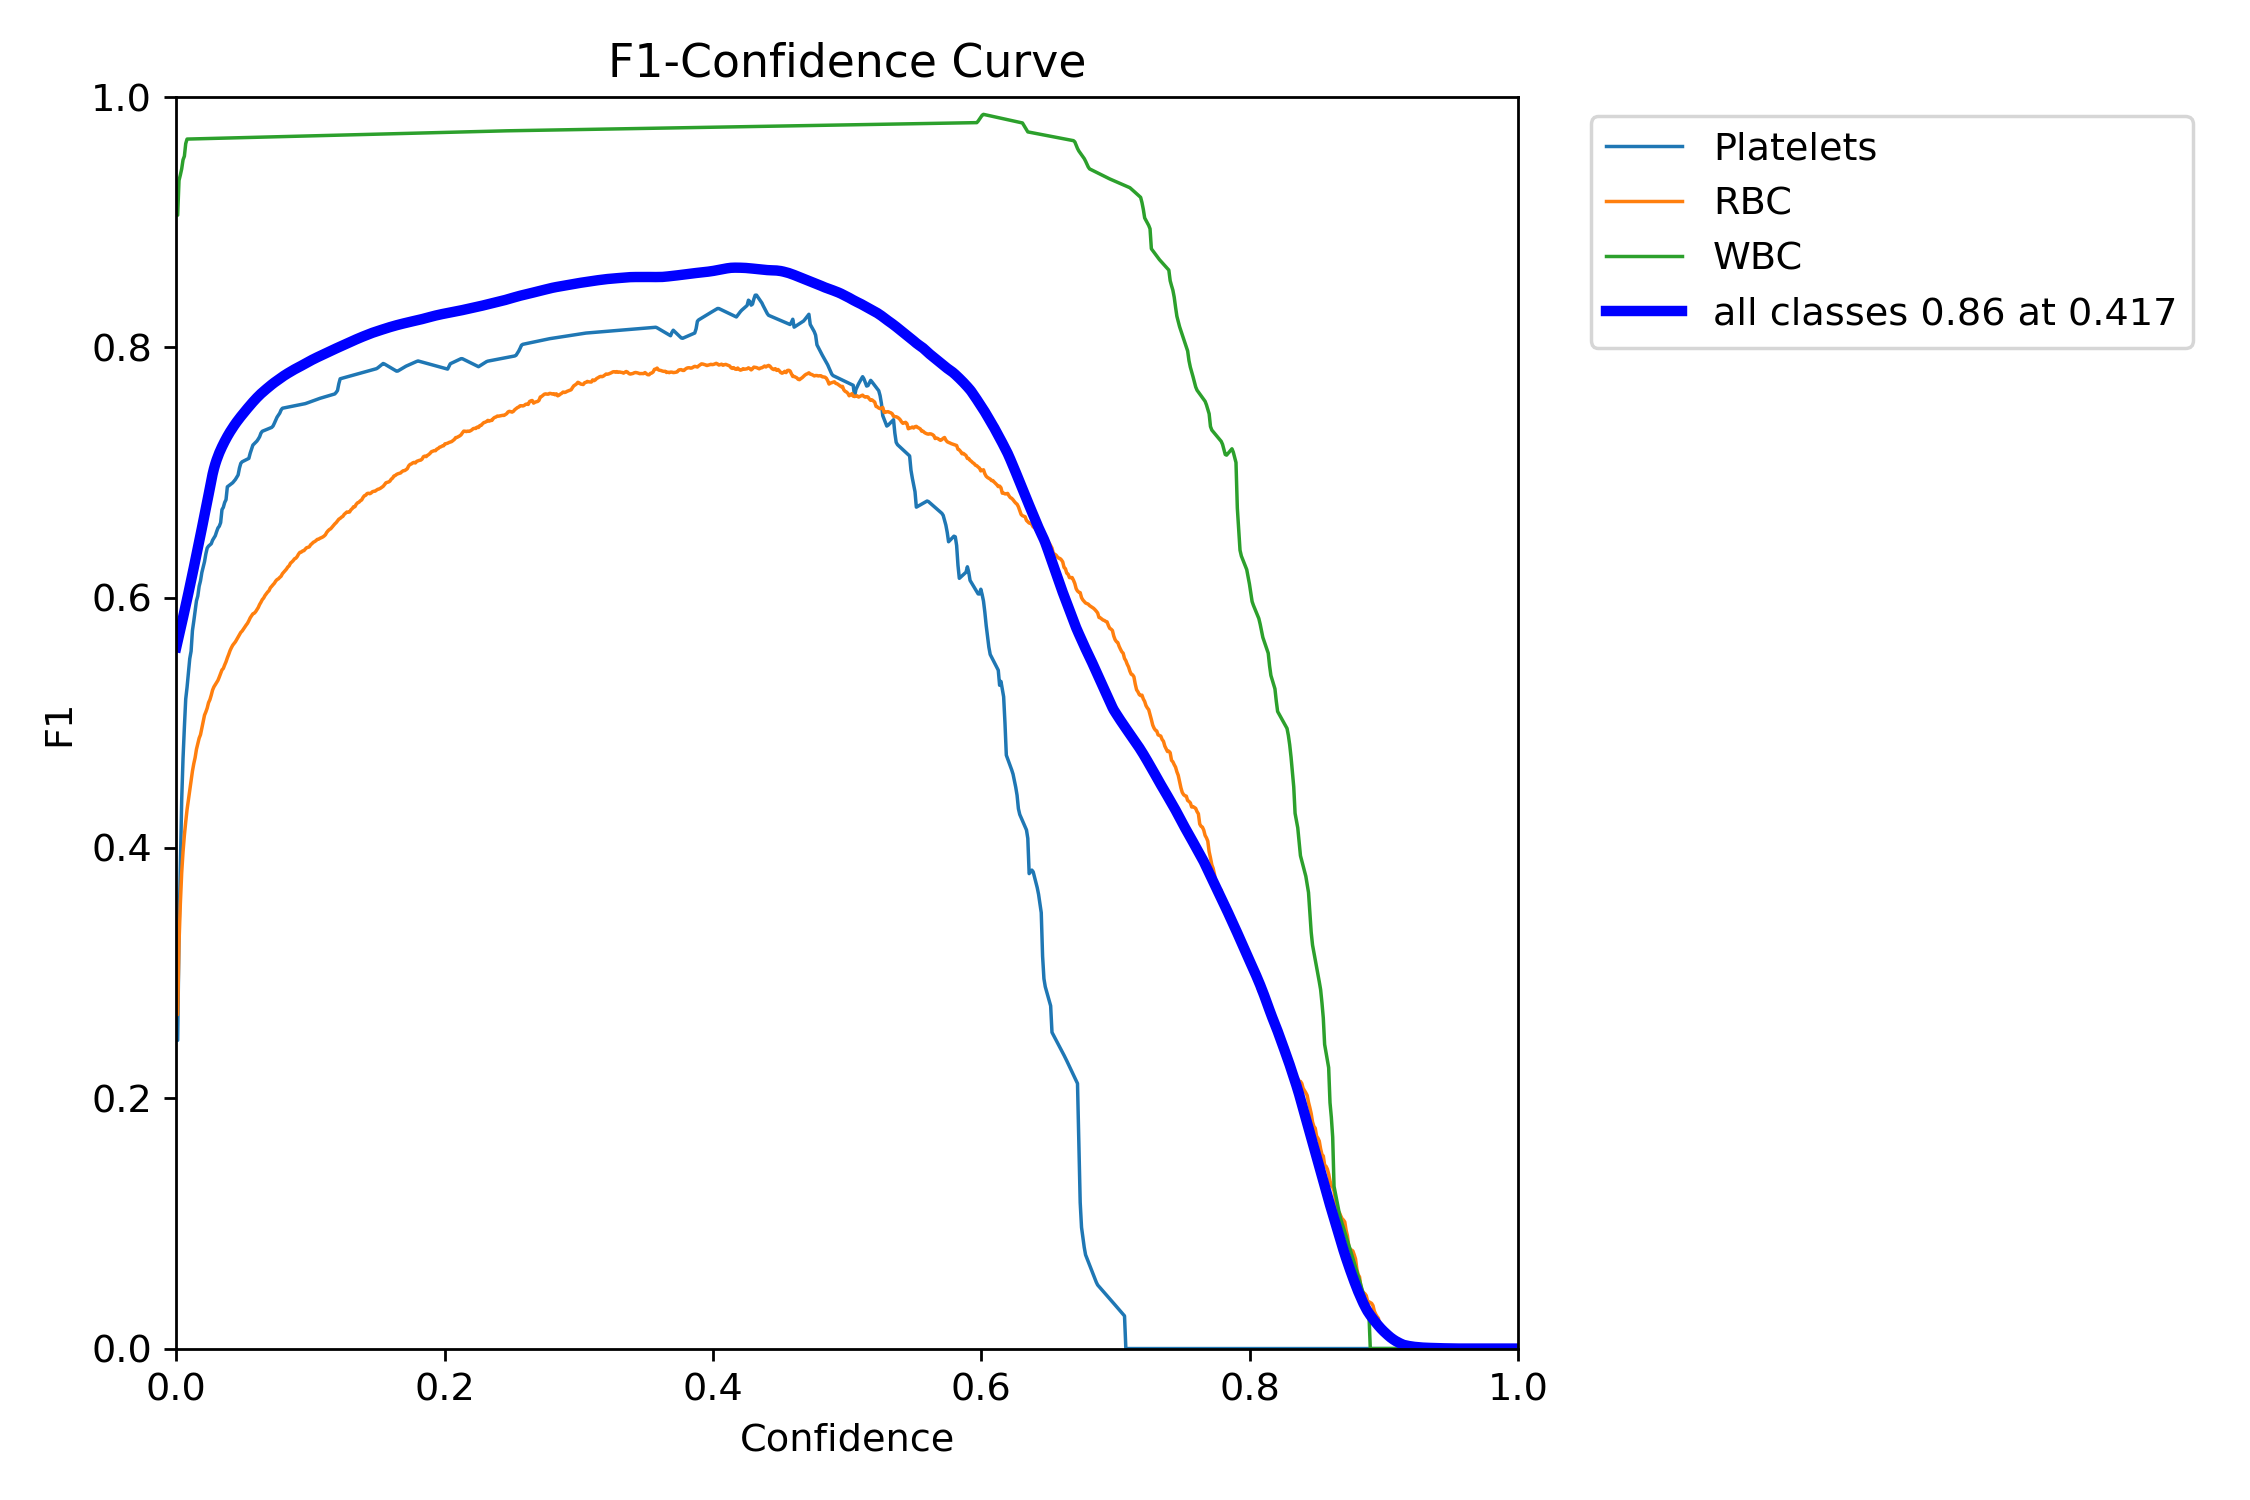

In [5]:
Image(filename = f"runs/detect/V9/V9val_2205_HP/F1_curve.png", width =600)

Results:
- The best F1 score can be seen at 86% Accuracy at the threshold of 41.7 on average
- WBC has a very high accuracy at 98% at around 90% confidence on average
- RBC has reasonable accuracy at ~ 75-79% Accuracy at 0.45 - 50 $ confidence
- Plaletets have greater accuracy volatility at 80% accuracy at 50% confidence

- Overall results are very similar to V8 if not marginally different

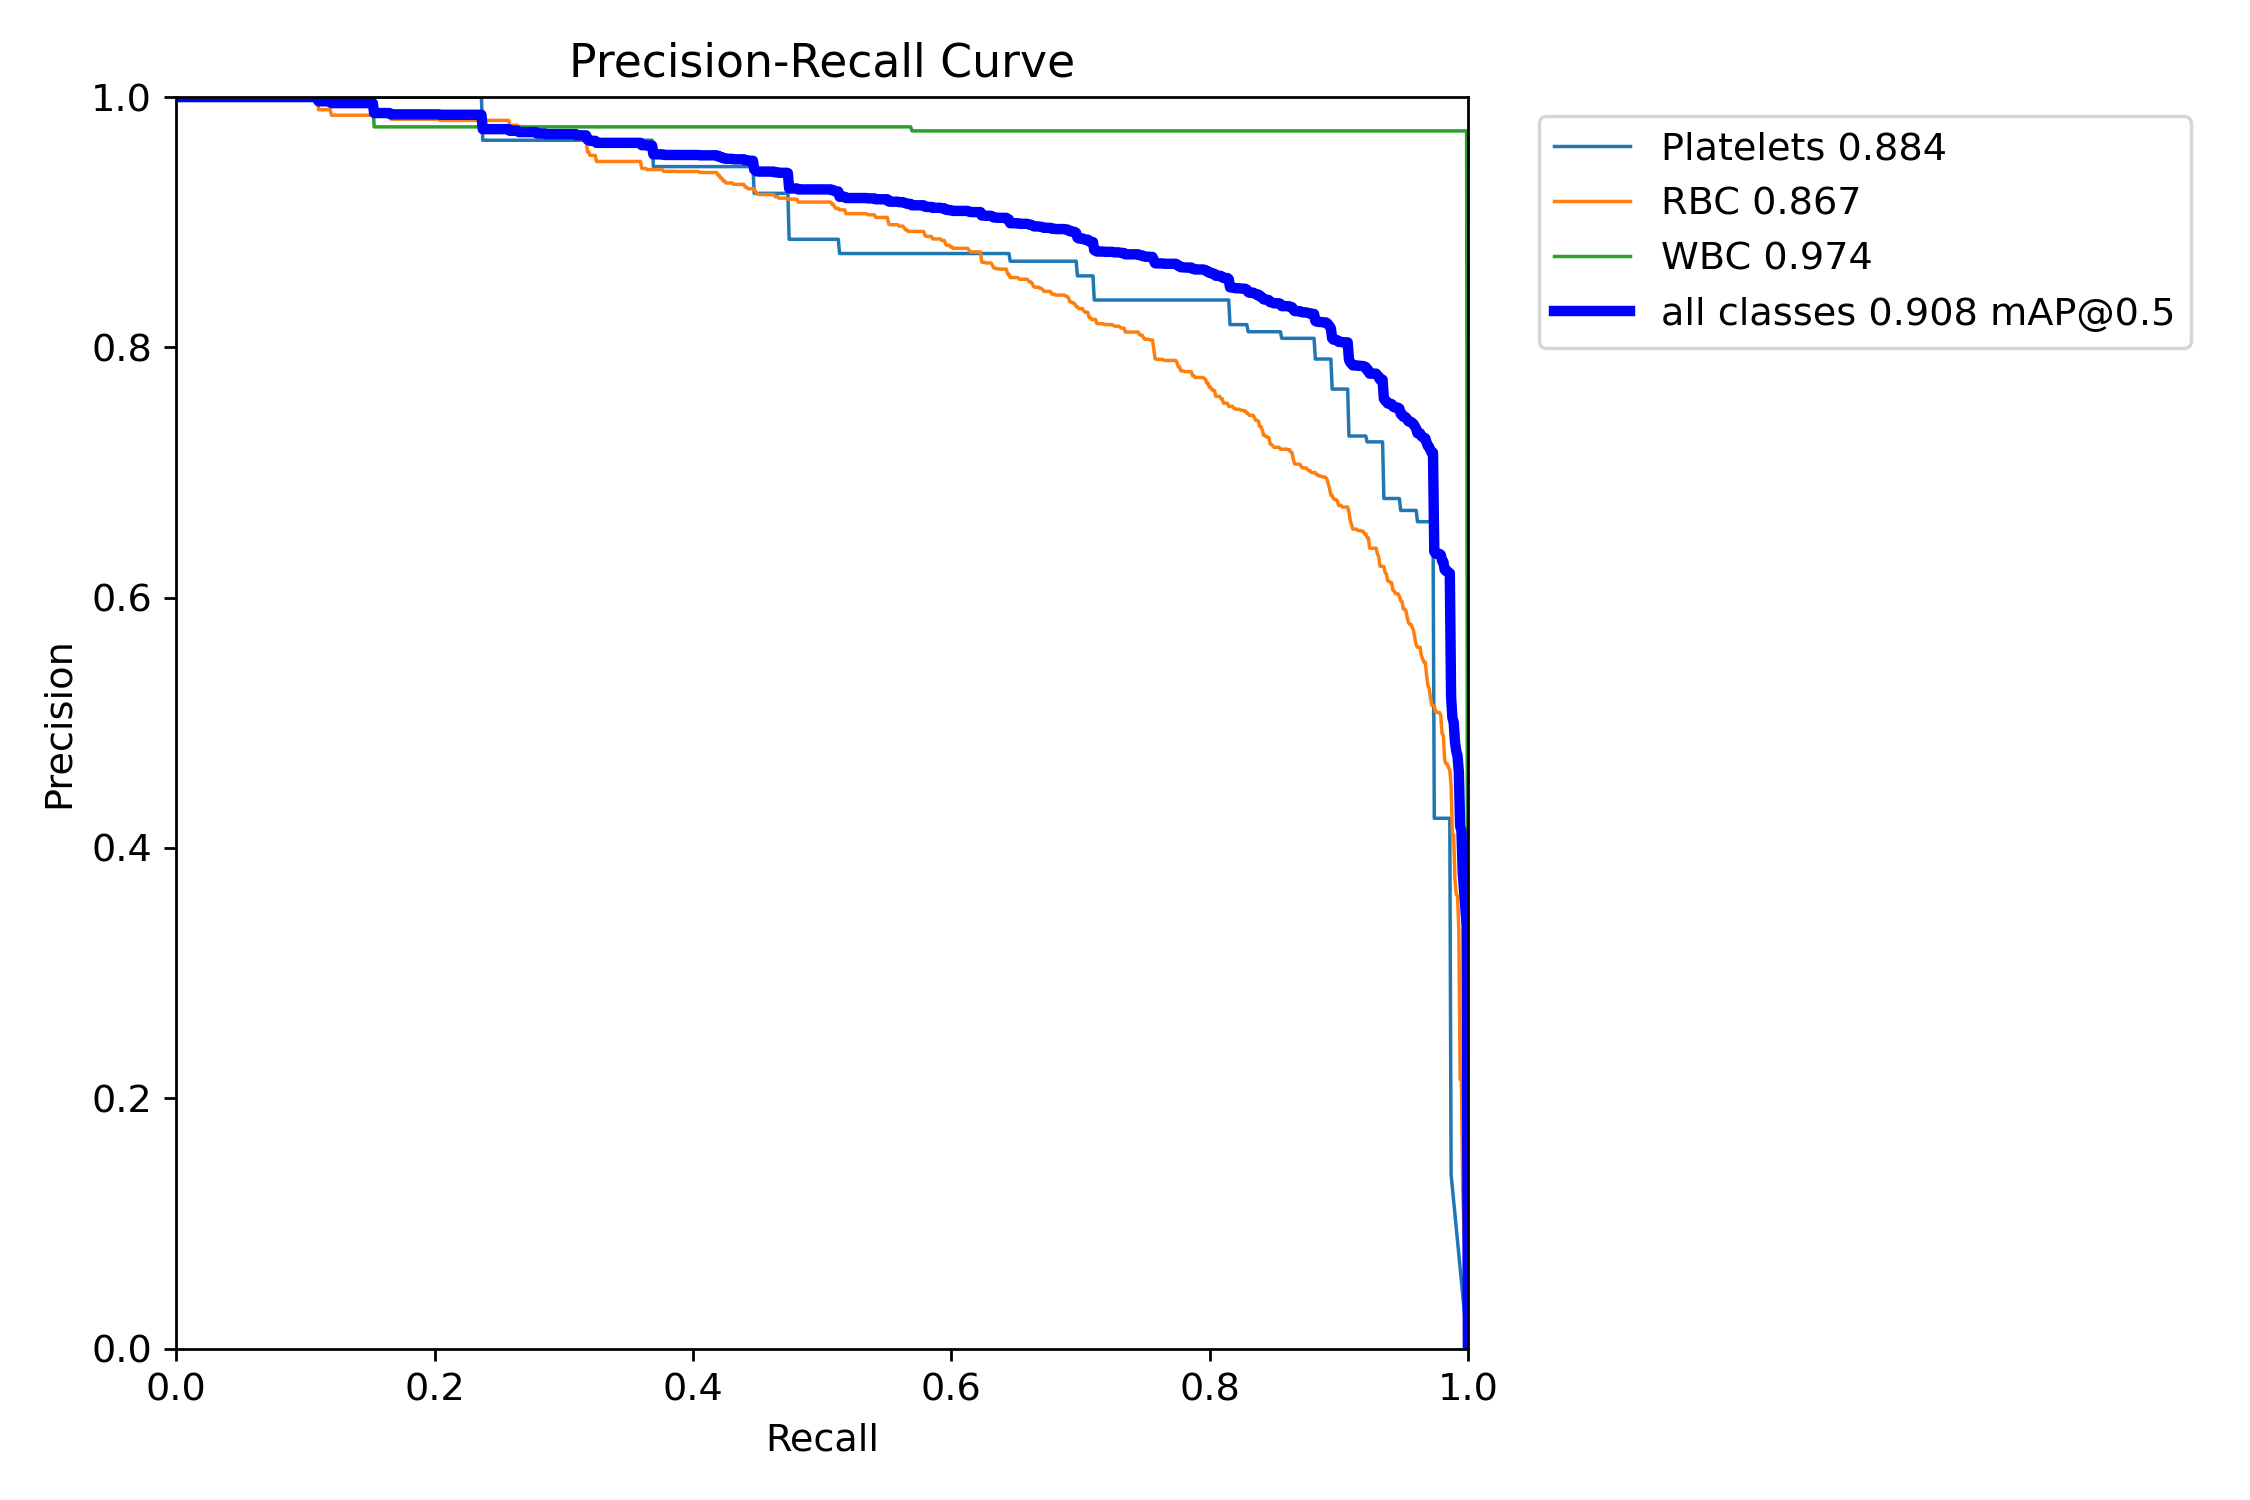

In [6]:
Image(filename = f"runs/detect/V9/V9val_2205_HP/PR_curve.png", width =600)

RESULTS:
- Mean average precision is at 90.8% across the data set when the threshold is 50% (IOU threshold of 50%)
- MAP is very good at the RBC, WBC and Platelet level achieveing 86, 9874 and 88.3 % respectively MAP at 50% IOU threshold
    - WBC = highly effective in identifying WBCs with minimal errors
    - 	RBC = lower P and R for RBC than Platelts, model is reliable in identifying RBCs correctly but higher FPs and FNs compared to Platelets
    -	Platelets=  good performance but good amount of FPs and FNs

- They are all at the right hand corner so performing quite well

- Slightly better performance than V8

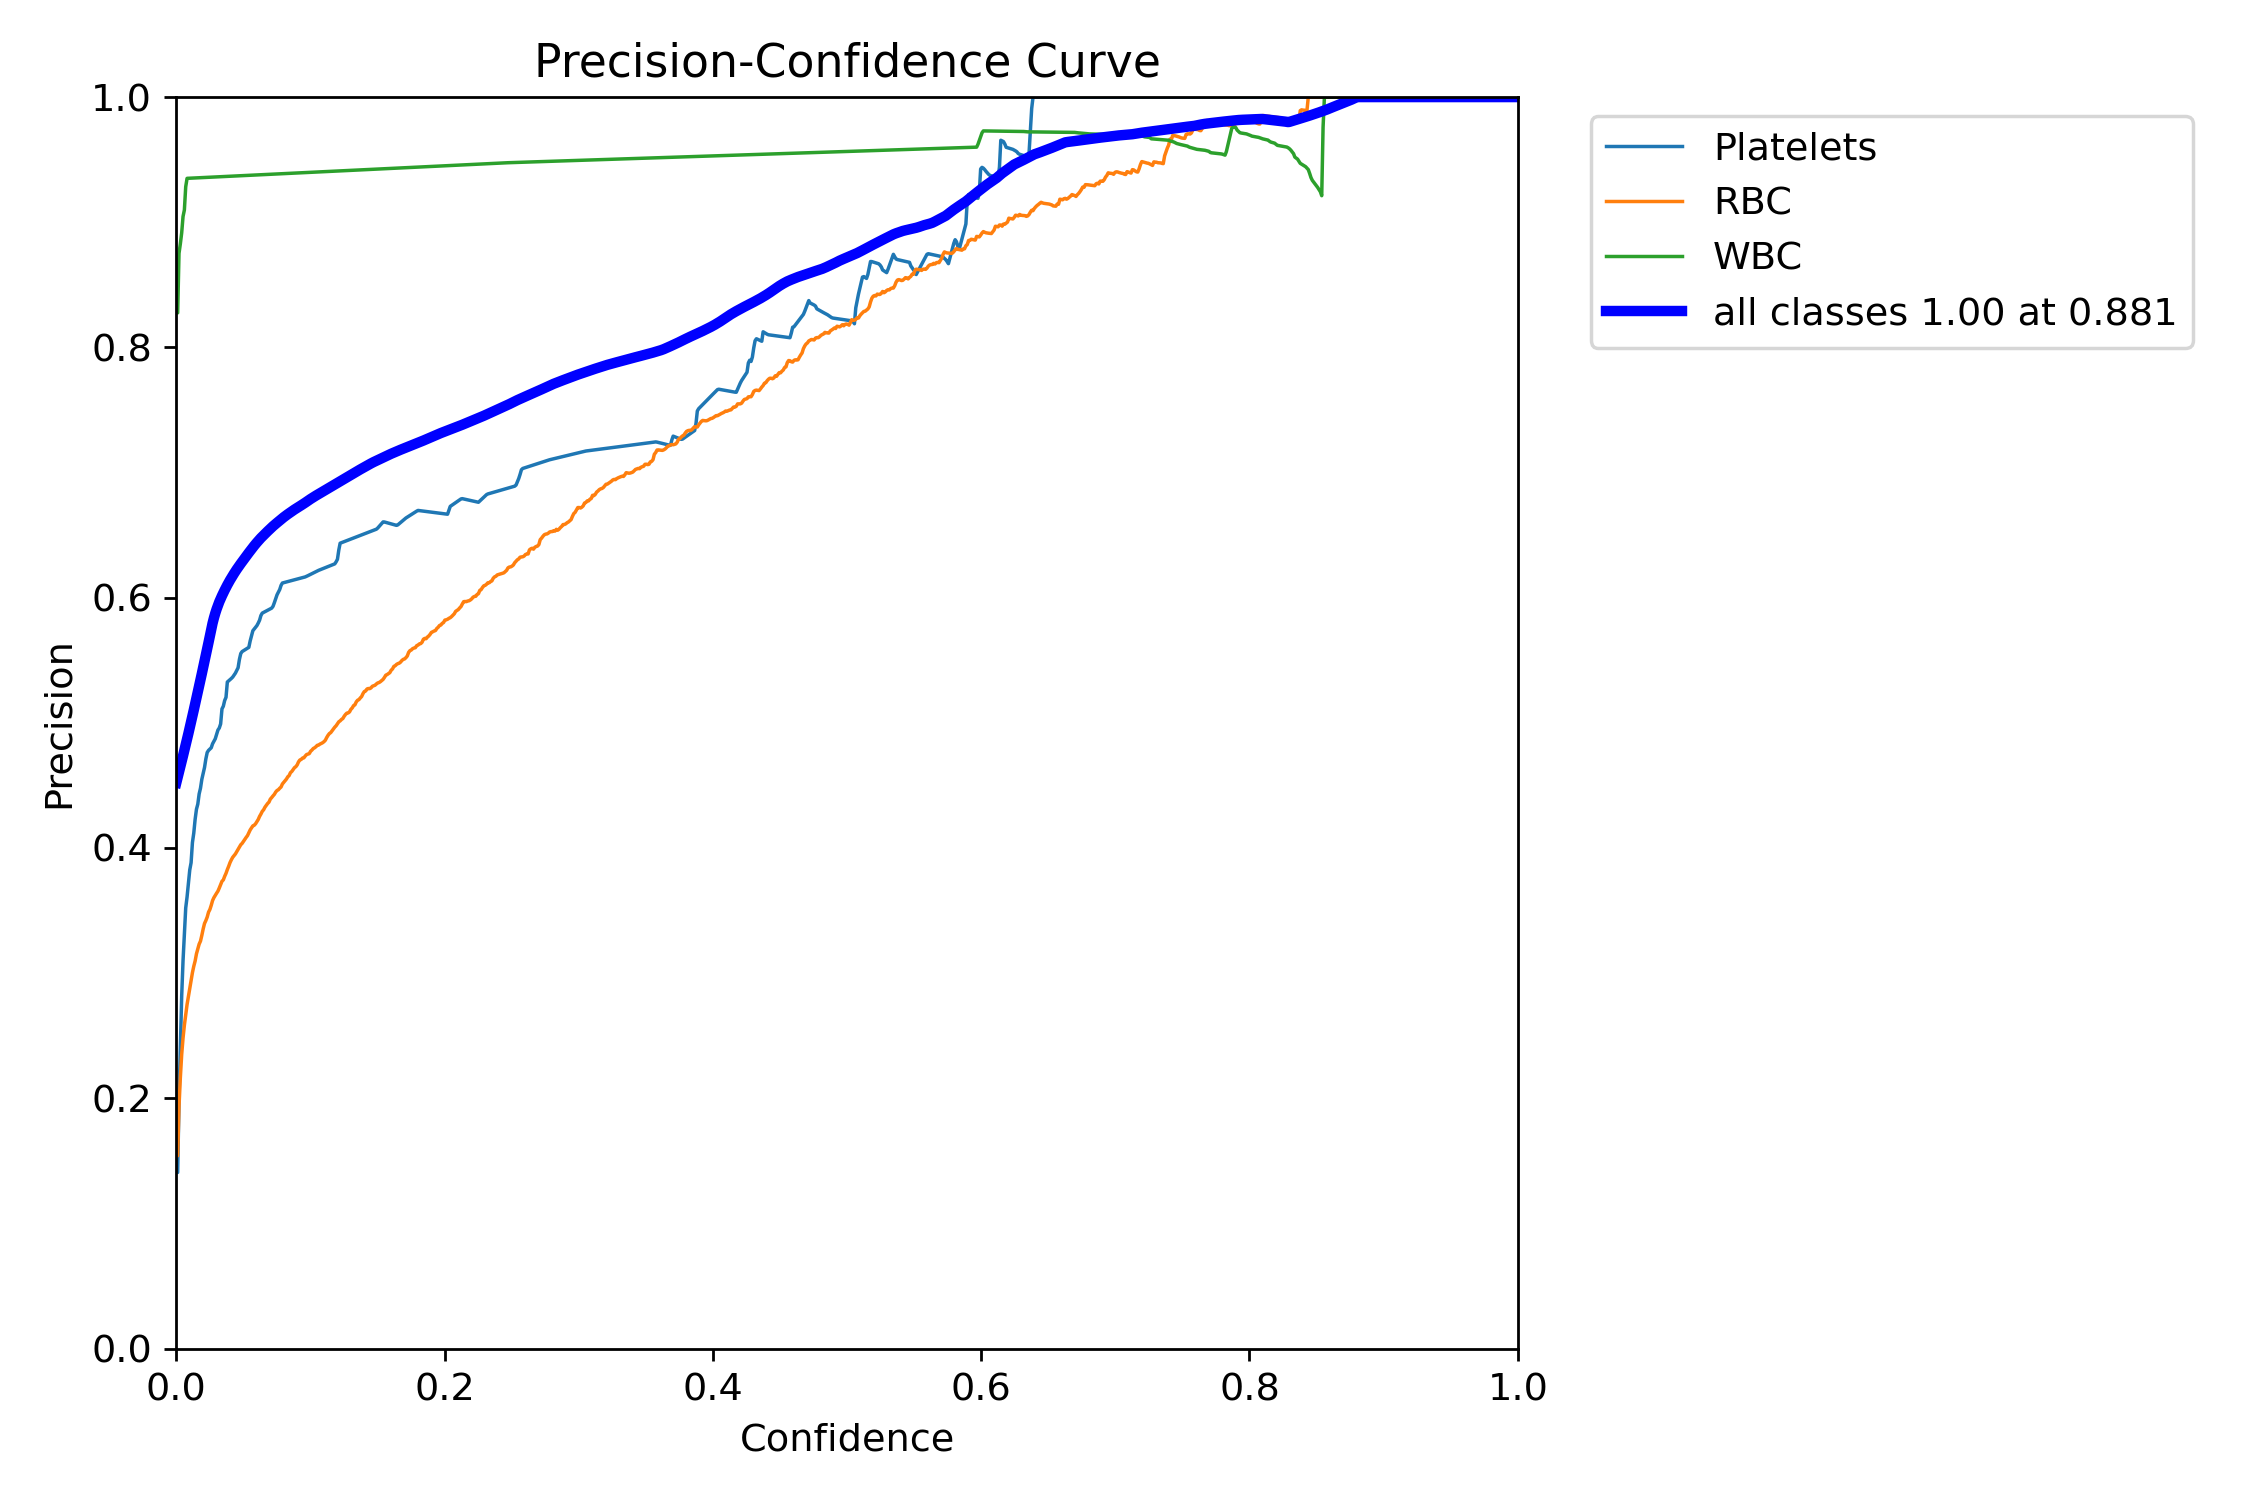

In [8]:
Image(filename = f"runs/detect/V9/V9val_2205_HP/P_curve.png", width =600)

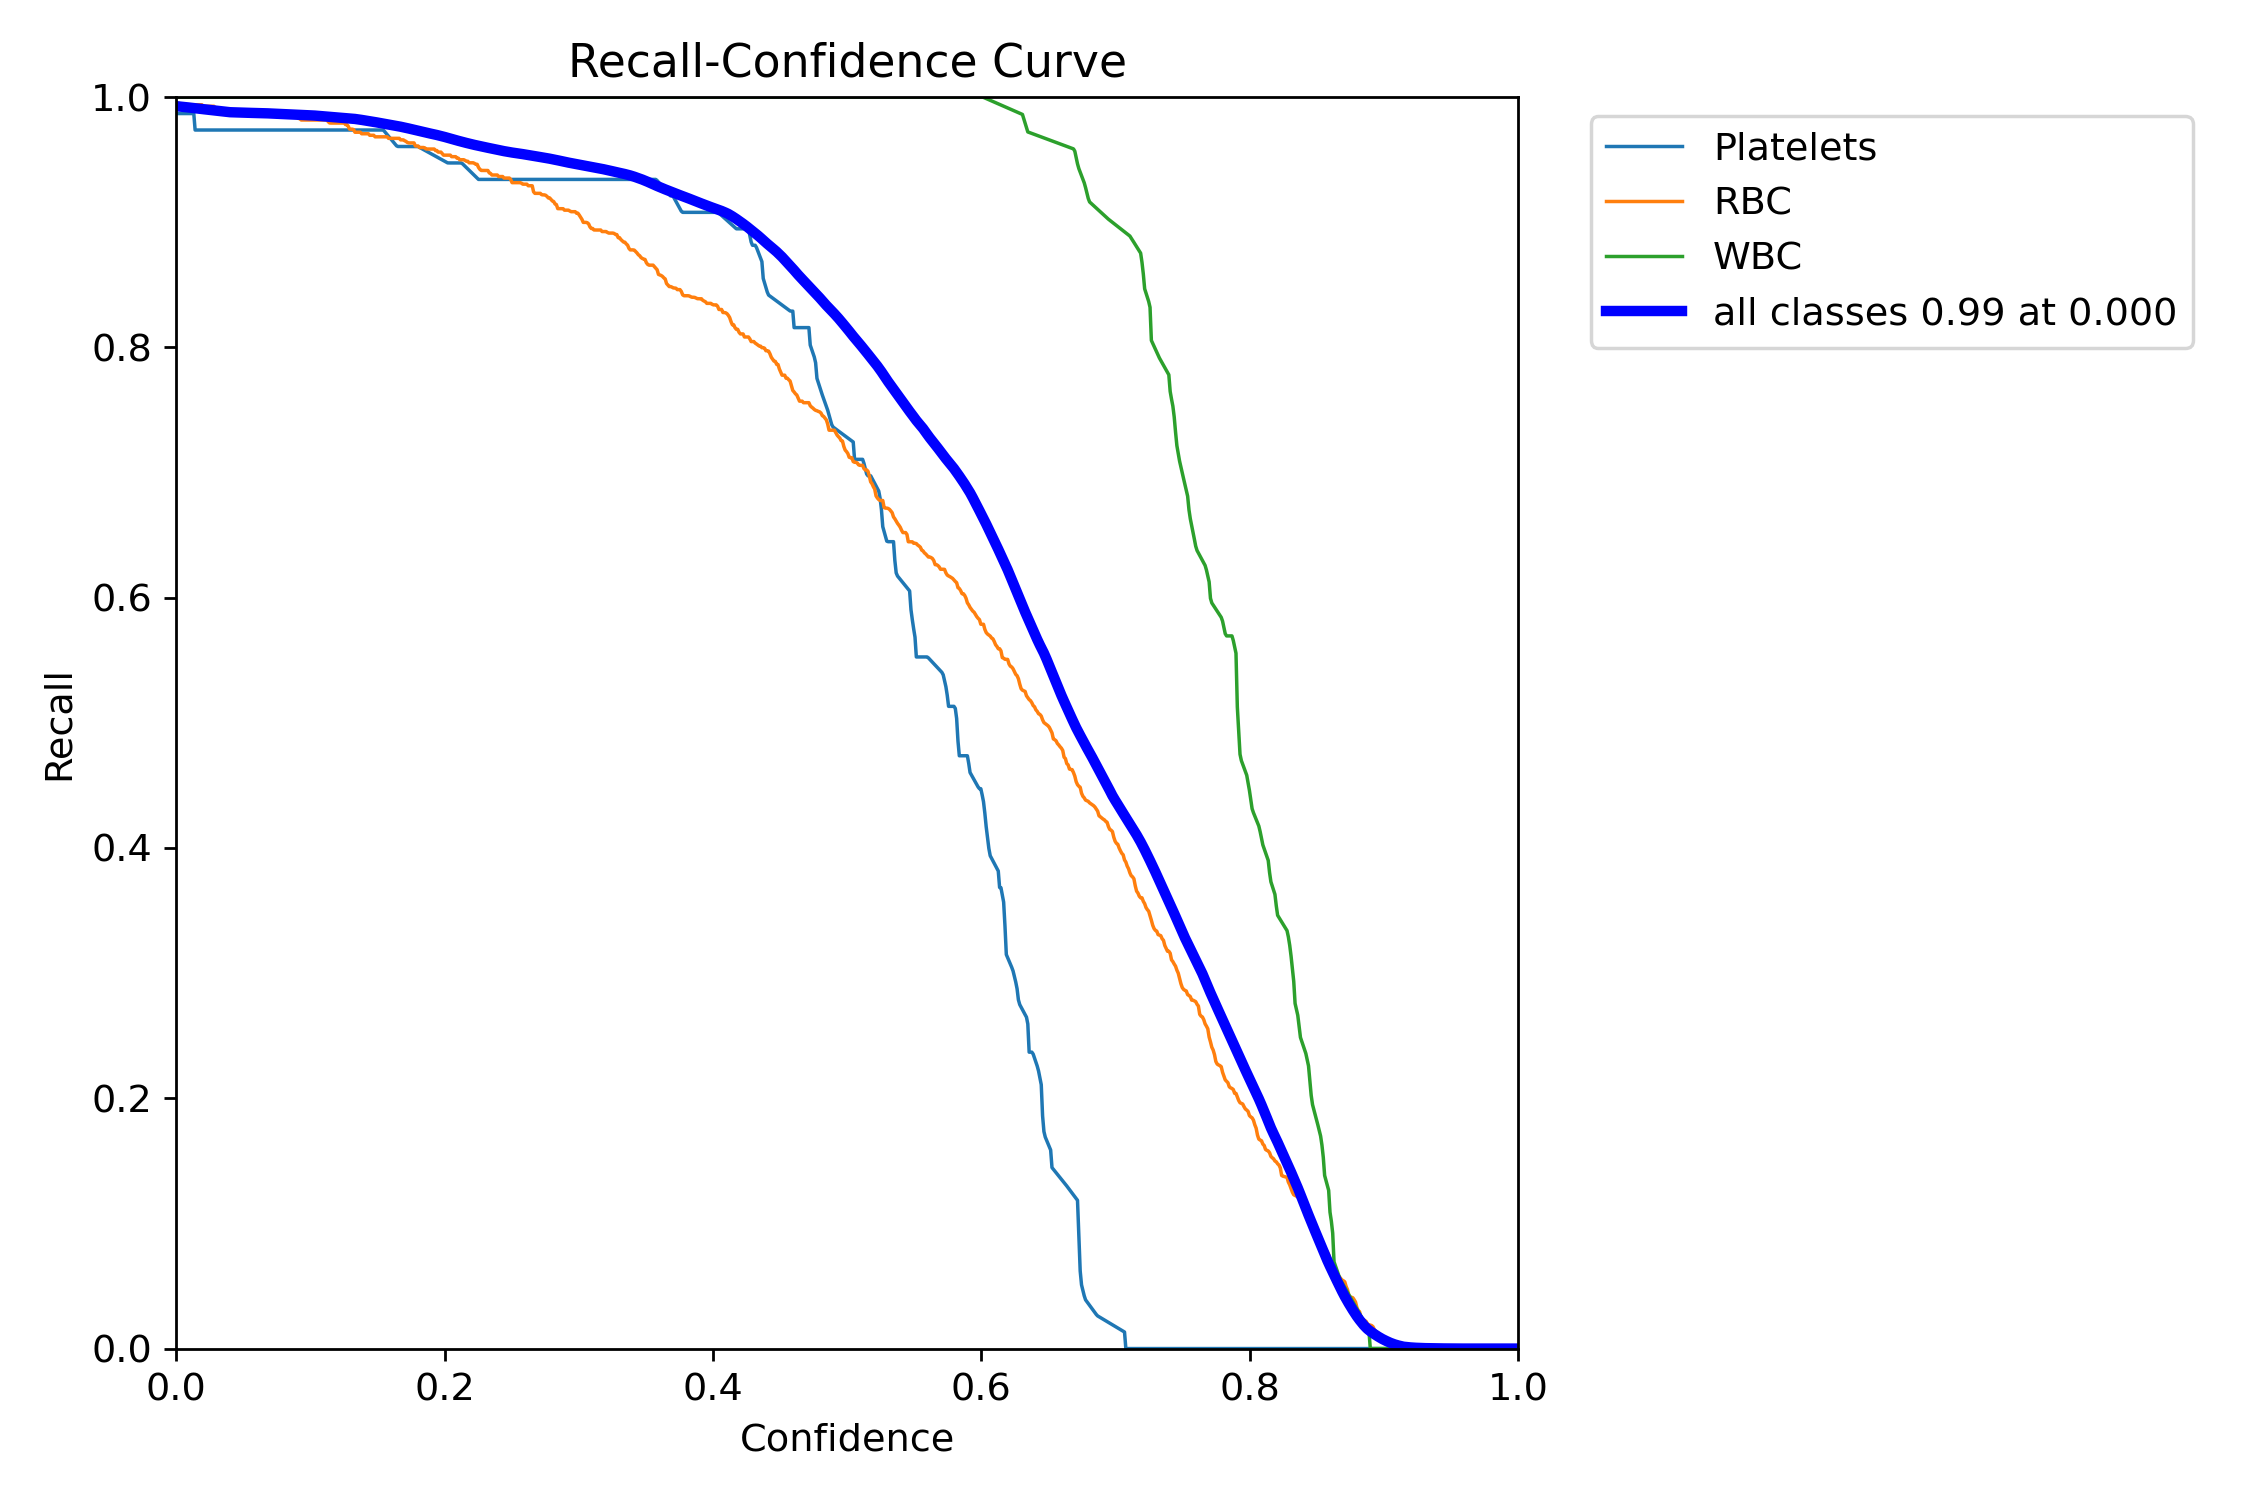

In [9]:
Image(filename = f"runs/detect/V9/V9val_2205_HP/R_curve.png", width =600)